
# Analysis Data PFT Scanner Pilots

In [15]:
from IPython.display import Image
from ast import literal_eval
import random


## Load data and relevant variables participants
 --------


In [16]:
data_exp1 = pd.read_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_Choice_ScanPart_All.csv') 
data_exp_ratings_2 = pd.read_csv('/Users/pradyumna/OneDrive - University College London/PhD Projects/PFT_MRI_Experiment/Scanner Pilot/All_Behavioral/PFT_idRatingsFrame_ScanPart_All.csv') 

In [17]:
# Insert to exclude particitipants
excludedPart = [4,5,8,15,16,27,32,24]
for i in excludedPart:
    data_exp1 = data_exp1[(data_exp1.Part != i)]
    data_exp_ratings_2 = data_exp_ratings_2[(data_exp_ratings_2.Part != i)]
print (data_exp1["Part"].unique())
print ('Number of participants: ' + str(len(data_exp1["Part"].unique())))

[ 3  6  7  9 10 11 12 13 14 17 18 19 20 21 22 23 25 26 28 29 30 31 33 34
 35 36 37 38]
Number of participants: 28


In [18]:
data_exp1.columns

Index(['trial', 'leftId', 'rightId', 'frame', 'endTime', 'choice',
       'choiceTime', 'LRat1', 'RRat1', 'LRat2', 'RRat2', 'LVar1', 'RVar1',
       'LVar2', 'RVar2', 'Part', 'trialOnset', 'trialOnsetTim', 'trialSnd1Tim',
       'trialSnd2Tim', 'trialThinkTime', 'trialRespTime', 'trialEnd',
       'primerSound', 'part', 'session'],
      dtype='object')

In [19]:
data_exp1

trial  leftId  rightId  frame  endTime  choice  choiceTime     LRat1  \
0       0.0     6.0      2.0    2.0      NaN     1.0    6.394748  1.666667   
1       1.0     5.0      6.0    1.0      NaN     1.0    4.217651  1.500000   
2       2.0     6.0      2.0    1.0      NaN     1.0    5.529628  1.666667   
3       3.0     5.0      6.0    2.0      NaN    -1.0    3.821031  1.500000   
4       4.0     5.0      2.0    1.0      NaN     1.0    3.865194  1.500000   
...     ...     ...      ...    ...      ...     ...         ...       ...   
5179   19.0     2.0      5.0    1.0      NaN    -1.0    3.858621  3.166667   
5180   20.0     2.0      5.0    1.0      NaN    -1.0    3.793193  3.166667   
5181   21.0     5.0      2.0    2.0      NaN    -1.0    4.527394  2.833333   
5182   22.0     1.0      6.0    2.0      NaN     1.0    5.276974  2.666667   
5183   23.0     5.0      1.0    2.0      NaN     1.0    3.628081  2.833333   

         RRat1     LRat2  ...  trialOnset  trialOnsetTim  trialSnd1Tim  \
0     2.333333  2.833333  ...  122.379519       0.008605      1.020741   
1     1.666667  2.666667  ...  132.529415       0.010511      1.030361   
2     2.333333  2.833333  ...  144.129619       0.006901      1.023841   
3     1.666667  2.666667  ...  157.180464       0.006823      1.034679   
4     2.333333  2.666667  ...  187.631265       0.007589      1.038964   
...        ...       ...  ...         ...            ...           ...   
5179  2.833333  2.333333  ...  478.235299       0.007823      1.040944   
5180  2.833333  2.333333  ...  491.285179       0.007053      1.042375   
5181  3.166667  2.000000  ...  520.285970       0.007720      1.046842   
5182  3.000000  1.600000  ...  559.437991       0.007583      1.025633   
5183  2.666667  2.000000  ...  581.188425       0.007401      1.025921   

      trialSnd2Tim  trialThinkTime  trialRespTime   trialEnd  primerSound  \
0         1.521760        3.507088       3.507591  10.013129          2.0   
1         1.531569        3.515307       3.515657  11.006220          1.0   
2         1.525057        3.508854       3.509187  12.000181          2.0   
3         1.535908        3.501897       3.502245  12.010674          1.0   
4         1.540185        3.510868       3.511215  10.001466          1.0   
...            ...             ...            ...        ...          ...   
5179      1.541376        3.506742       3.506945  12.008694          2.0   
5180      1.542536        3.508575       3.508830  11.008966          1.0   
5181      1.547278        3.509317       3.509674  11.009427          1.0   
5182      1.526989        3.507663       3.507868  12.008982          1.0   
5183      1.526311        3.508917       3.509165  10.009005          1.0   

      part  session  
0      3.0      0.0  
1      3.0      0.0  
2      3.0      0.0  
3      3.0      0.0  
4      3.0      0.0  
...    ...      ...  
5179  38.0      5.0  
5180  38.0      5.0  
5181  38.0      5.0  
5182  38.0      5.0  
5183  38.0      5.0  

[4032 rows x 26 columns]

In [20]:
data_exp_ratings_2

nameId      rat1      rat2      var1      var2  Part  \
0       2.0  2.333333  2.666667  0.516398  0.516398     3   
1       5.0  1.500000  2.666667  0.547723  0.816497     3   
2       1.0  3.333333  1.833333  0.816497  0.752773     3   
3       6.0  1.666667  2.833333  0.516398  0.752773     3   
12      2.0  2.833333  2.500000  0.408248  0.547723     6   
..      ...       ...       ...       ...       ...   ...   
139     6.0  2.000000  2.500000  0.000000  0.547723    37   
140     2.0  3.166667  2.333333  0.752773  0.816497    38   
141     5.0  2.833333  2.000000  0.752773  0.632456    38   
142     1.0  2.666667  1.600000  1.211060  0.547723    38   
143     6.0  3.000000  2.166667  1.224745  0.983192    38   

             AllRatings1          AllRatings2  
0    [3. 2. 3. 2. 2. 2.]  [3. 2. 2. 3. 3. 3.]  
1    [1. 1. 2. 2. 1. 2.]  [2. 3. 2. 2. 3. 4.]  
2    [4. 3. 4. 2. 3. 4.]  [2. 1. 1. 3. 2. 2.]  
3    [2. 2. 2. 2. 1. 1.]  [2. 2. 3. 3. 4. 3.]  
12   [3. 3. 3. 3. 2. 3.]  [2. 3. 3. 2. 3. 2.]  
..                   ...                  ...  
139  [2. 2. 2. 2. 2. 2.]  [2. 2. 2. 3. 3. 3.]  
140  [4. 3. 4. 3. 3. 2.]  [3. 1. 2. 3. 3. 2.]  
141  [3. 3. 3. 2. 4. 2.]  [2. 3. 1. 2. 2. 2.]  
142  [1. 2. 4. 4. 3. 2.]     [2. 1. 1. 2. 2.]  
143     [4. 1. 4. 3. 3.]  [2. 4. 1. 2. 2. 2.]  

[112 rows x 8 columns]

In [21]:
data_exp1=data_exp1.rename(index=str, columns={"choiceTime":"RT", })

## drop NaNs from choice rows

In [22]:
#data_exp1 = data_exp1.dropna(axis = 0, how ='any') 
#data_exp_ratings_2 = data_exp_ratings_2.dropna(axis = 0, how ='any') 

In [23]:
data_exp1 = data_exp1.reset_index()
data_exp_ratings_2 = data_exp_ratings_2.reset_index()

## add extra value information

In [24]:
data_exp1["TotVal1"] = data_exp1['RRat1']+ data_exp1['LRat1']
data_exp1["TotVal2"] = data_exp1['RRat2']+ data_exp1['LRat2']


data_exp1["DVal1"] = data_exp1['RRat1'] - data_exp1['LRat1']
data_exp1["absDVal1"] = np.abs(data_exp1["DVal1"] )

data_exp1["DVar1"] = data_exp1['RVar1'] - data_exp1['LVar1']
data_exp1["absDVar1"] = np.abs(data_exp1["DVar1"] )

data_exp1["DVal2"] = data_exp1['RRat2'] - data_exp1['LRat2']
data_exp1["absDVal2"] = np.abs(data_exp1["DVal2"] )

data_exp1["DVar2"] = data_exp1['RVar2'] - data_exp1['LVar2']
data_exp1["absDVar2"] = np.abs(data_exp1["DVar2"] )
data_exp1["logRT"] = np.log(data_exp1["RT"] )





## add z-scores

In [25]:
data_exp1["zDVal1"] = z_score1(data_exp1,'Part',"DVal1")
data_exp1["zabsDVal1"] = z_score1(data_exp1,'Part',"absDVal1")

data_exp1["zDVal2"] = z_score1(data_exp1,'Part',"DVal2")
data_exp1["zabsDVal2"] = z_score1(data_exp1,'Part',"absDVal2")

data_exp1["zDVar1"] = z_score1(data_exp1,'Part',"DVar1")
data_exp1["zabsDVar1"] = z_score1(data_exp1,'Part',"absDVar1")

data_exp1["zDVar2"] = z_score1(data_exp1,'Part',"DVar2")
data_exp1["zabsDVar2"] = z_score1(data_exp1,'Part',"absDVar2")

data_exp1["zTotVal1"] = z_score1(data_exp1,'Part',"TotVal1")
data_exp1["zTotVal2"] = z_score1(data_exp1,'Part',"TotVal2")
data_exp1["zRT"] = z_score1(data_exp1,'Part',"RT")
data_exp1["zLogRT"] = z_score1(data_exp1,'Part',"logRT")

## correct option according to rating given in frame 1

In [26]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] <= data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] >= data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat1[i] >= data_exp1.RRat1[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat1[i] <= data_exp1.RRat1[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct1"] = Correct

## correct option according to rating given in frame 2

In [27]:
Correct = []
for i in range(len(data_exp1)):
    if data_exp1.frame[i] == 1:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat2[i] >= data_exp1.RRat2[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat2[i] <= data_exp1.RRat2[i])):
            Correct.append(1)
        else:
            Correct.append(0)
    if data_exp1.frame[i] == 2:
        if (data_exp1.choice[i] == 1 and (data_exp1.LRat2[i] <= data_exp1.RRat2[i])) or (data_exp1.choice[i] == -1 and (data_exp1.LRat2[i] >= data_exp1.RRat2[i])):
            Correct.append(1)
        else:
            Correct.append(0)

data_exp1["correct2"] = Correct

## change choices from -1 to 0 for left

In [28]:
choices = []
for i in range(len(data_exp1)):
        if (data_exp1.choice[i] == 1):
            choices.append(1)
        else:
            choices.append(0)

data_exp1["choices"] = choices

In [29]:
data_exp1

index  trial  leftId  rightId  frame  endTime  choice        RT  \
0        0    0.0     6.0      2.0    2.0      NaN     1.0  6.394748   
1        1    1.0     5.0      6.0    1.0      NaN     1.0  4.217651   
2        2    2.0     6.0      2.0    1.0      NaN     1.0  5.529628   
3        3    3.0     5.0      6.0    2.0      NaN    -1.0  3.821031   
4        4    4.0     5.0      2.0    1.0      NaN     1.0  3.865194   
...    ...    ...     ...      ...    ...      ...     ...       ...   
4027  5179   19.0     2.0      5.0    1.0      NaN    -1.0  3.858621   
4028  5180   20.0     2.0      5.0    1.0      NaN    -1.0  3.793193   
4029  5181   21.0     5.0      2.0    2.0      NaN    -1.0  4.527394   
4030  5182   22.0     1.0      6.0    2.0      NaN     1.0  5.276974   
4031  5183   23.0     5.0      1.0    2.0      NaN     1.0  3.628081   

         LRat1     RRat1  ...  zabsDVar1    zDVar2  zabsDVar2  zTotVal1  \
0     1.666667  2.333333  ...  -1.148483 -1.263697   0.772954 -0.500835   
1     1.500000  1.666667  ...  -0.916784 -0.340678  -0.772954 -1.502506   
2     1.666667  2.333333  ...  -1.148483 -1.263697   0.772954 -0.500835   
3     1.500000  1.666667  ...  -0.916784 -0.340678  -0.772954 -1.502506   
4     1.500000  2.333333  ...  -0.916784 -1.604375   1.343534 -0.701170   
...        ...       ...  ...        ...       ...        ...       ...   
4027  3.166667  2.833333  ...  -1.445161 -0.669257  -0.545670  0.774597   
4028  3.166667  2.833333  ...  -1.445161 -0.669257  -0.545670  0.774597   
4029  2.833333  3.166667  ...  -1.445161  0.669257  -0.545670  0.774597   
4030  2.666667  3.000000  ...  -1.381849  1.583565   1.585801 -0.774597   
4031  2.833333  2.666667  ...   0.675096 -0.308128  -1.387548 -1.549193   

      zTotVal2       zRT    zLogRT  correct1  correct2  choices  
0     1.107823  3.183484  2.986150         0         0        1  
1     1.107823  0.056447  0.143589         1         0        1  
2     1.107823  1.940884  1.993392         1         1        1  
3     1.107823 -0.513232 -0.530912         1         0        0  
4     0.738549 -0.449799 -0.452426         1         1        1  
...        ...       ...       ...       ...       ...      ...  
4027  0.901420 -0.986754 -1.009640         1         0        0  
4028  0.901420 -1.078023 -1.120147         1         0        0  
4029  0.901420 -0.053863  0.023174         1         0        0  
4030 -0.901420  0.991747  1.013145         0         1        1  
4031 -1.431668 -1.308342 -1.407719         1         0        1  

[4032 rows x 53 columns]

## Rating data analysis for both frames
------------------------
## frame 1: like / frame 2: dislike
## pet number id: 1:dog ; 2:cat ; 5:parrot ; 6: hamster

###  1. mean rating in both frames (rat1 : rating in like frame ; rat2: rating in dislike frame)


In [30]:
#sns.set(font_scale=1.5, style='white')
#ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 1)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), )
#plt.suptitle('Participant ' + str(1), fontsize = 25)#

#sns.despine()

In [31]:
data_exp_ratings_2

index  nameId      rat1      rat2      var1      var2  Part  \
0        0     2.0  2.333333  2.666667  0.516398  0.516398     3   
1        1     5.0  1.500000  2.666667  0.547723  0.816497     3   
2        2     1.0  3.333333  1.833333  0.816497  0.752773     3   
3        3     6.0  1.666667  2.833333  0.516398  0.752773     3   
4       12     2.0  2.833333  2.500000  0.408248  0.547723     6   
..     ...     ...       ...       ...       ...       ...   ...   
107    139     6.0  2.000000  2.500000  0.000000  0.547723    37   
108    140     2.0  3.166667  2.333333  0.752773  0.816497    38   
109    141     5.0  2.833333  2.000000  0.752773  0.632456    38   
110    142     1.0  2.666667  1.600000  1.211060  0.547723    38   
111    143     6.0  3.000000  2.166667  1.224745  0.983192    38   

             AllRatings1          AllRatings2  
0    [3. 2. 3. 2. 2. 2.]  [3. 2. 2. 3. 3. 3.]  
1    [1. 1. 2. 2. 1. 2.]  [2. 3. 2. 2. 3. 4.]  
2    [4. 3. 4. 2. 3. 4.]  [2. 1. 1. 3. 2. 2.]  
3    [2. 2. 2. 2. 1. 1.]  [2. 2. 3. 3. 4. 3.]  
4    [3. 3. 3. 3. 2. 3.]  [2. 3. 3. 2. 3. 2.]  
..                   ...                  ...  
107  [2. 2. 2. 2. 2. 2.]  [2. 2. 2. 3. 3. 3.]  
108  [4. 3. 4. 3. 3. 2.]  [3. 1. 2. 3. 3. 2.]  
109  [3. 3. 3. 2. 4. 2.]  [2. 3. 1. 2. 2. 2.]  
110  [1. 2. 4. 4. 3. 2.]     [2. 1. 1. 2. 2.]  
111     [4. 1. 4. 3. 3.]  [2. 4. 1. 2. 2. 2.]  

[112 rows x 9 columns]

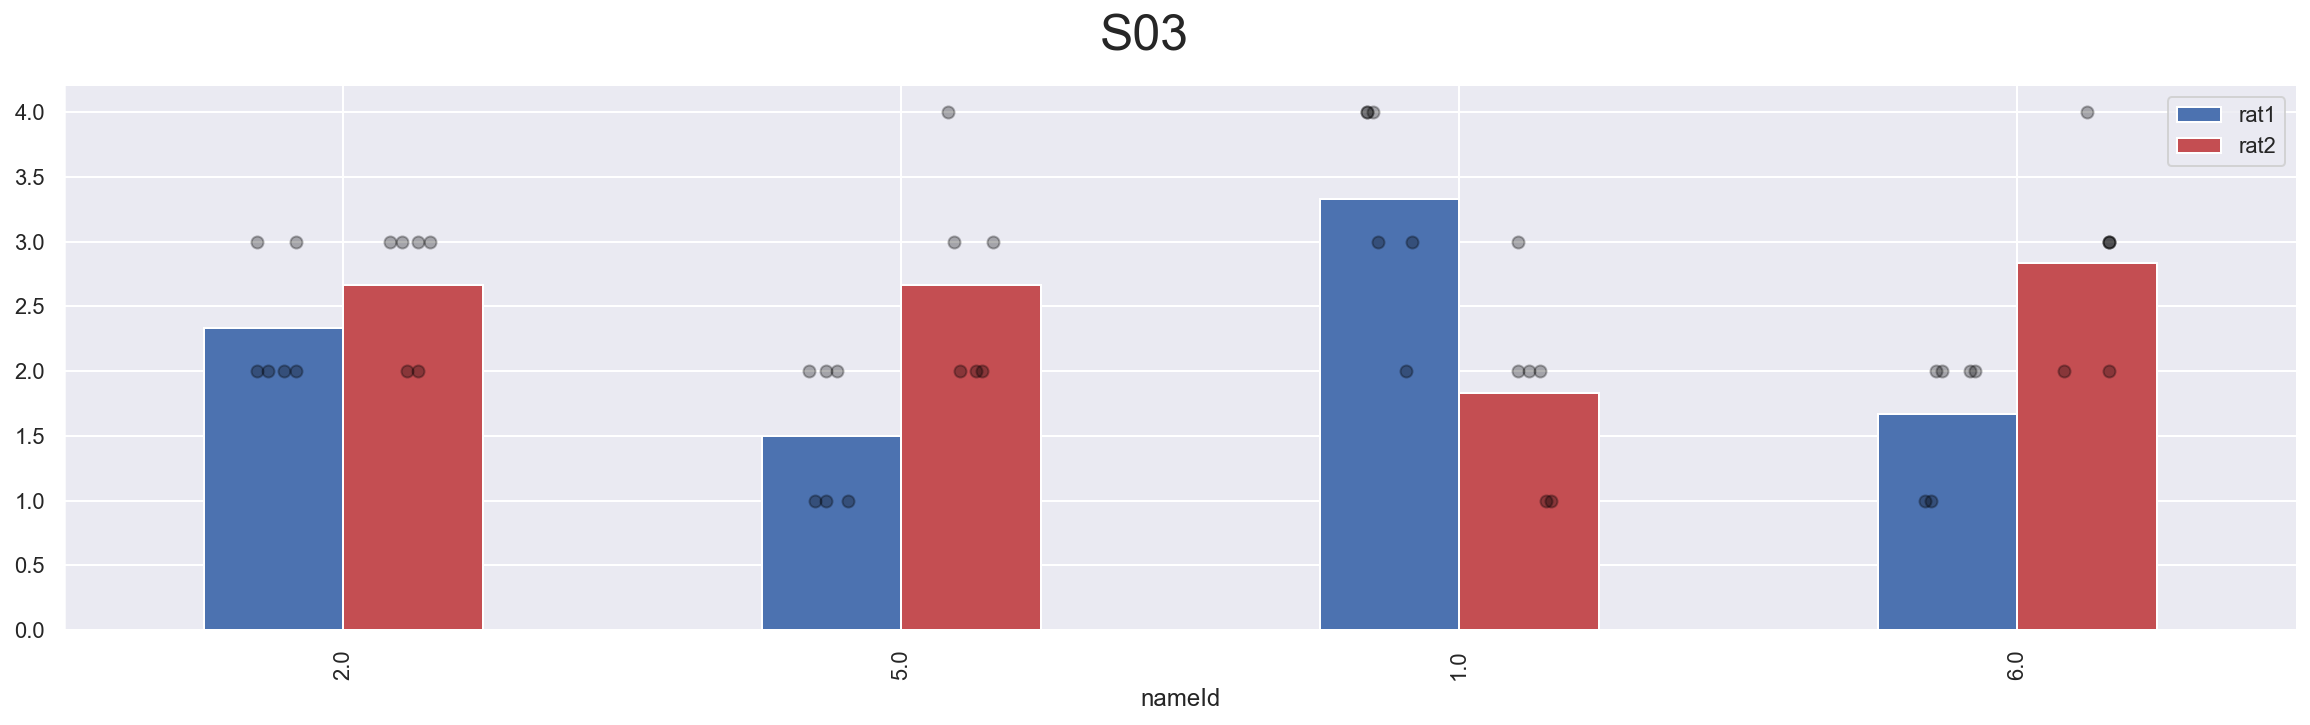

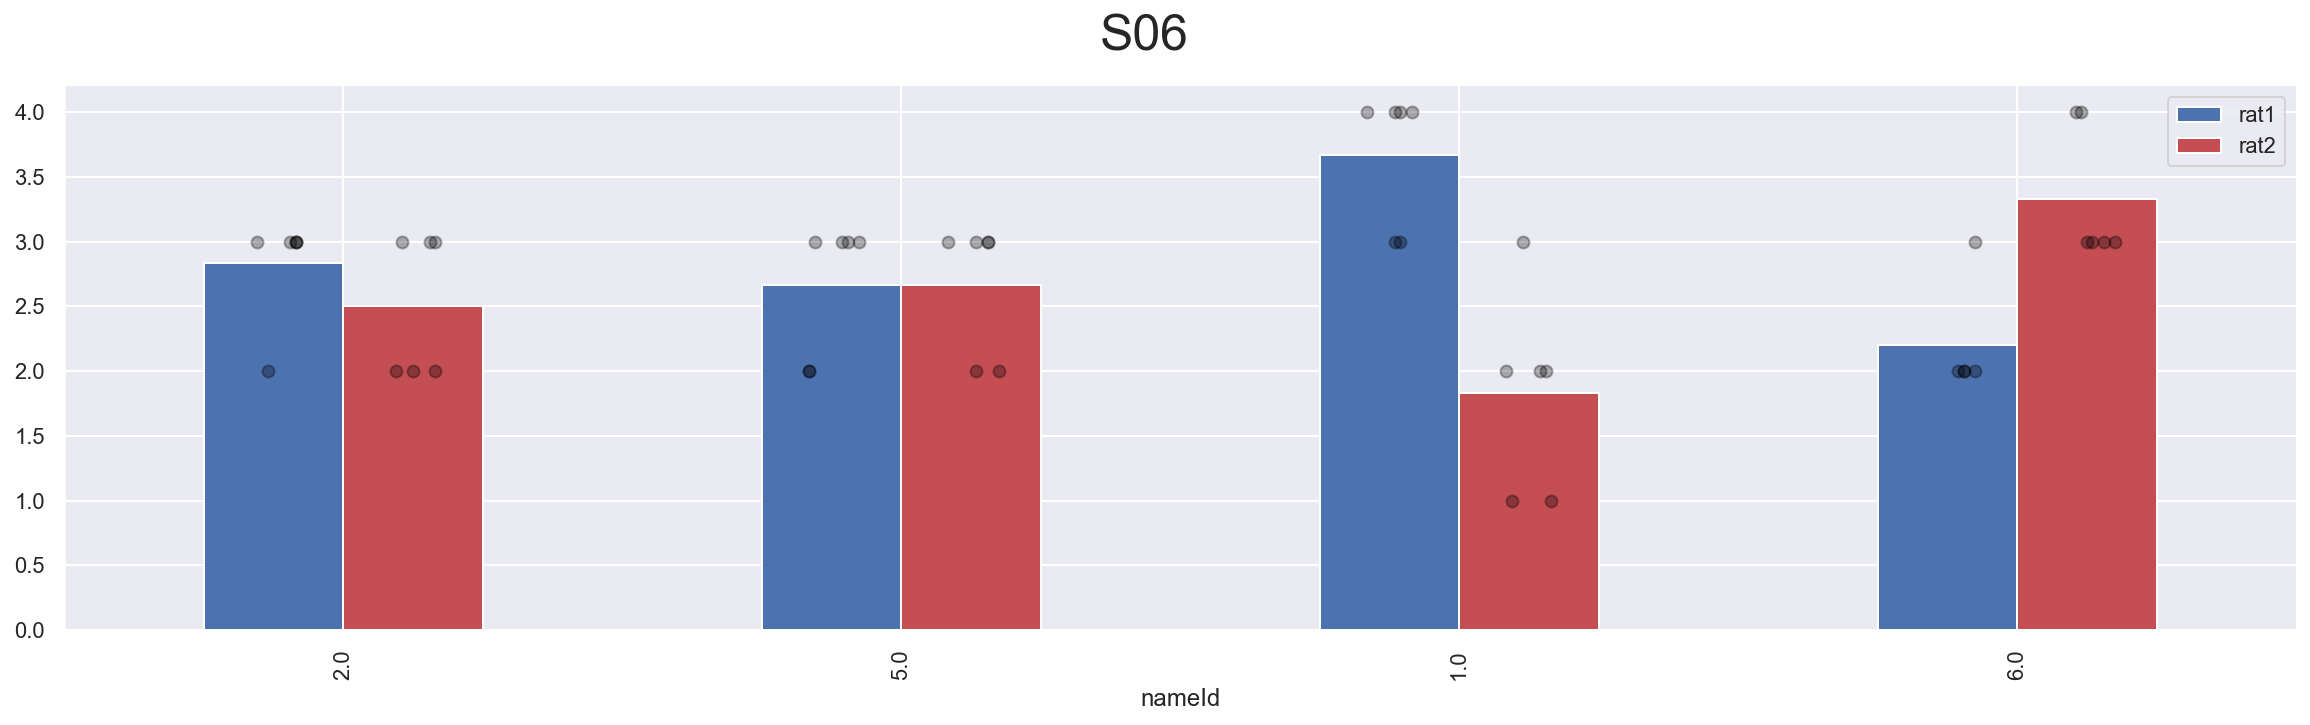

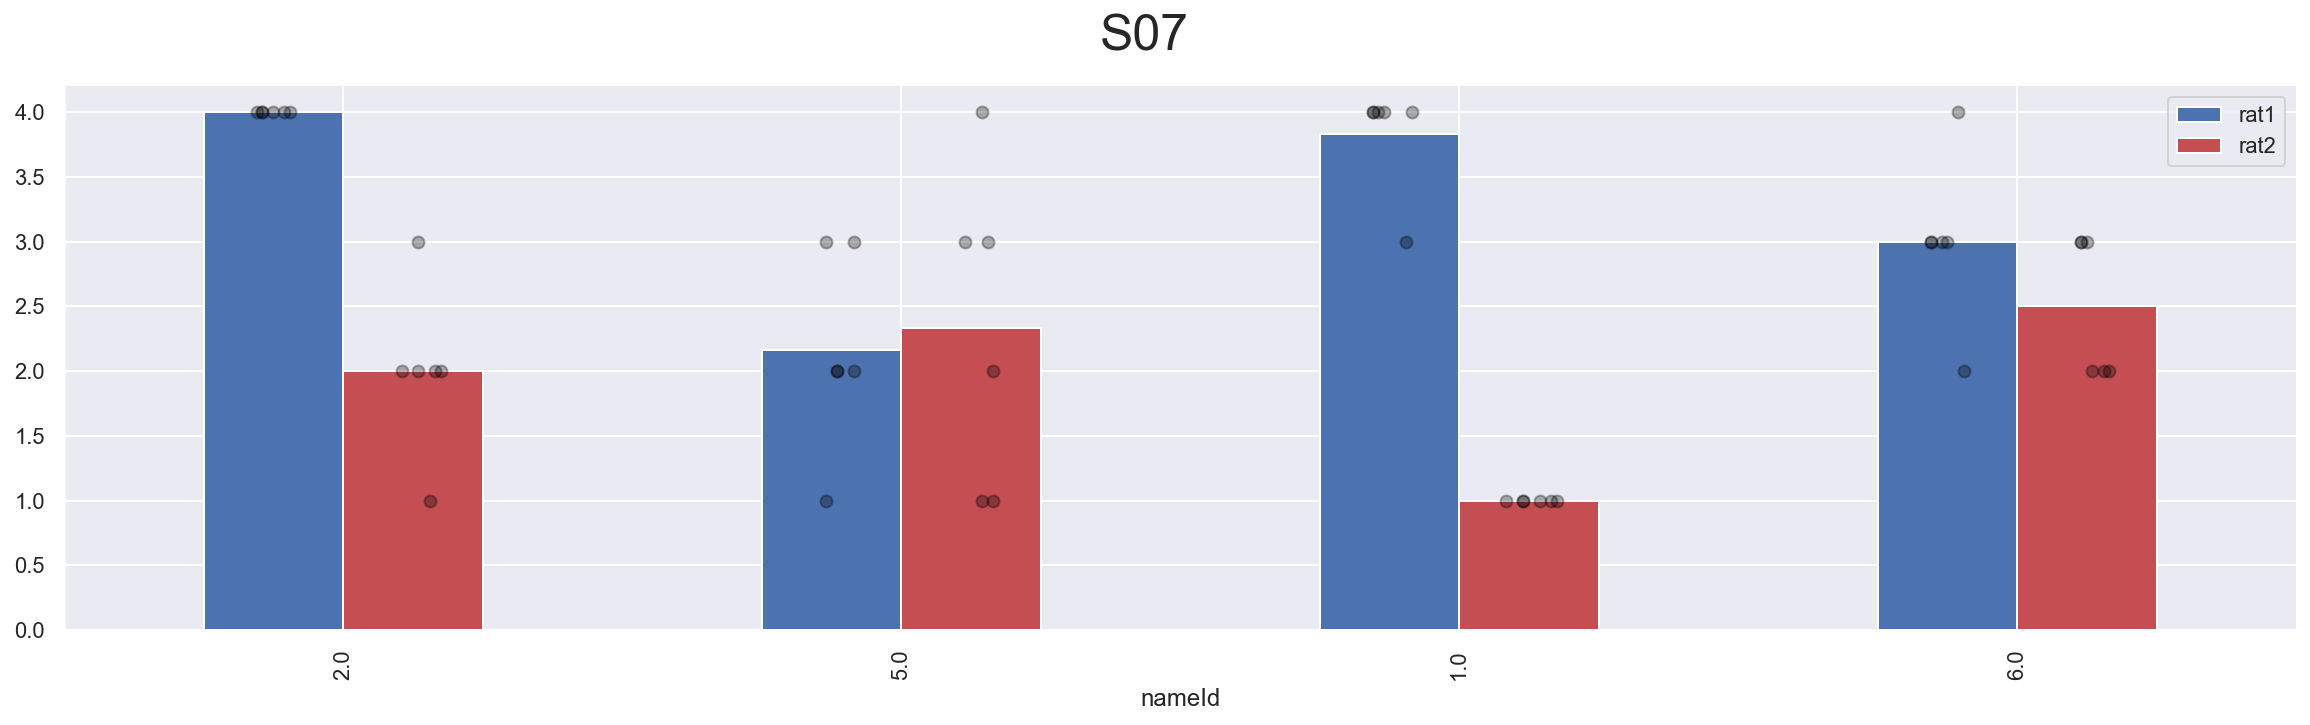

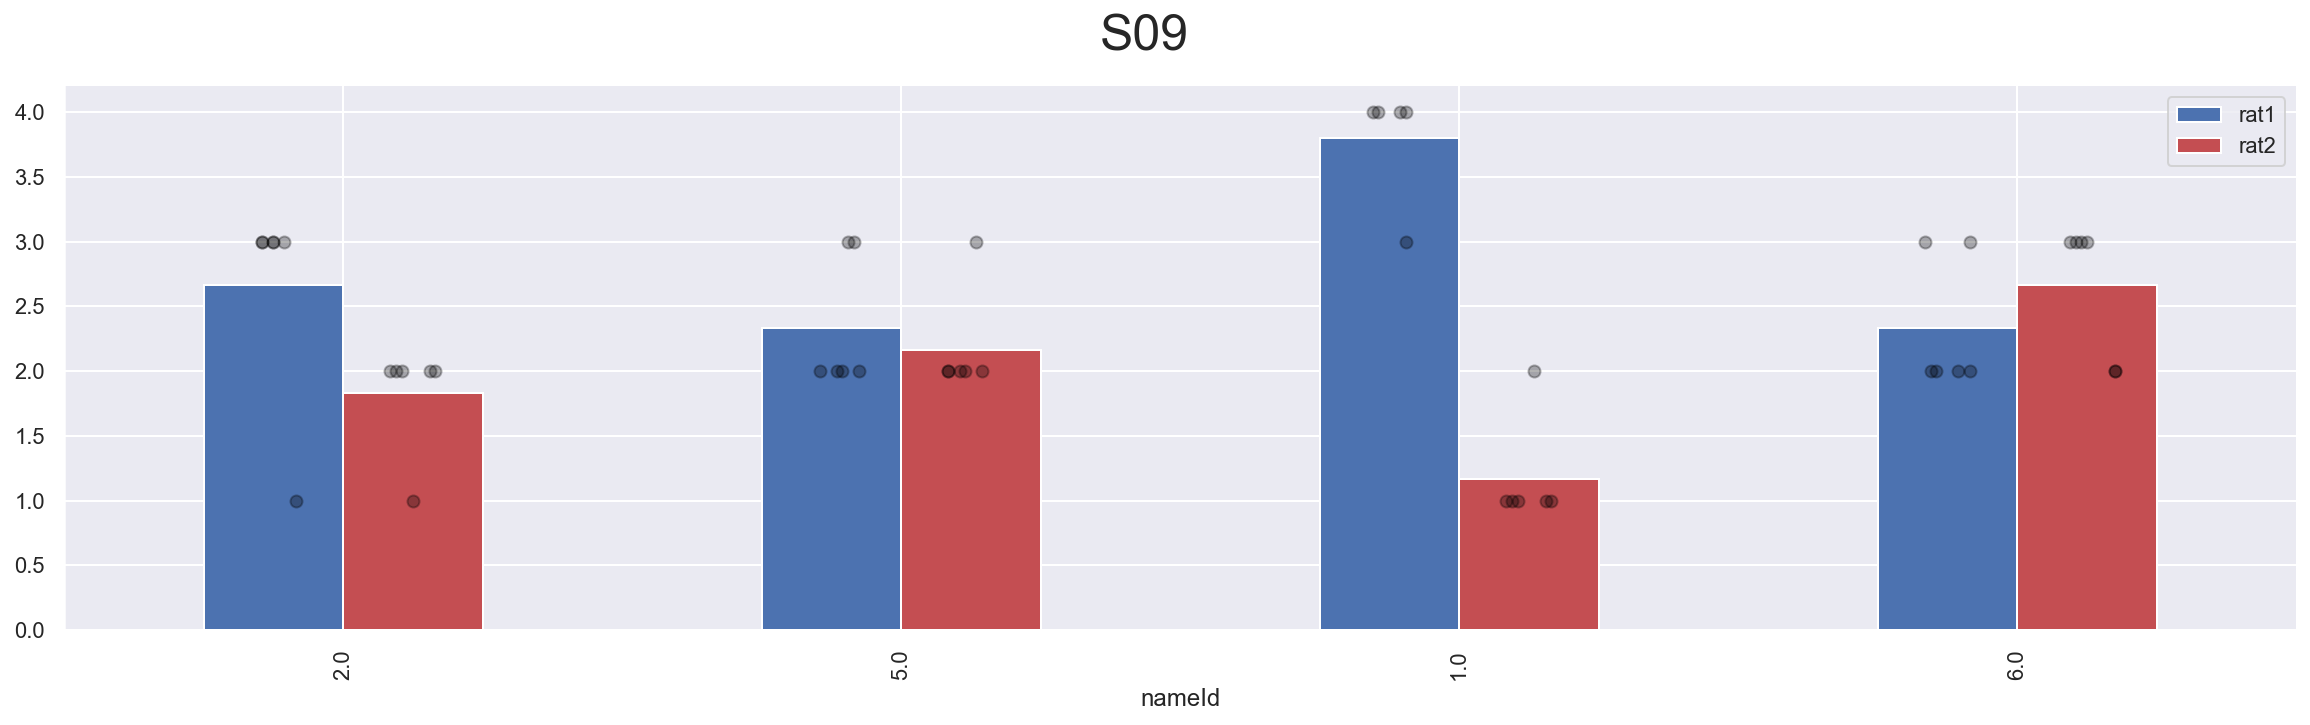

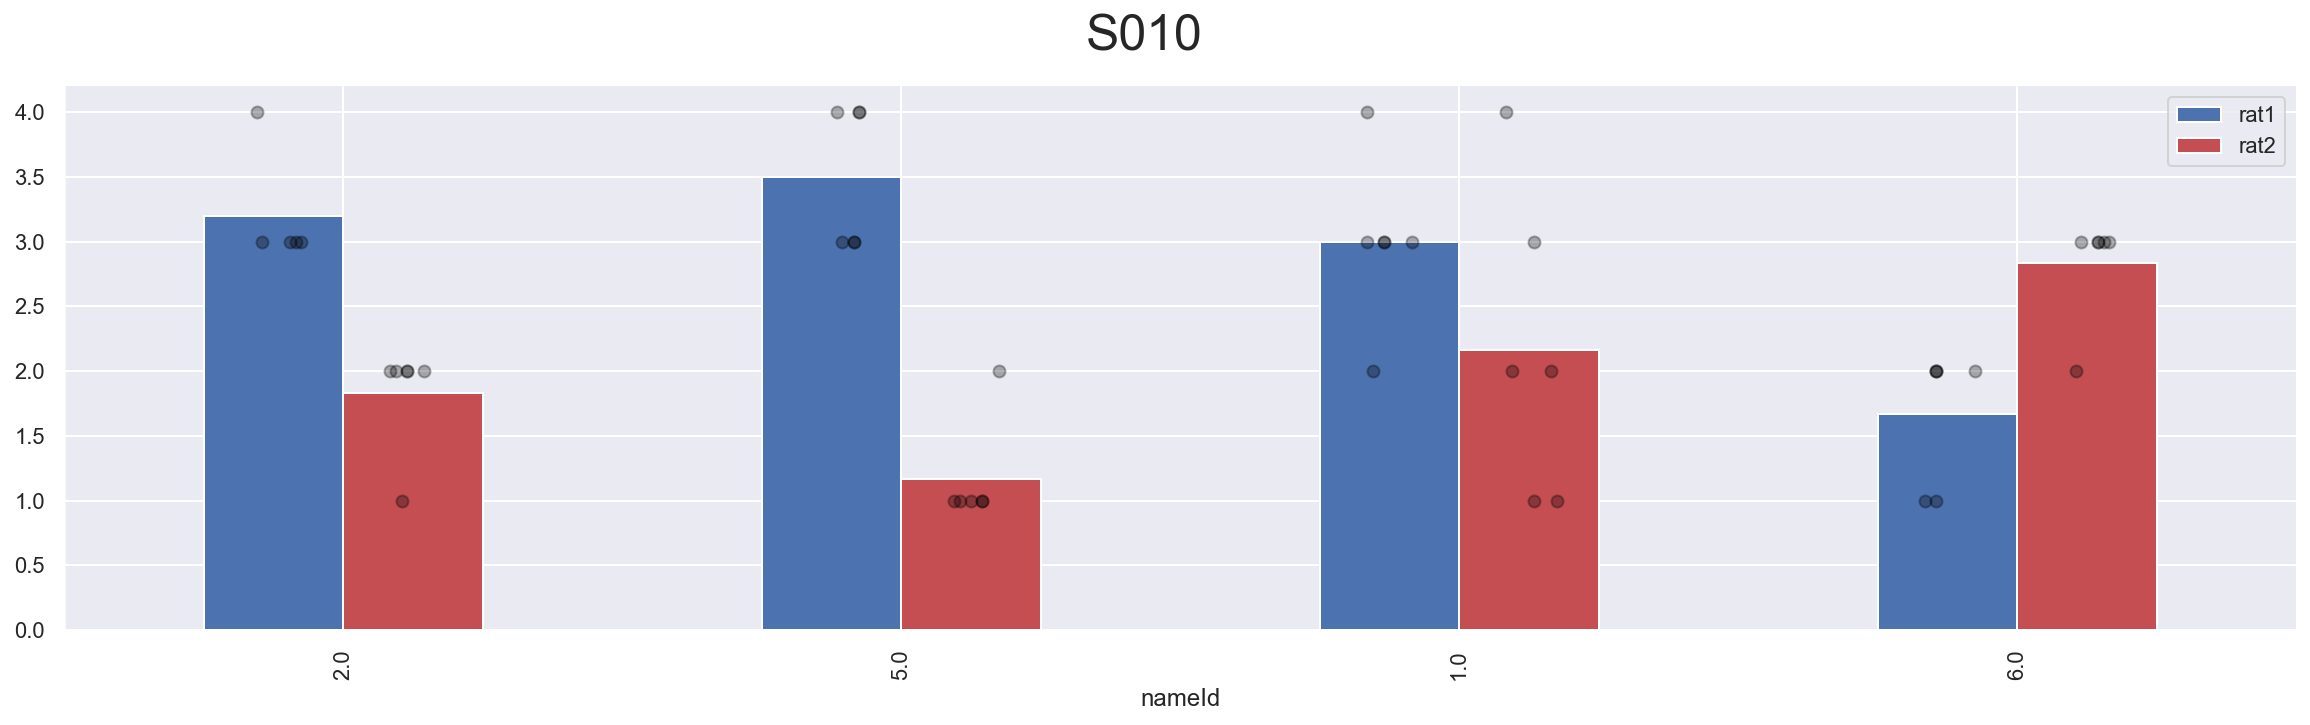

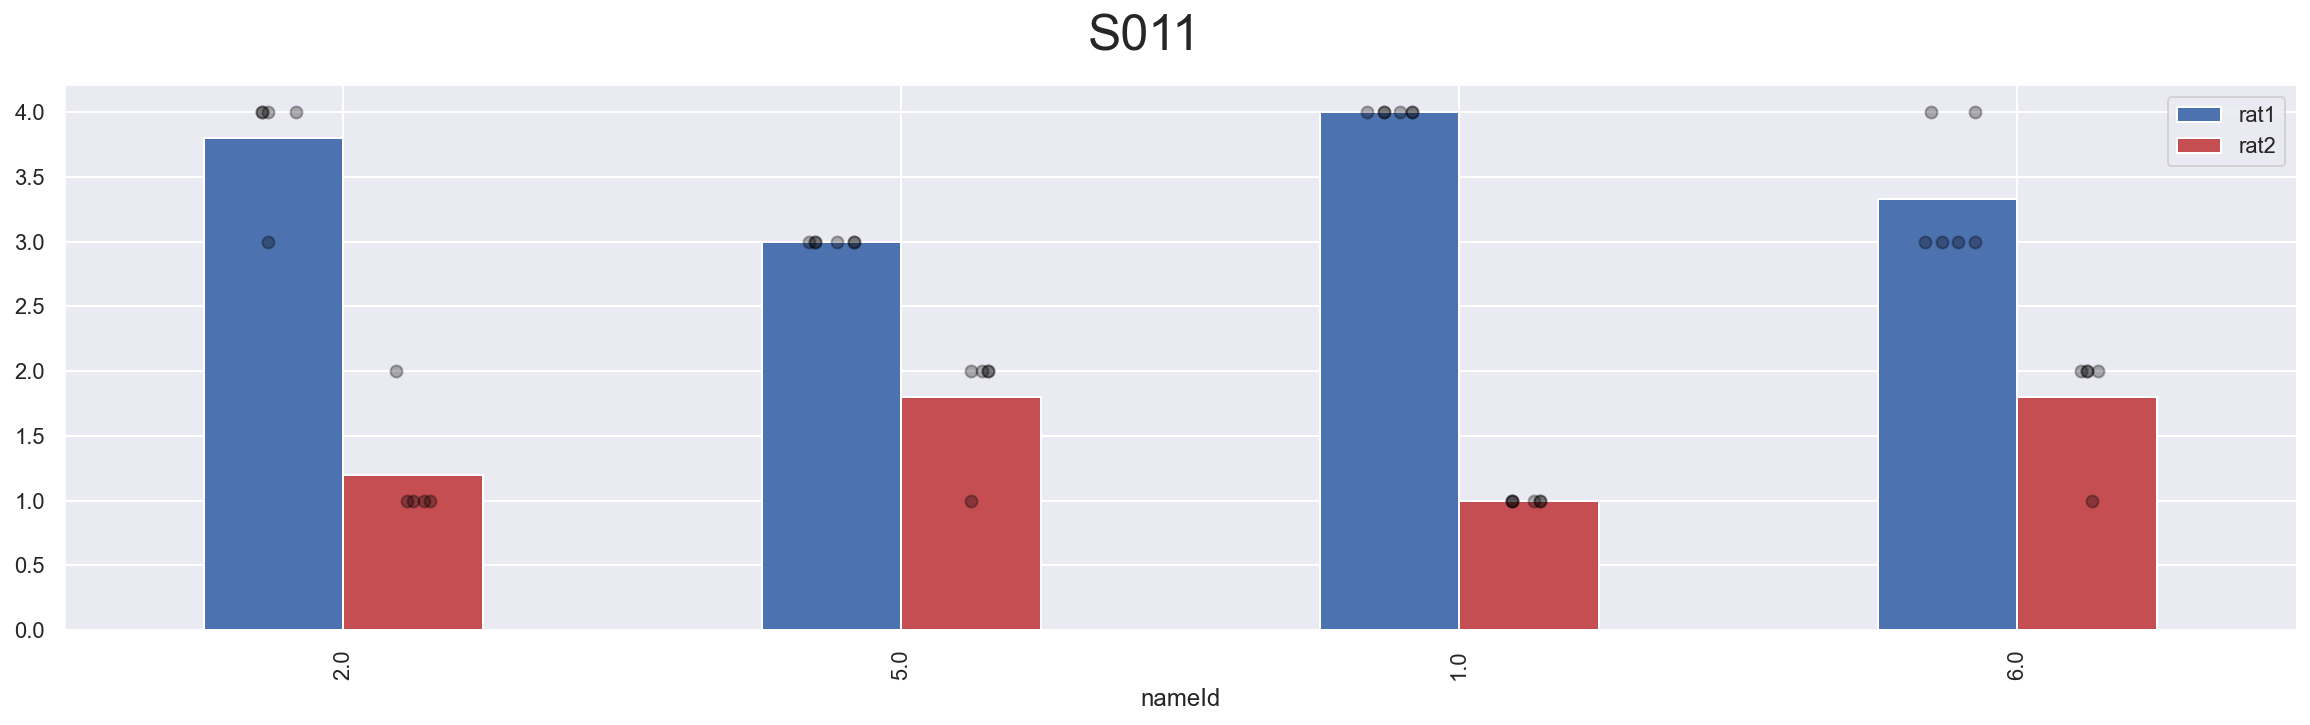

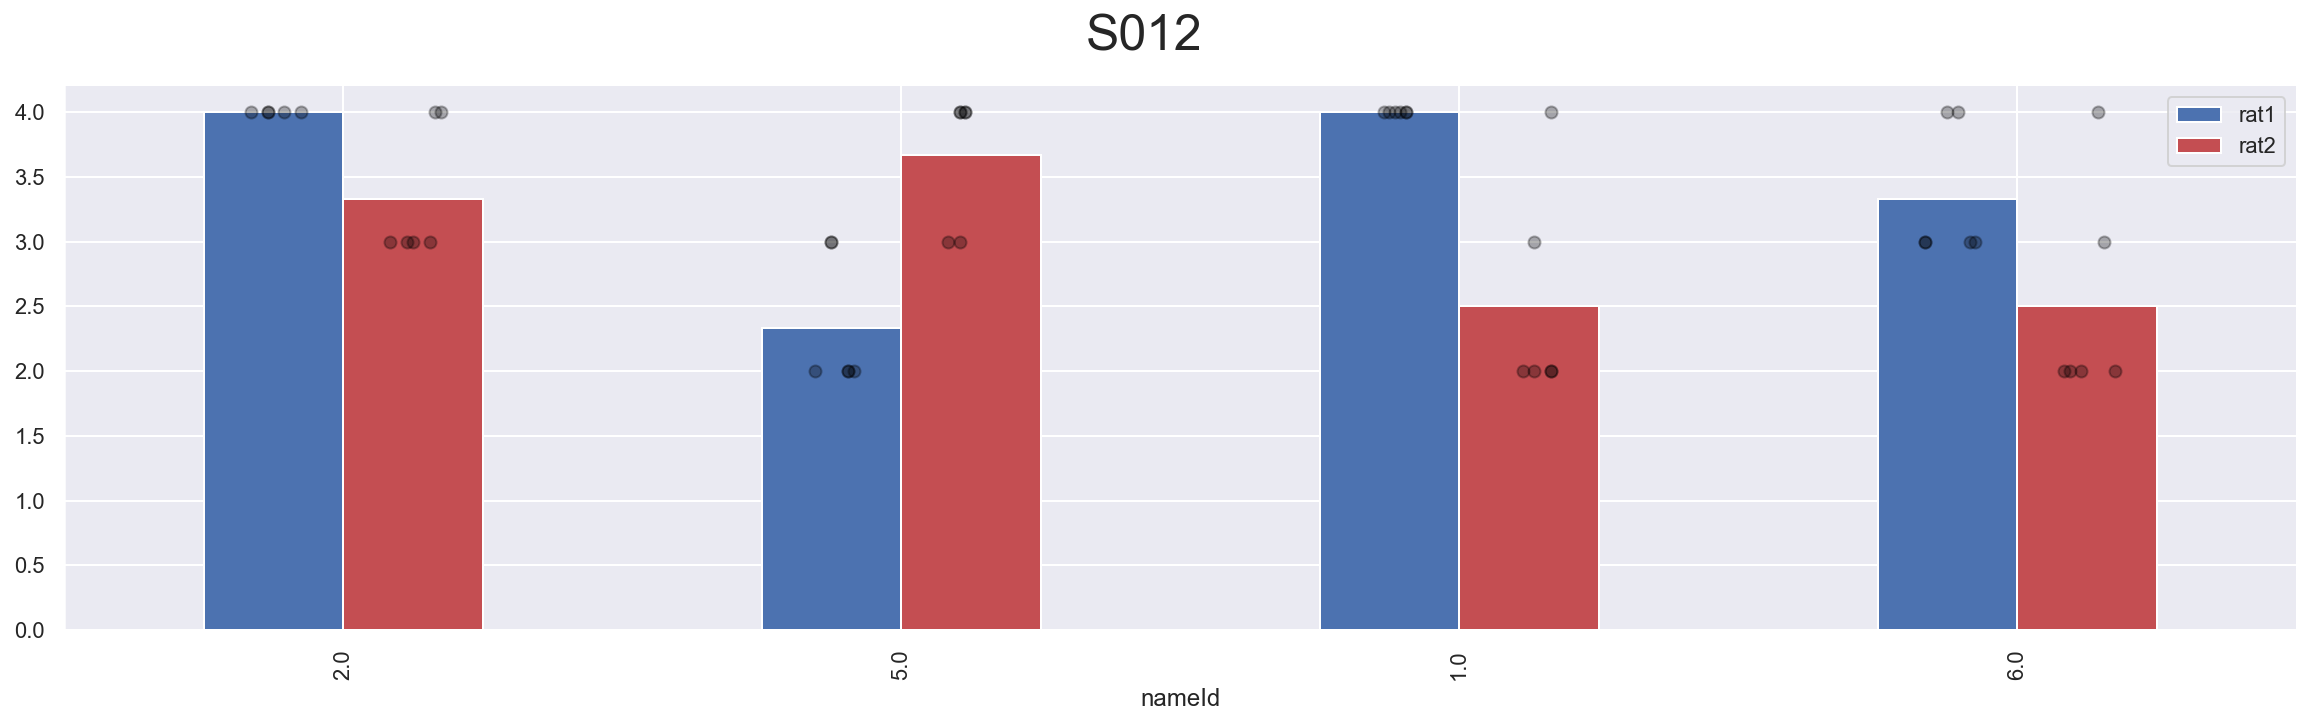

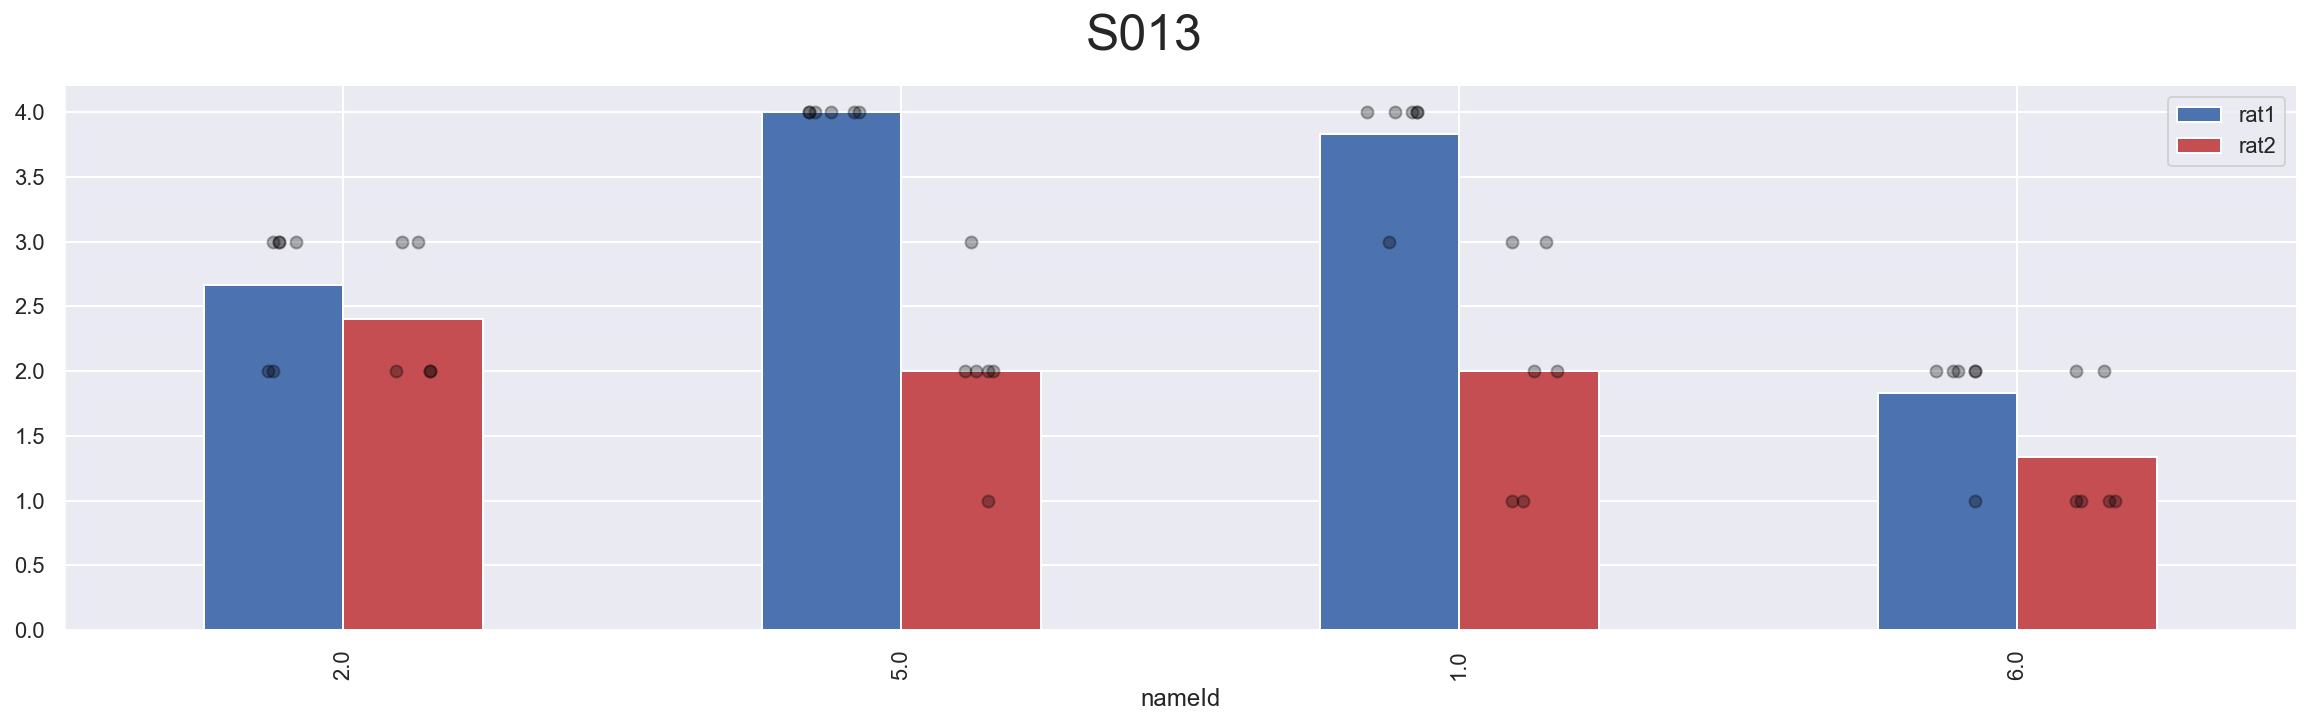

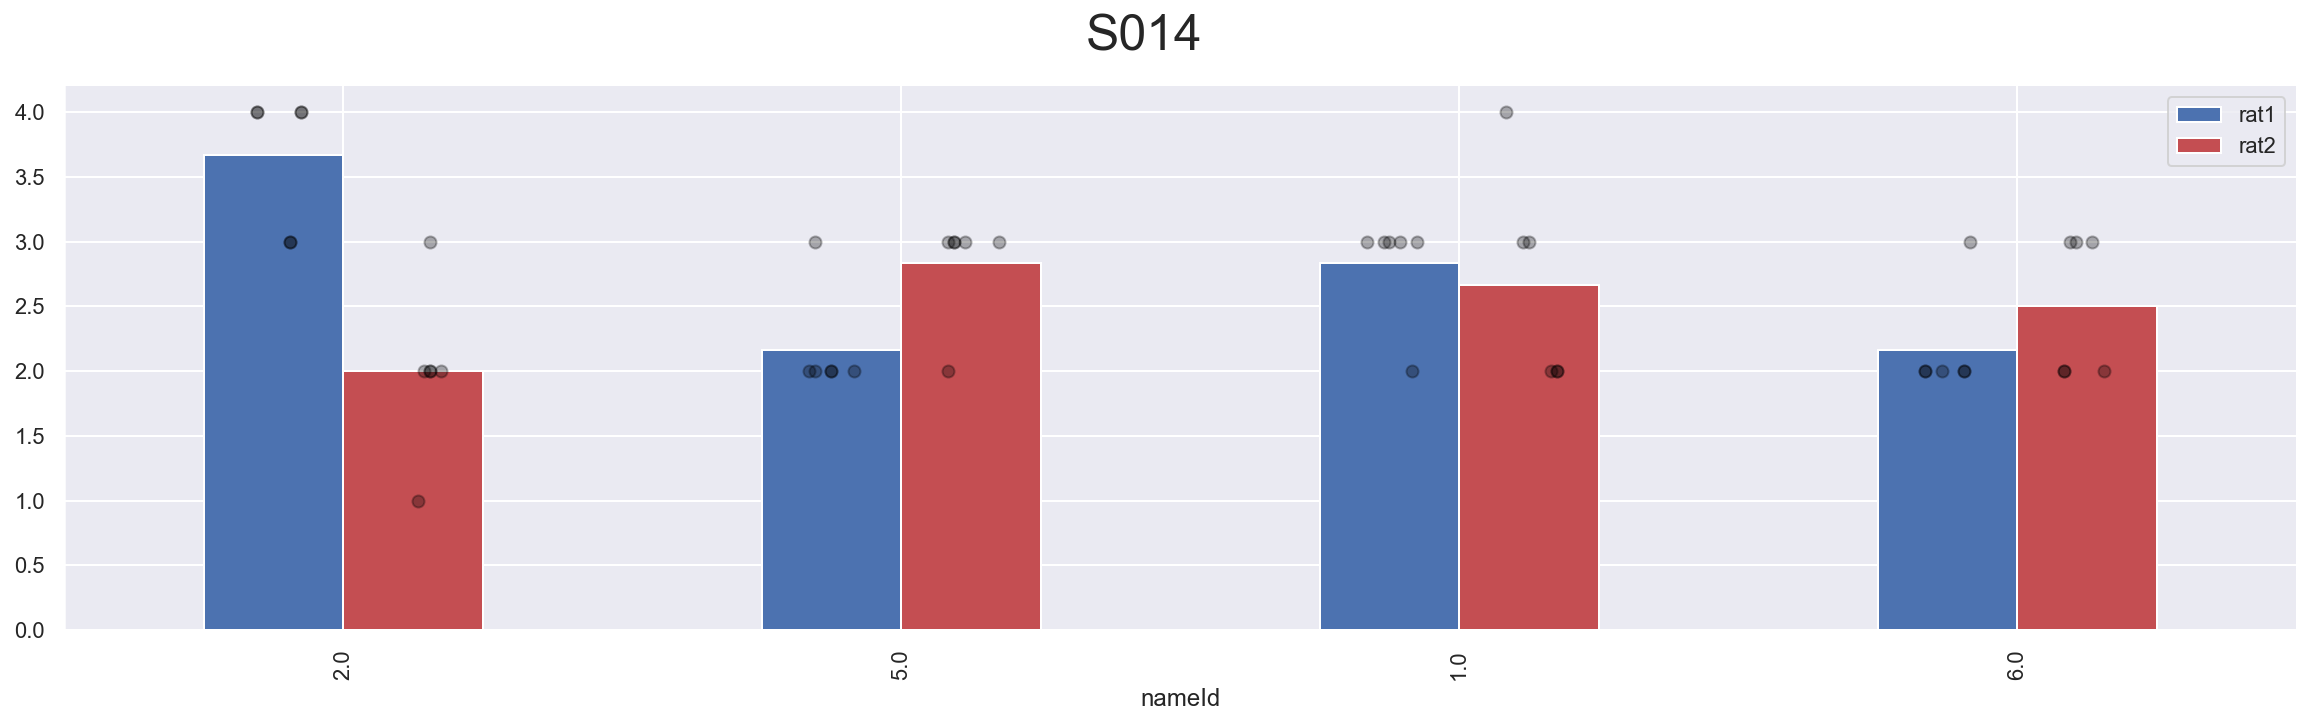

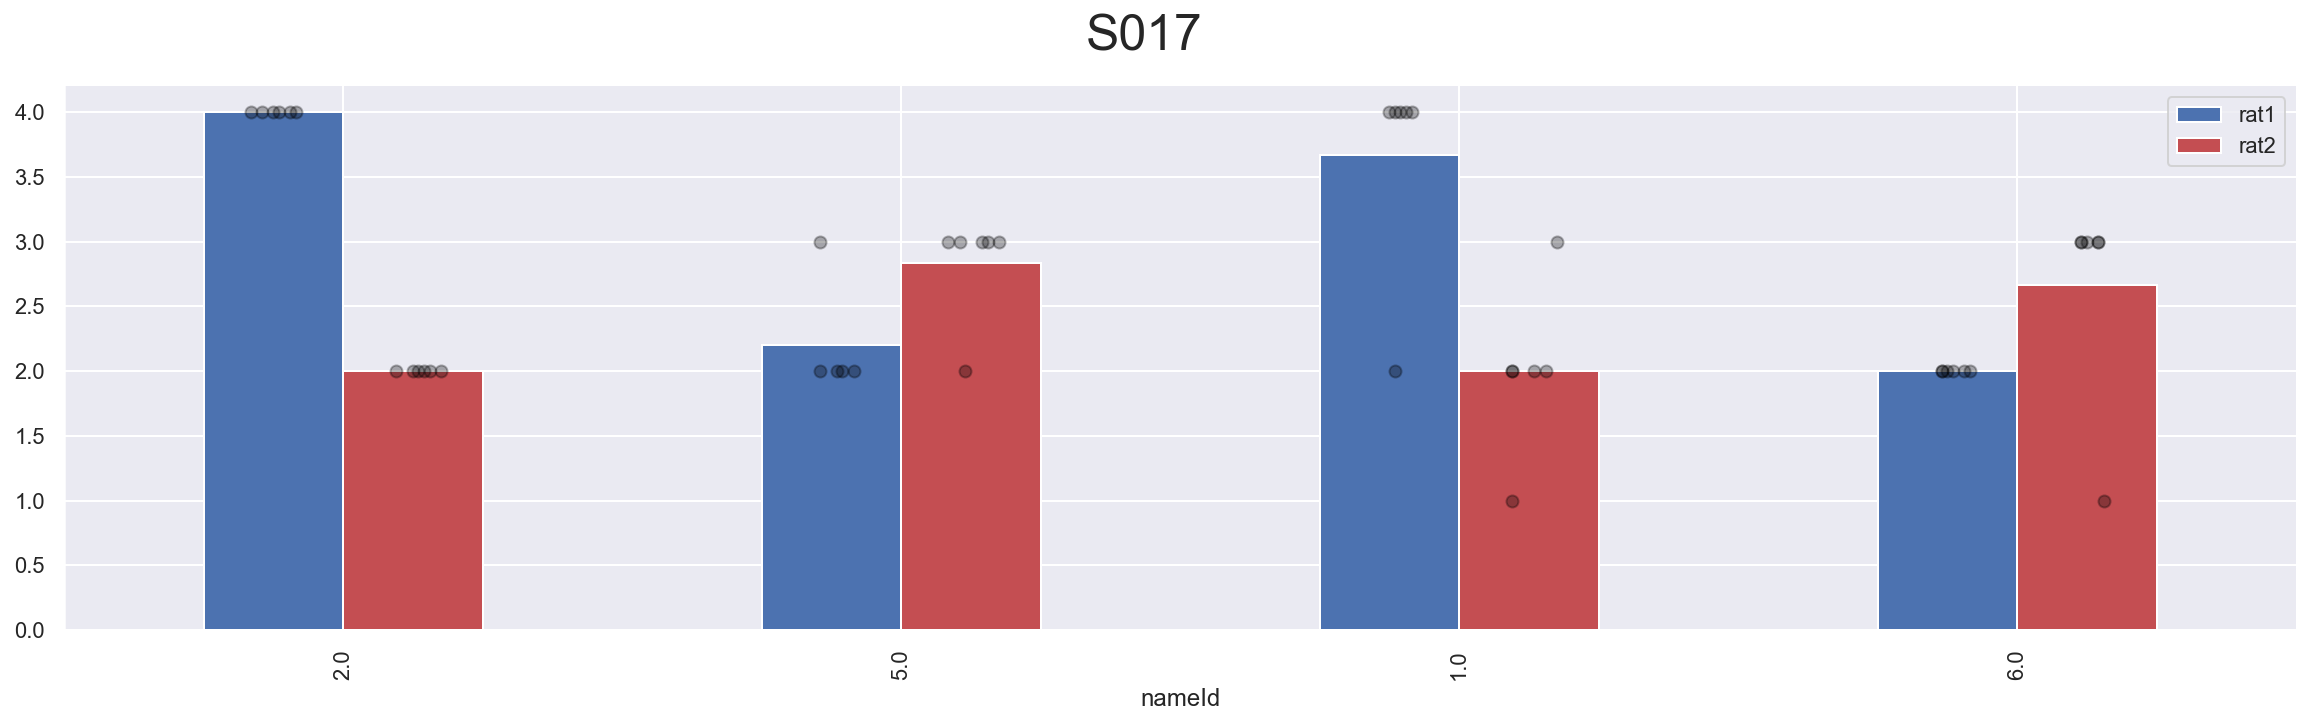

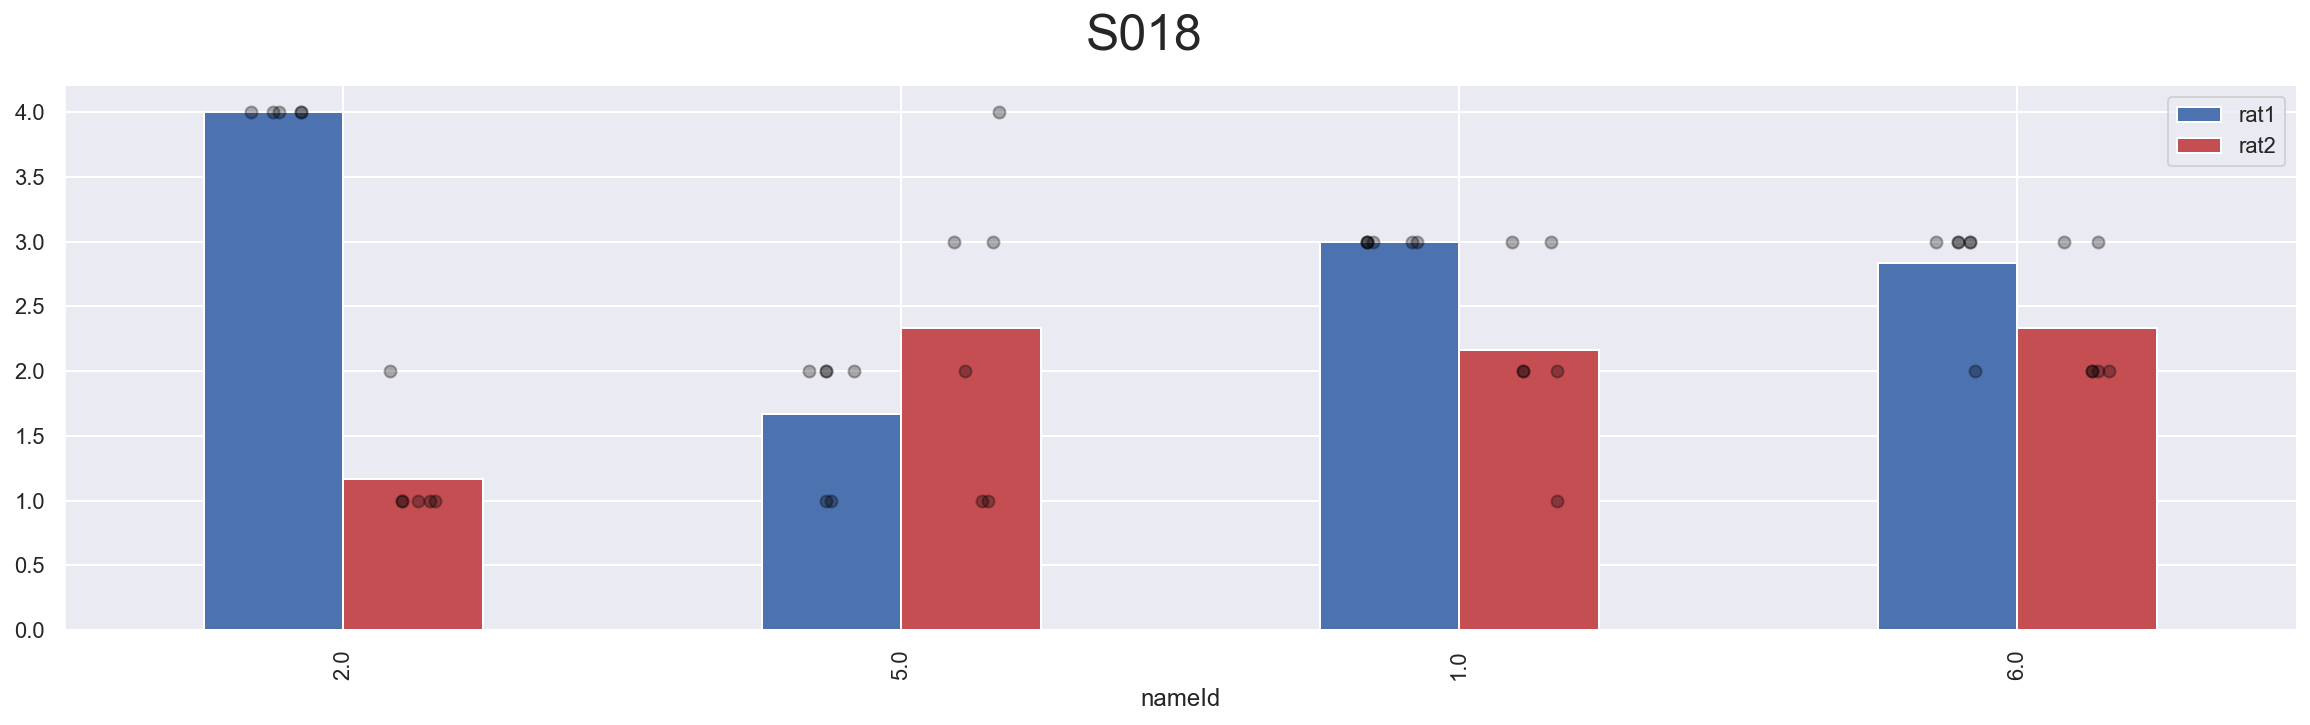

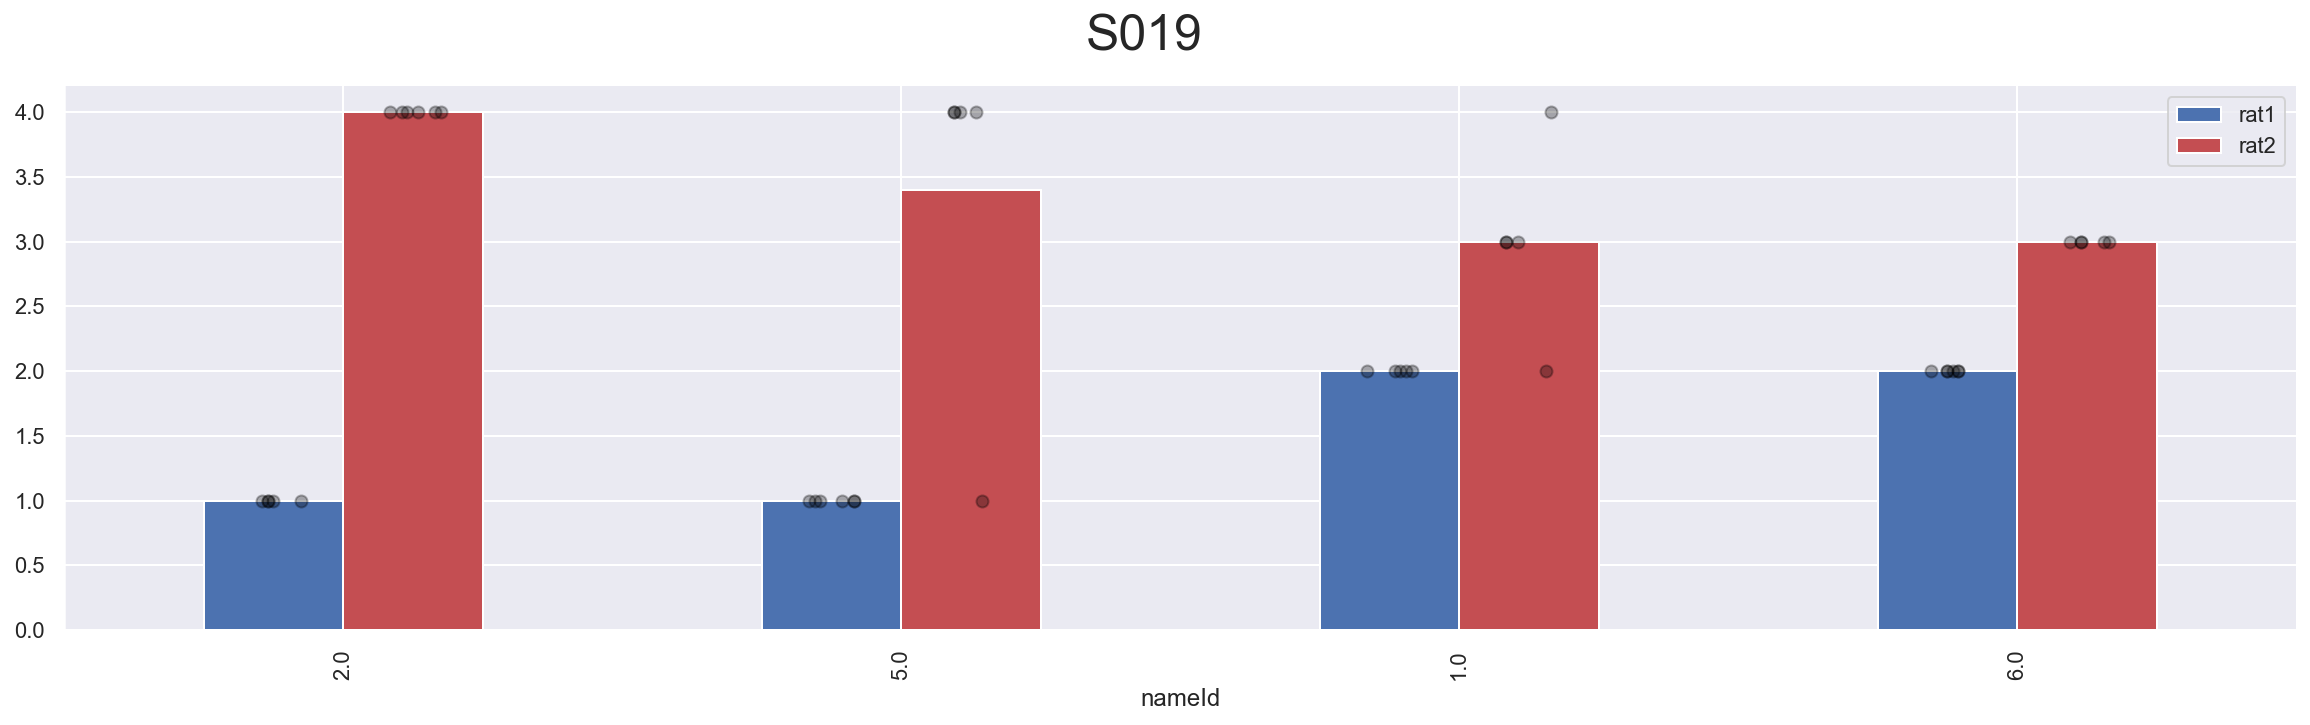

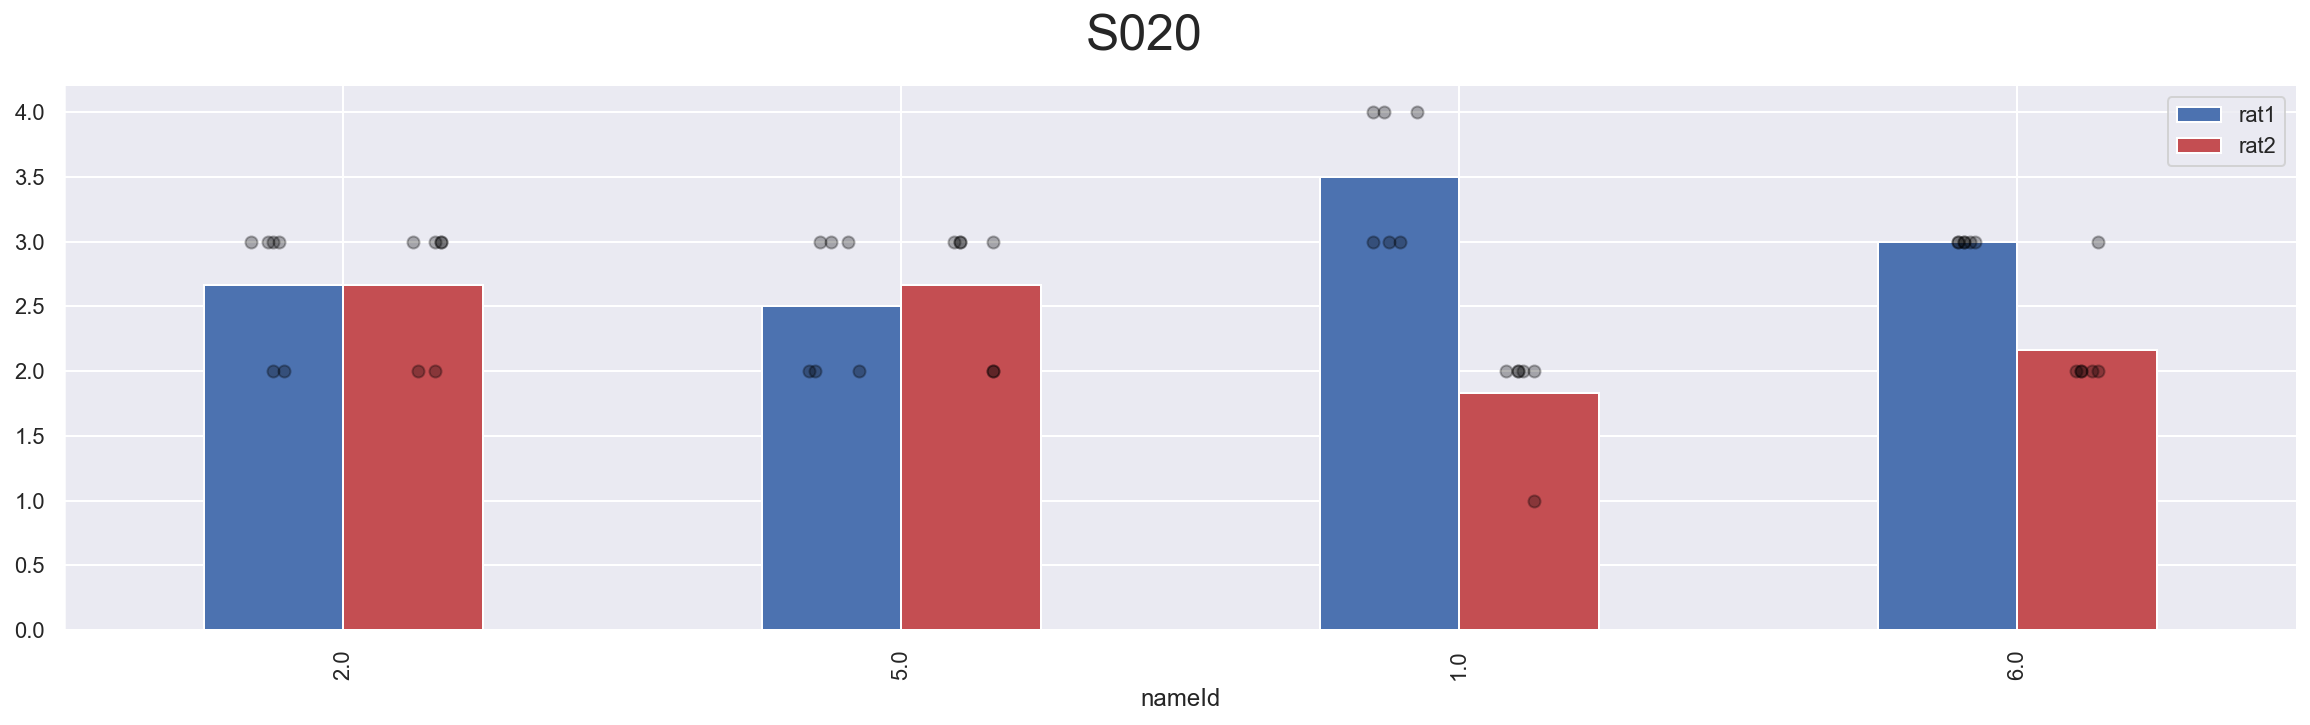

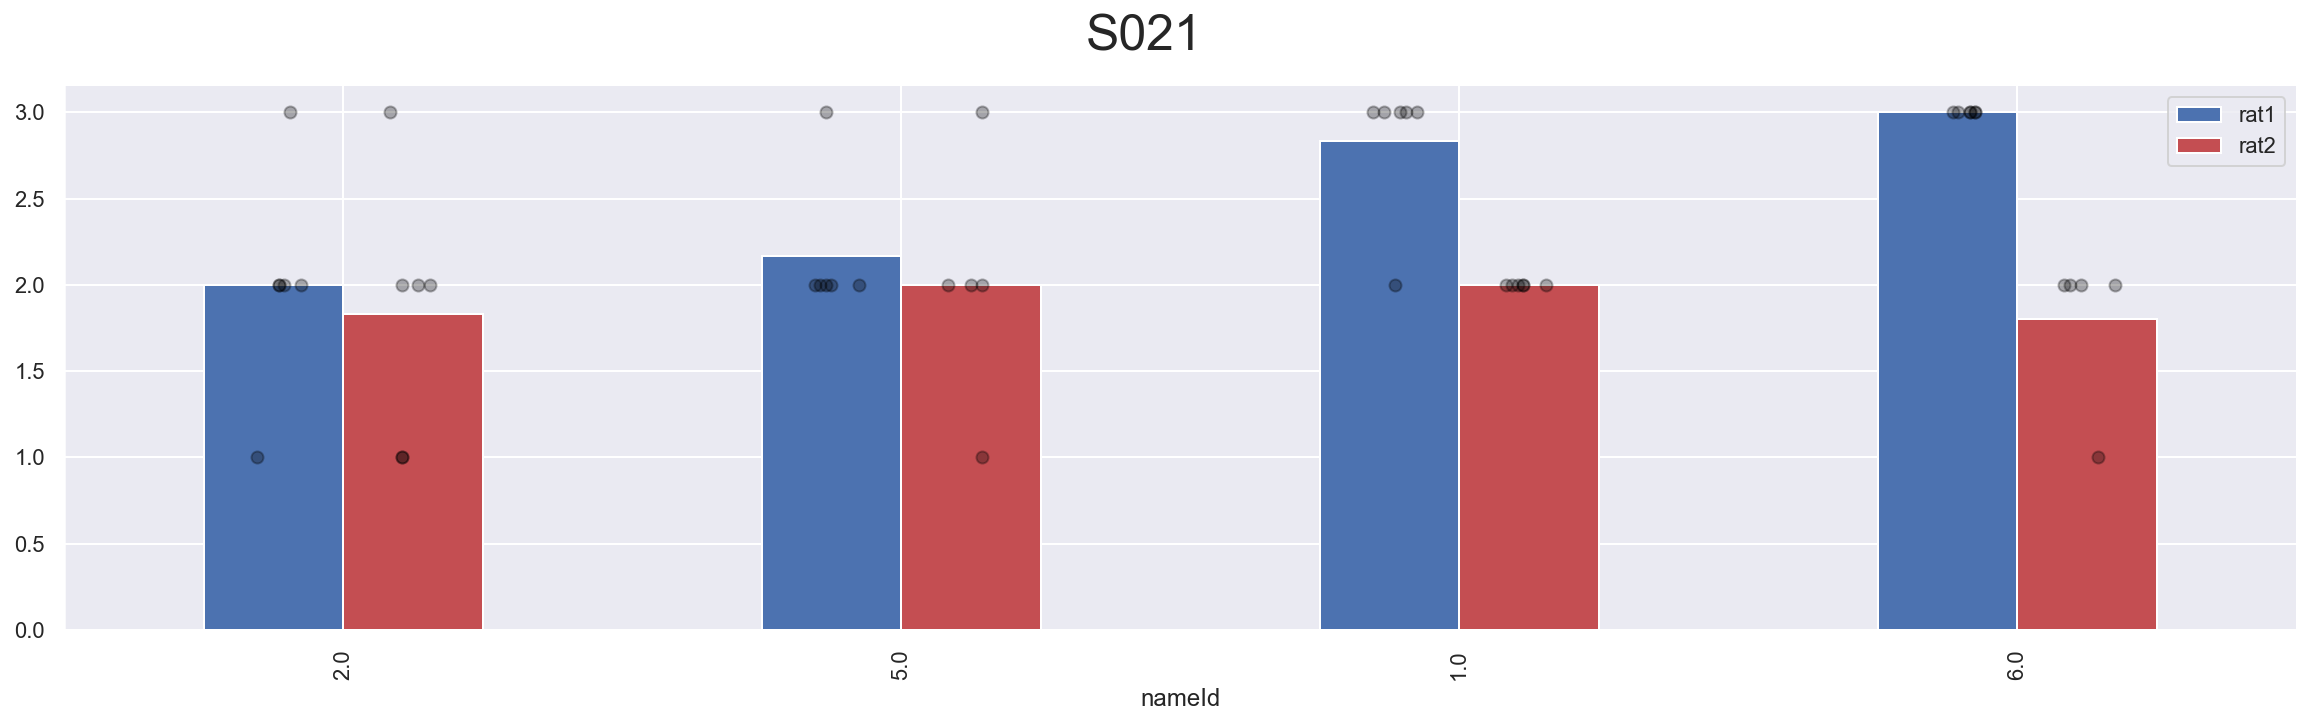

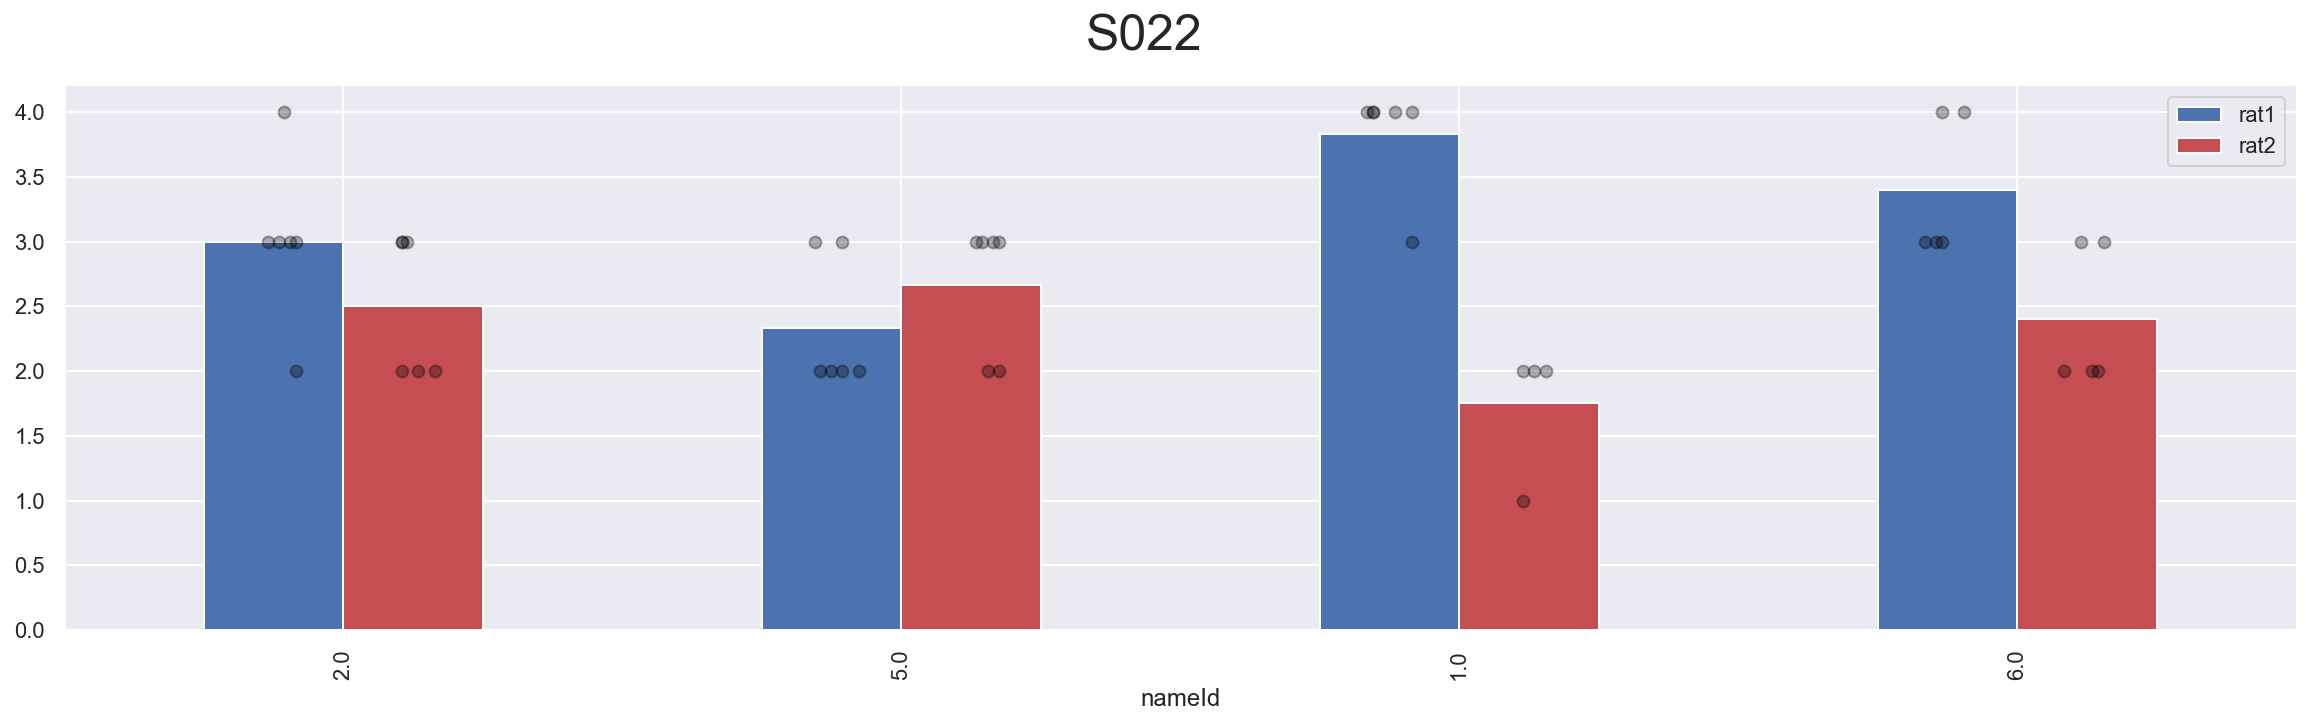

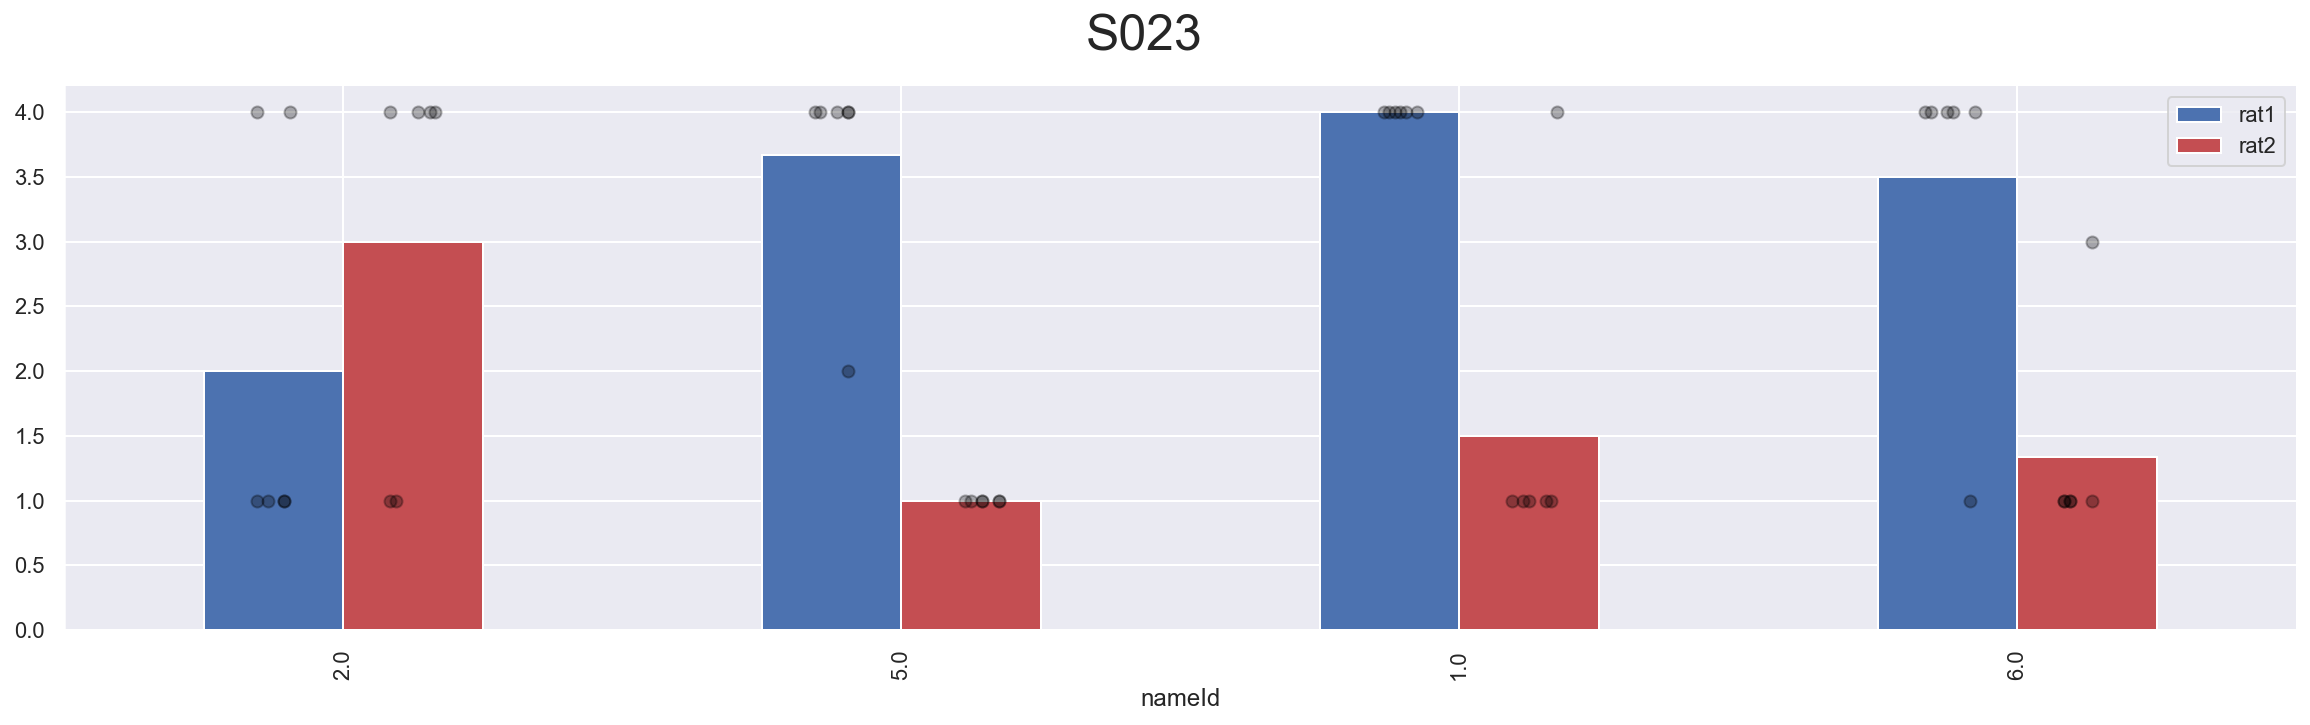

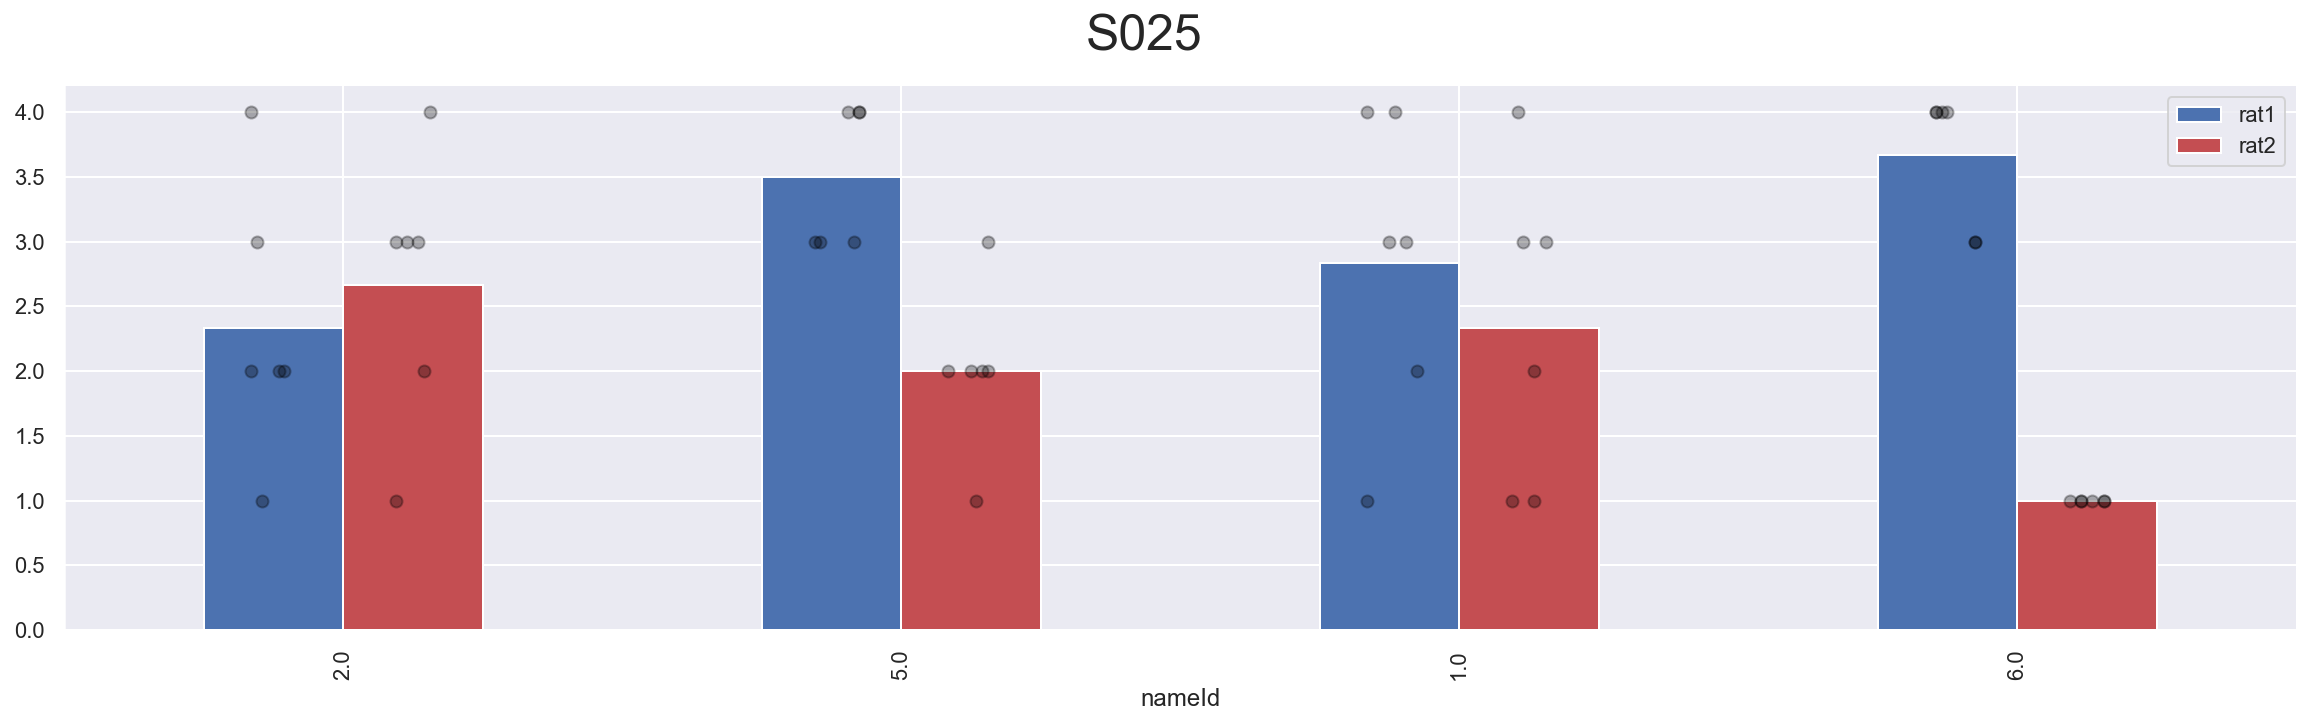

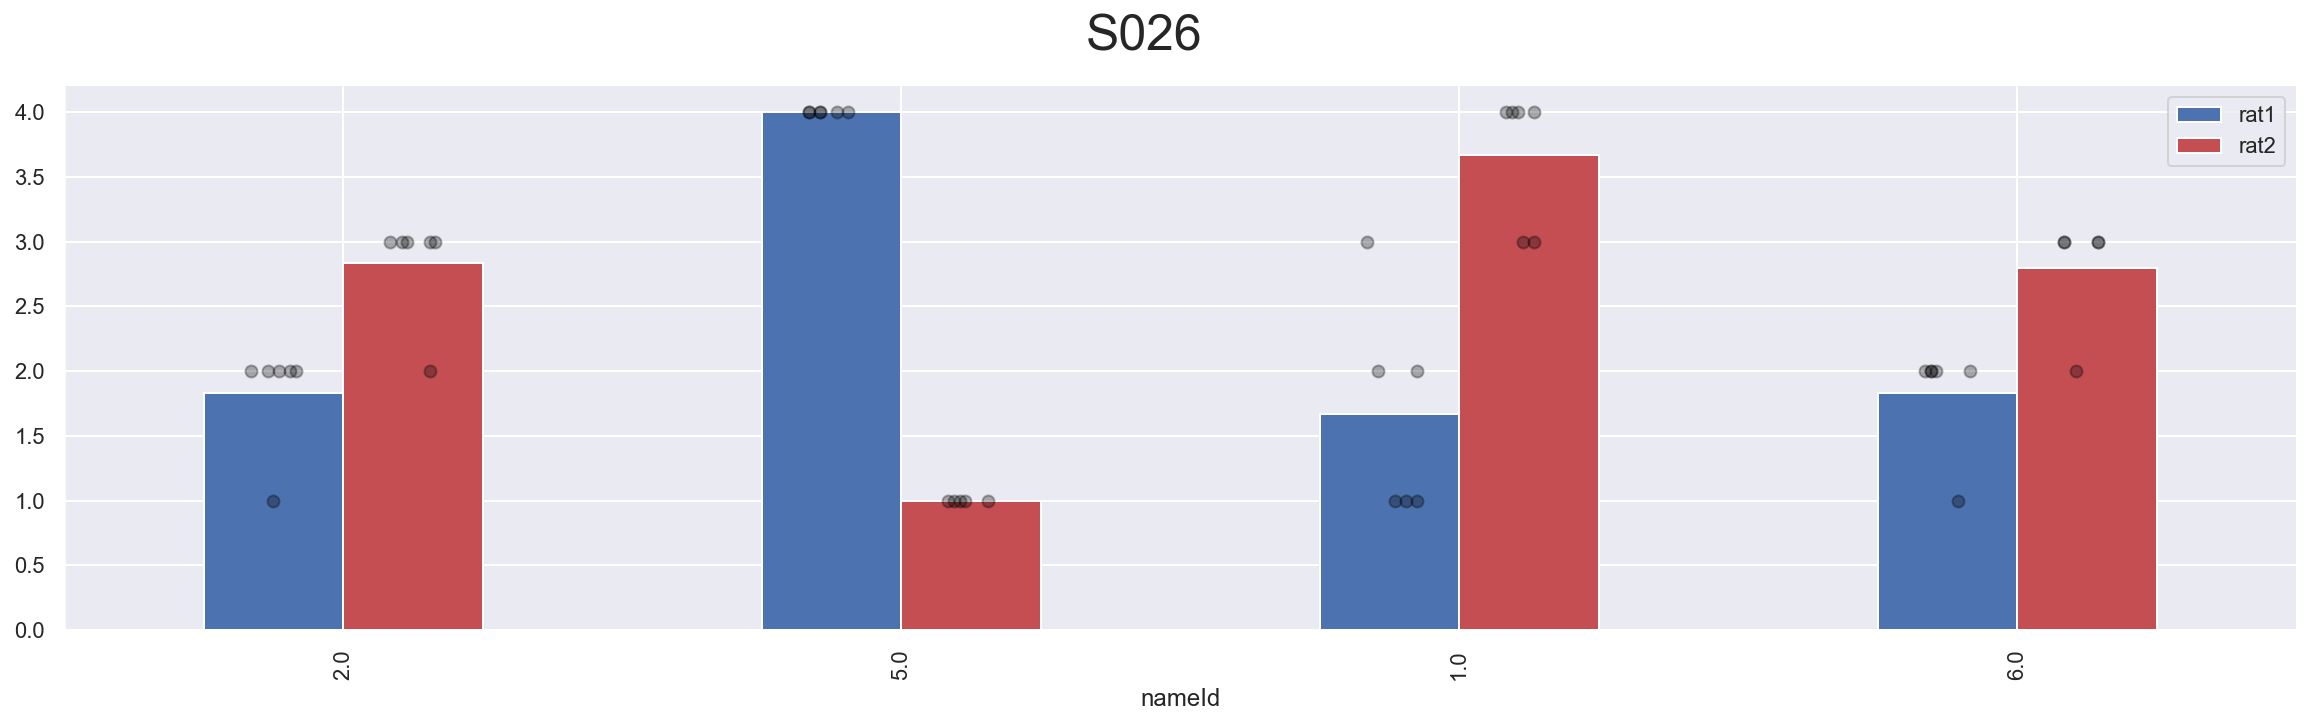

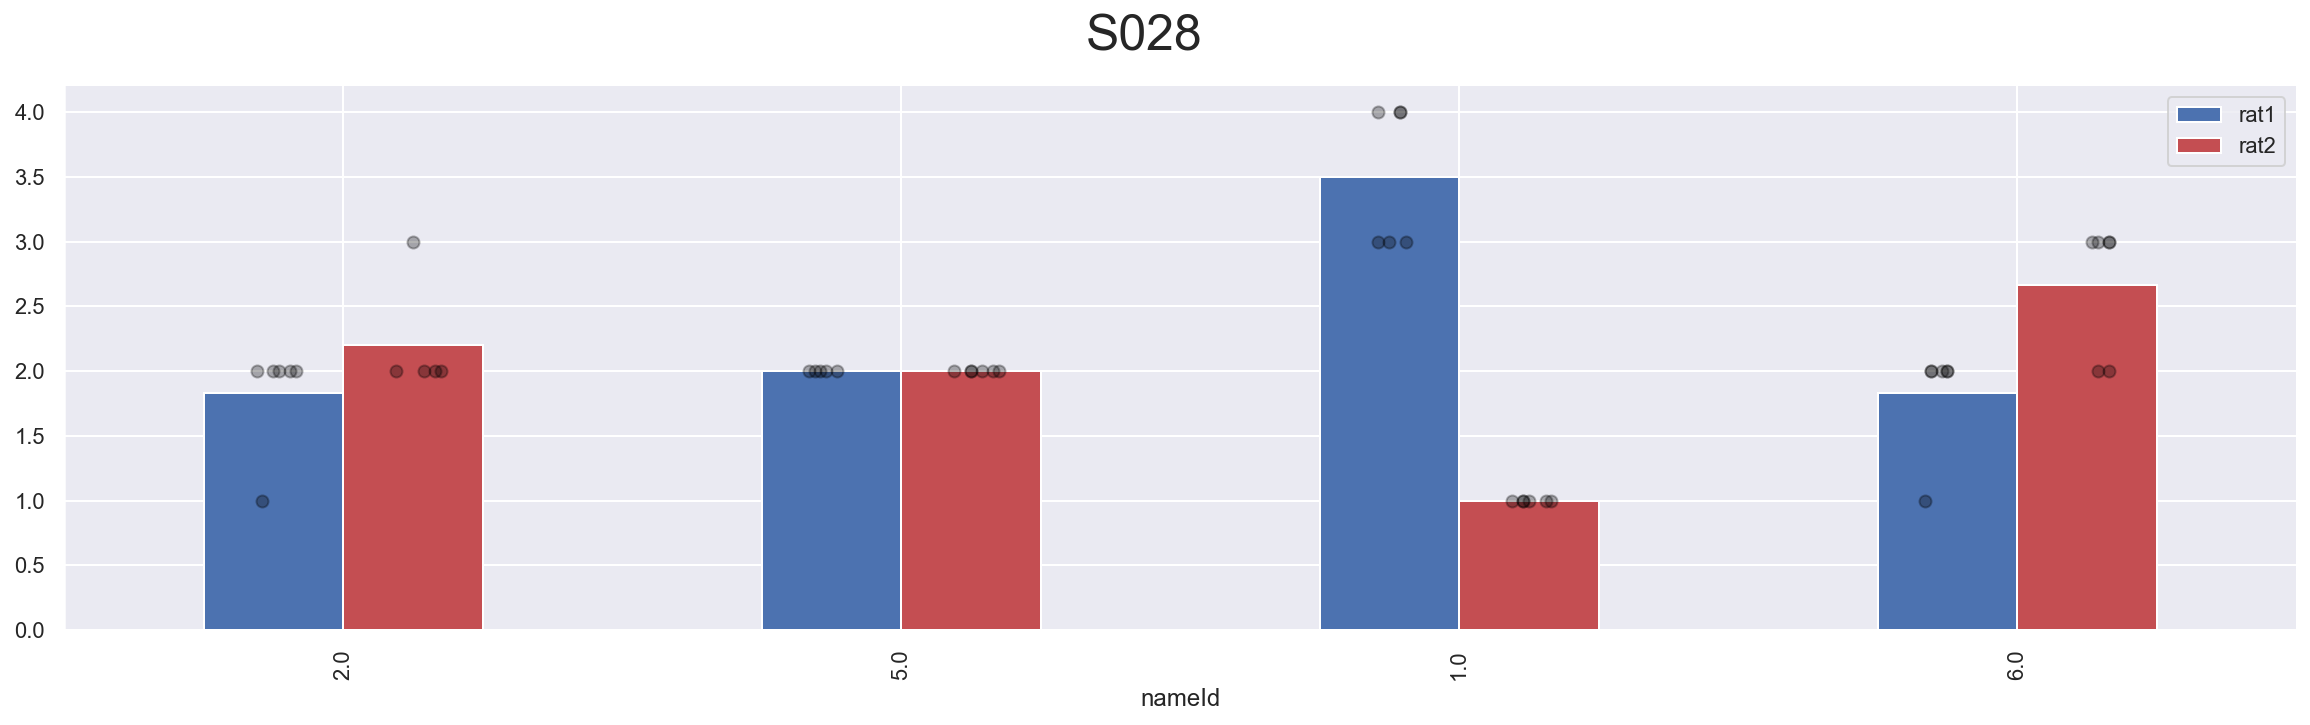

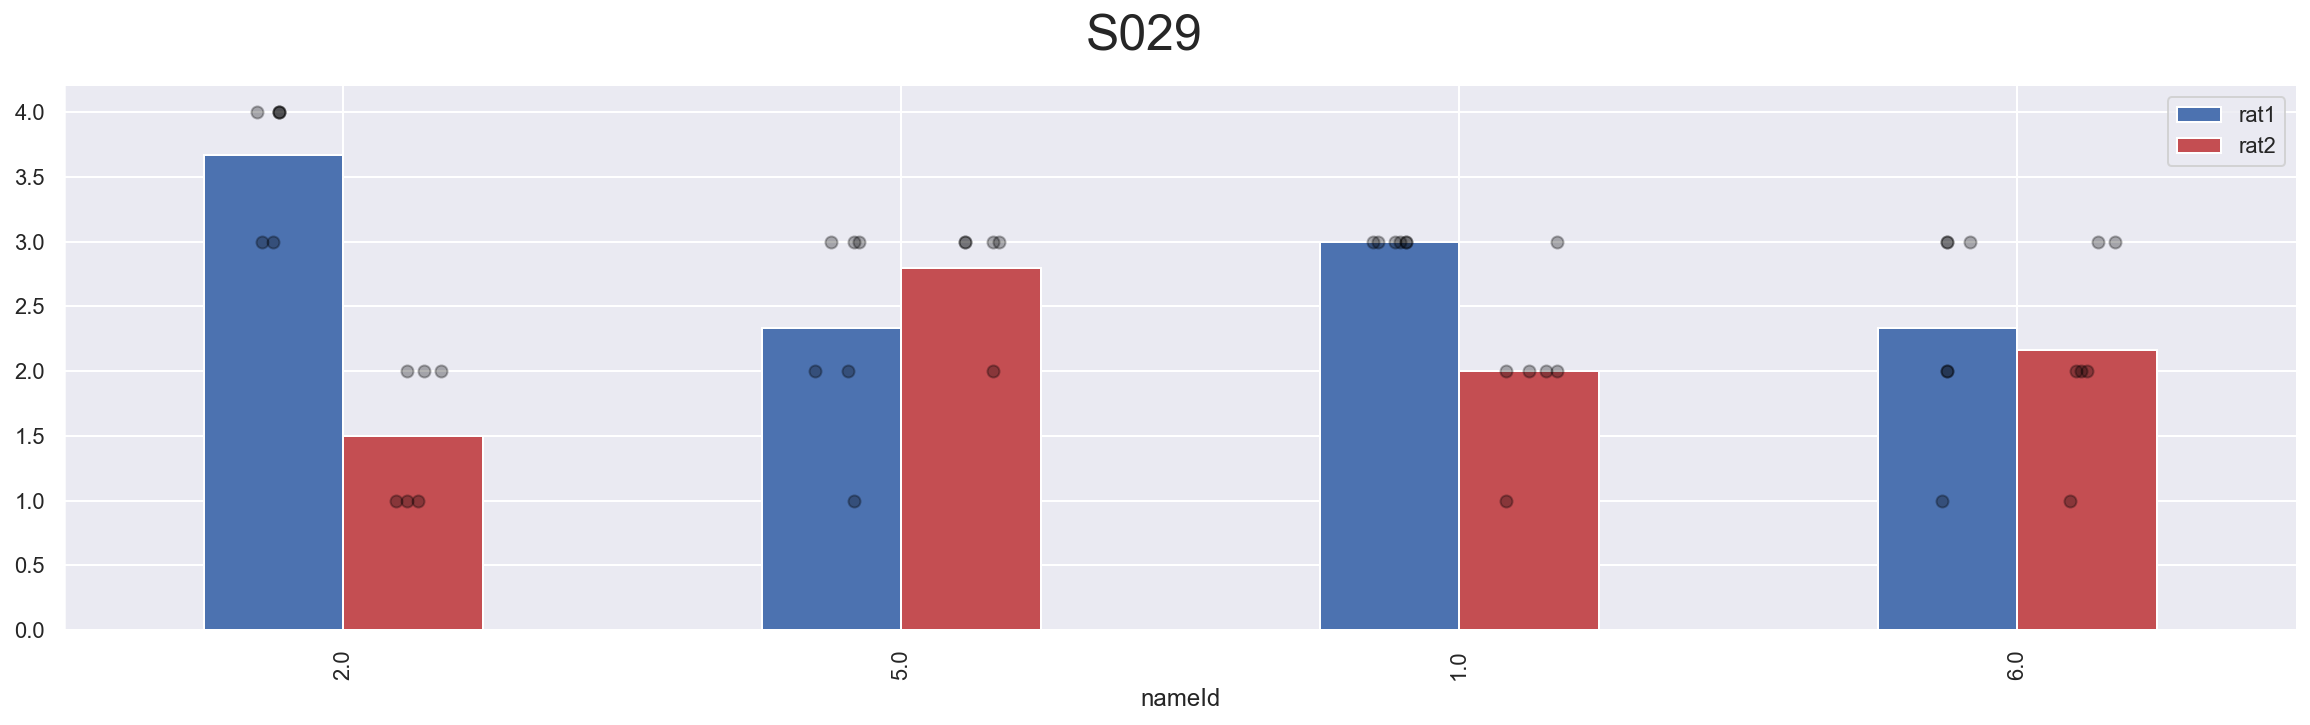

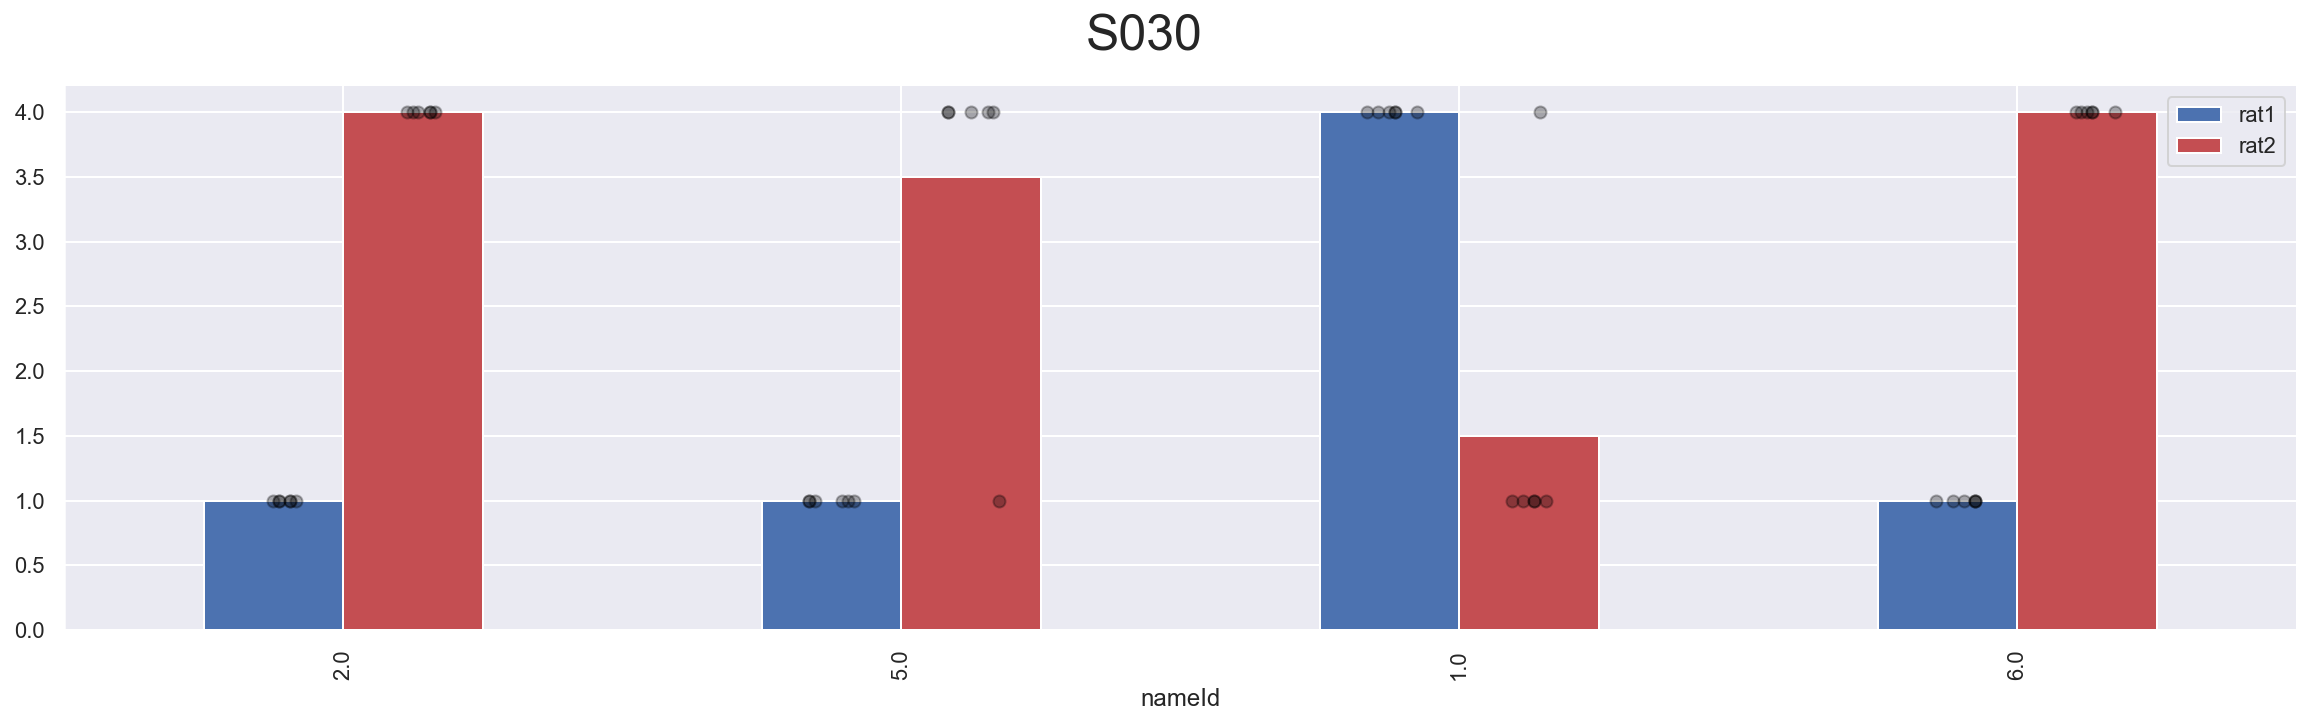

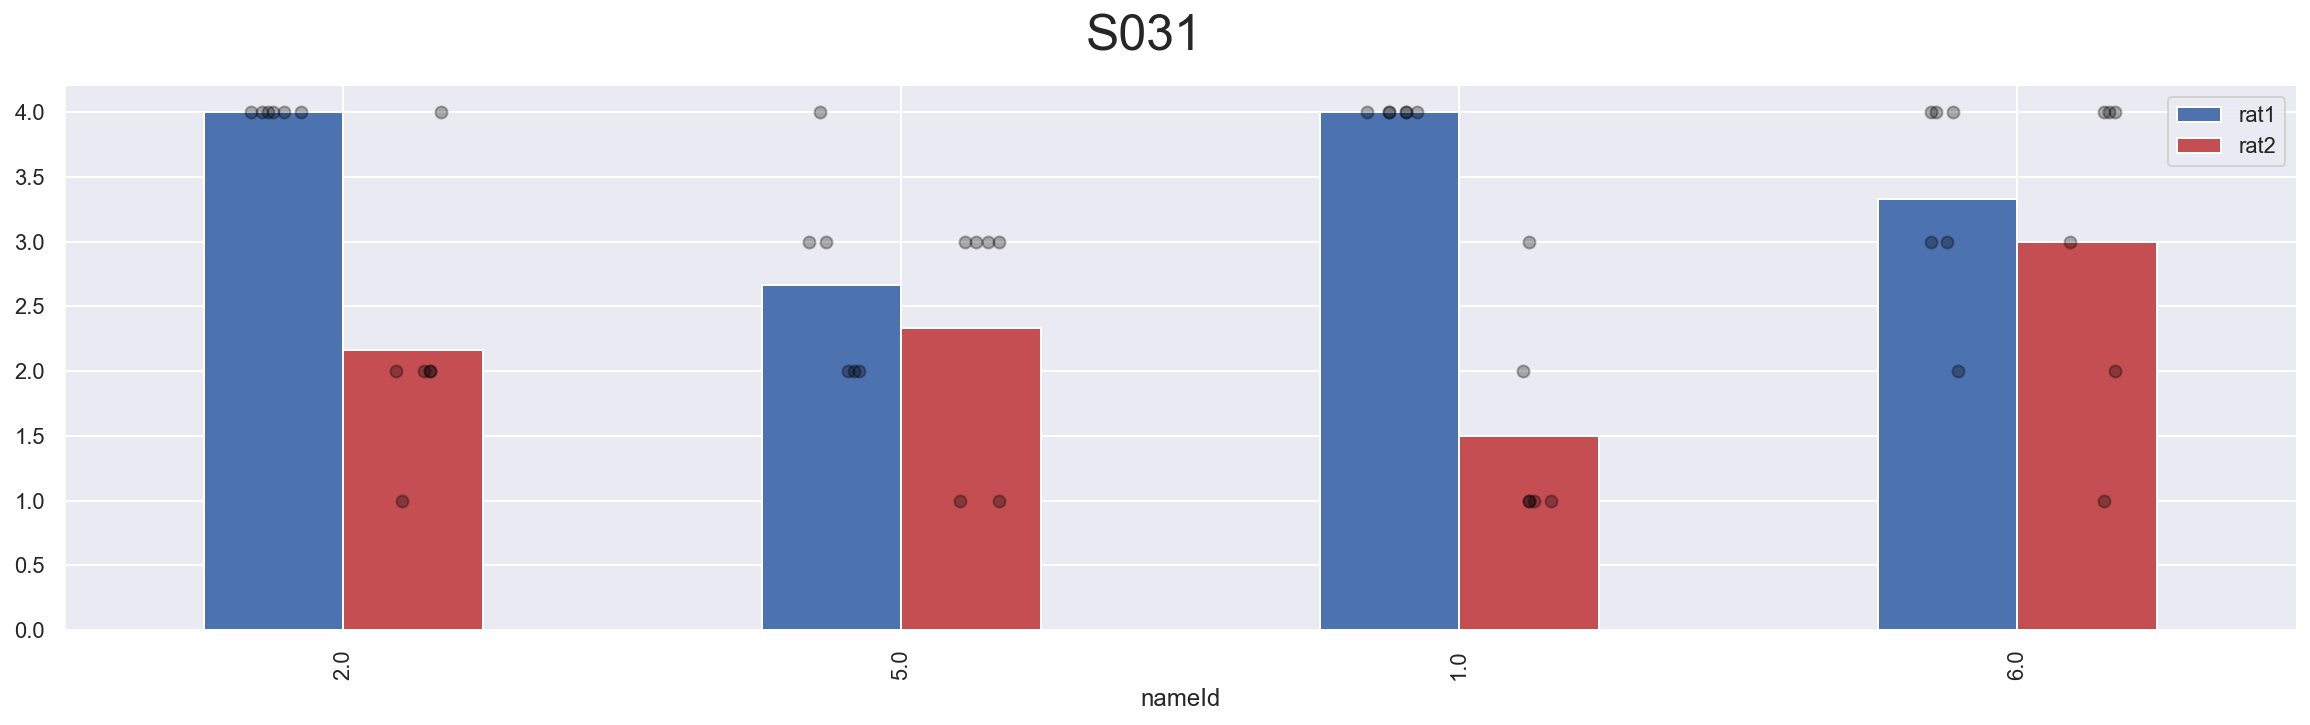

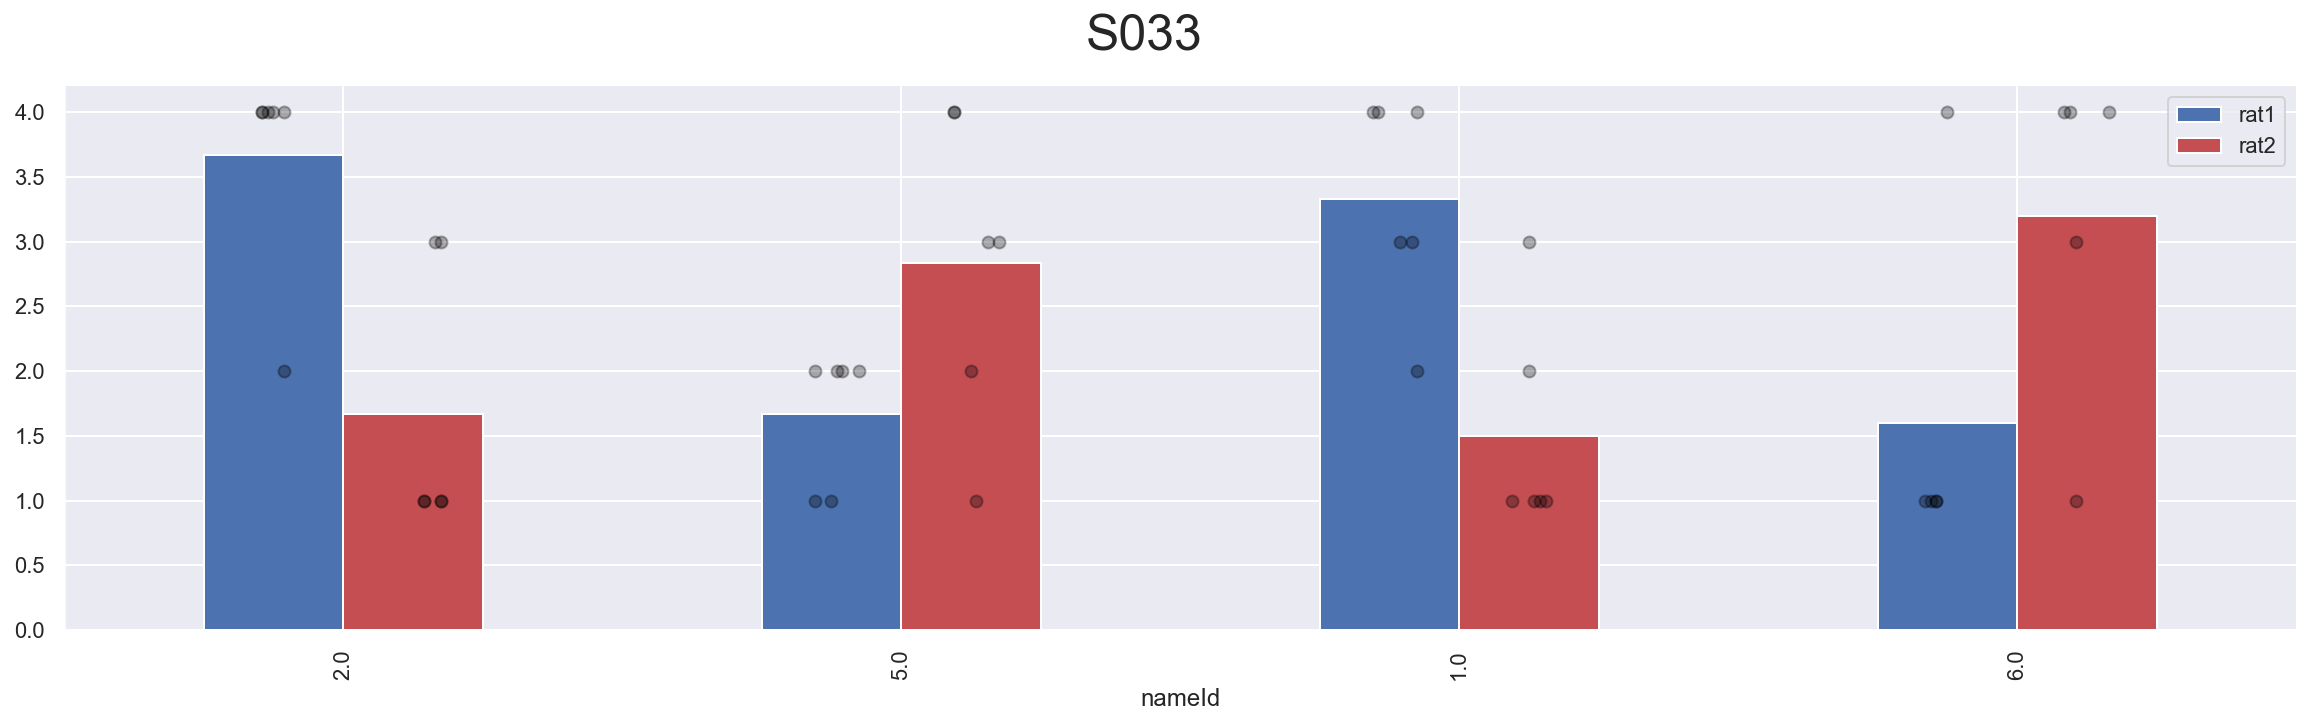

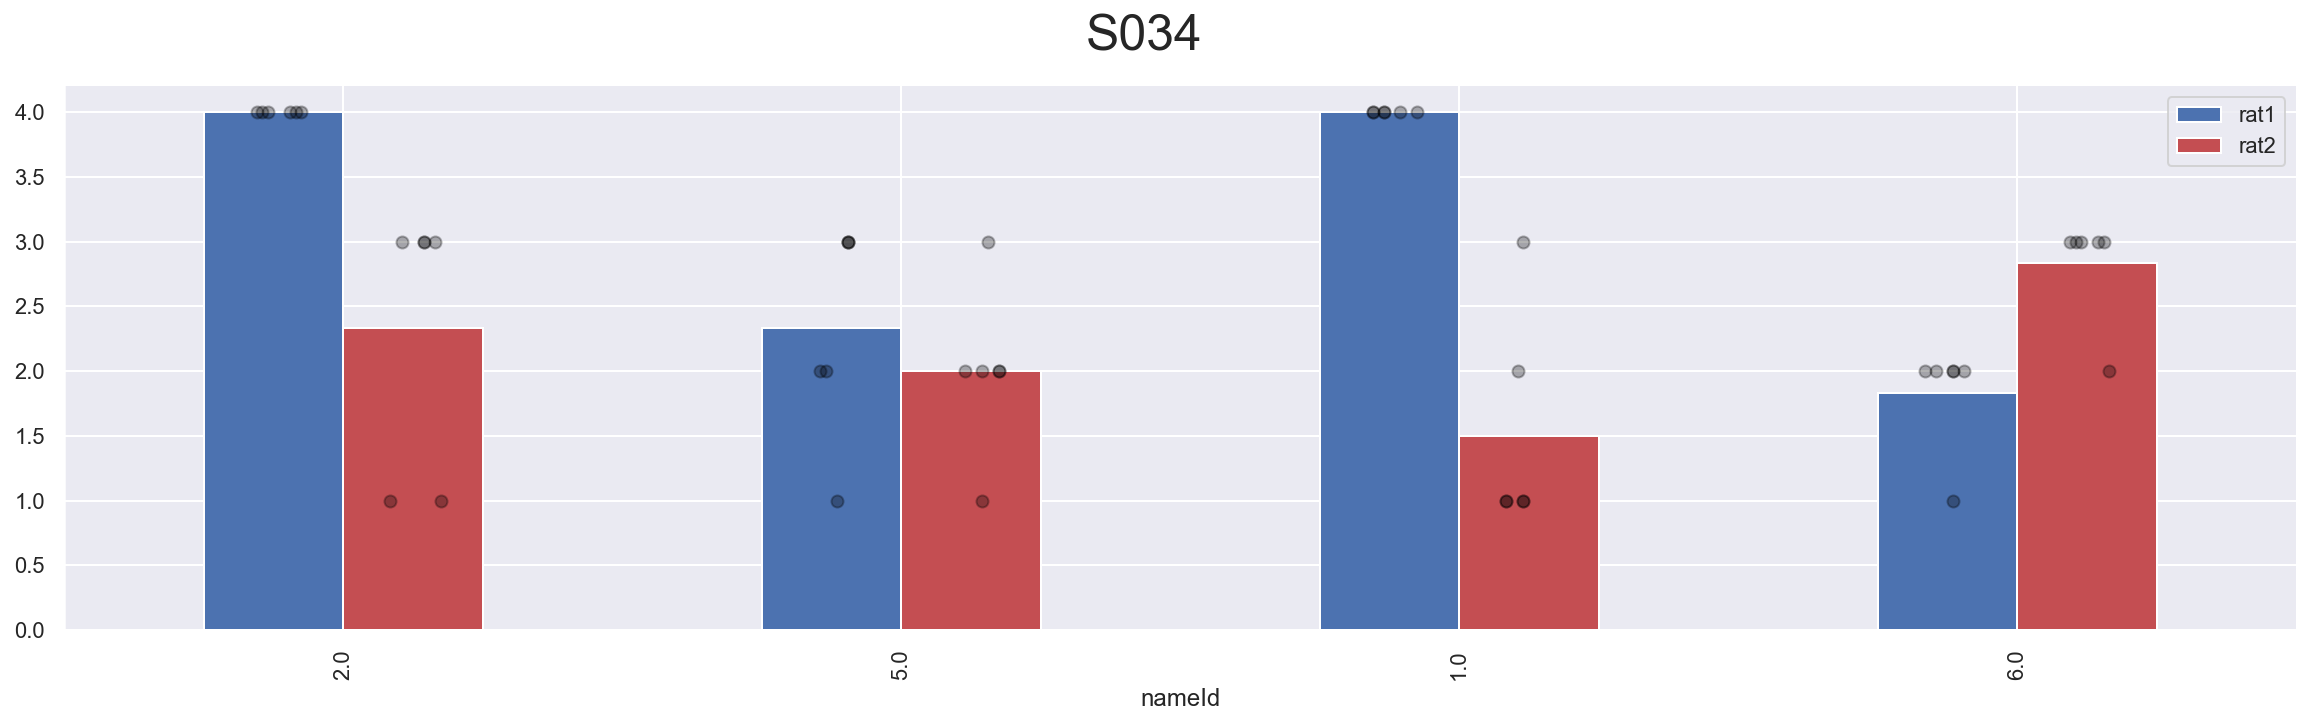

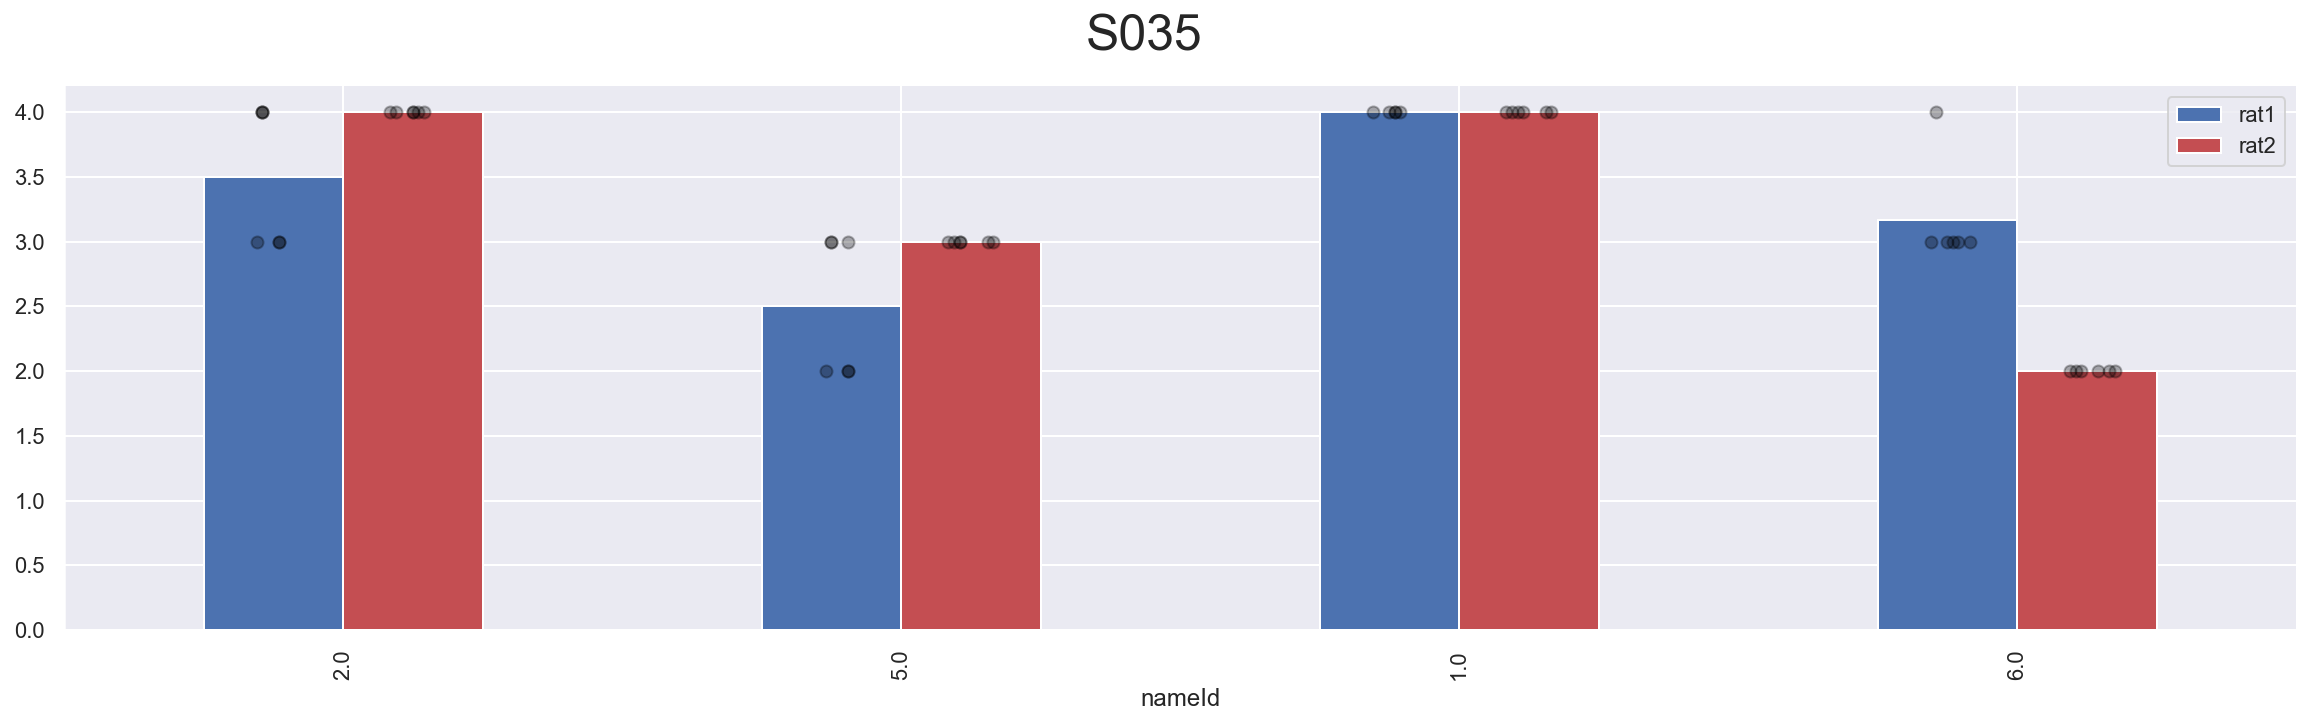

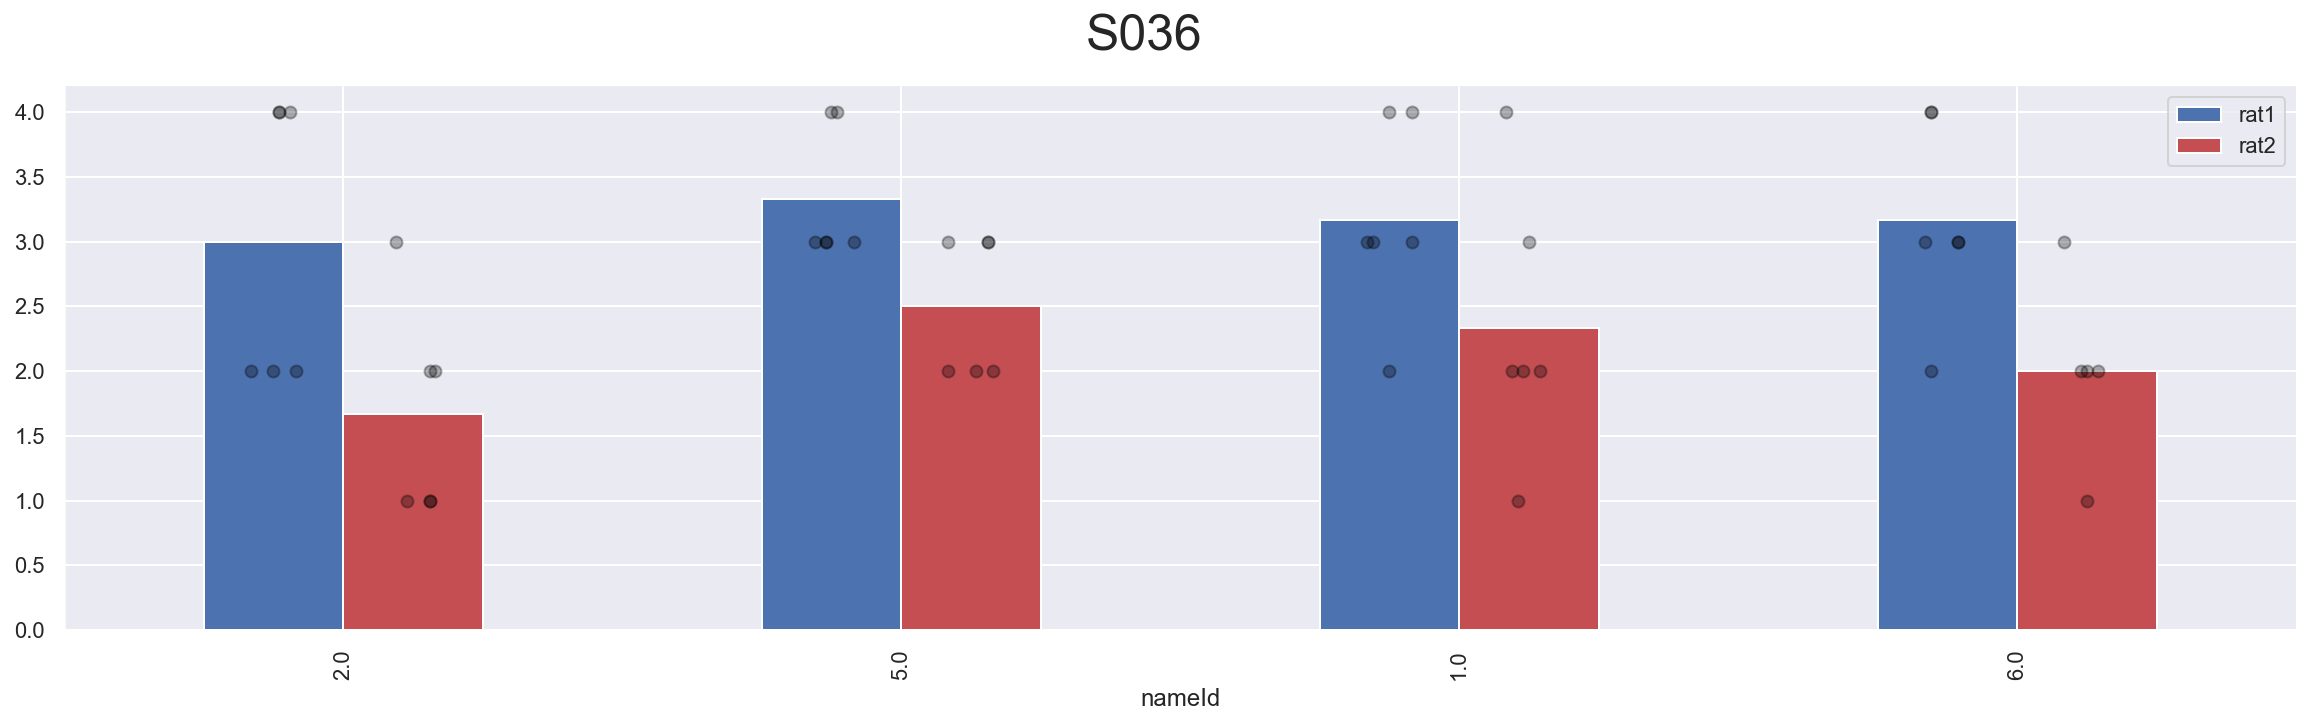

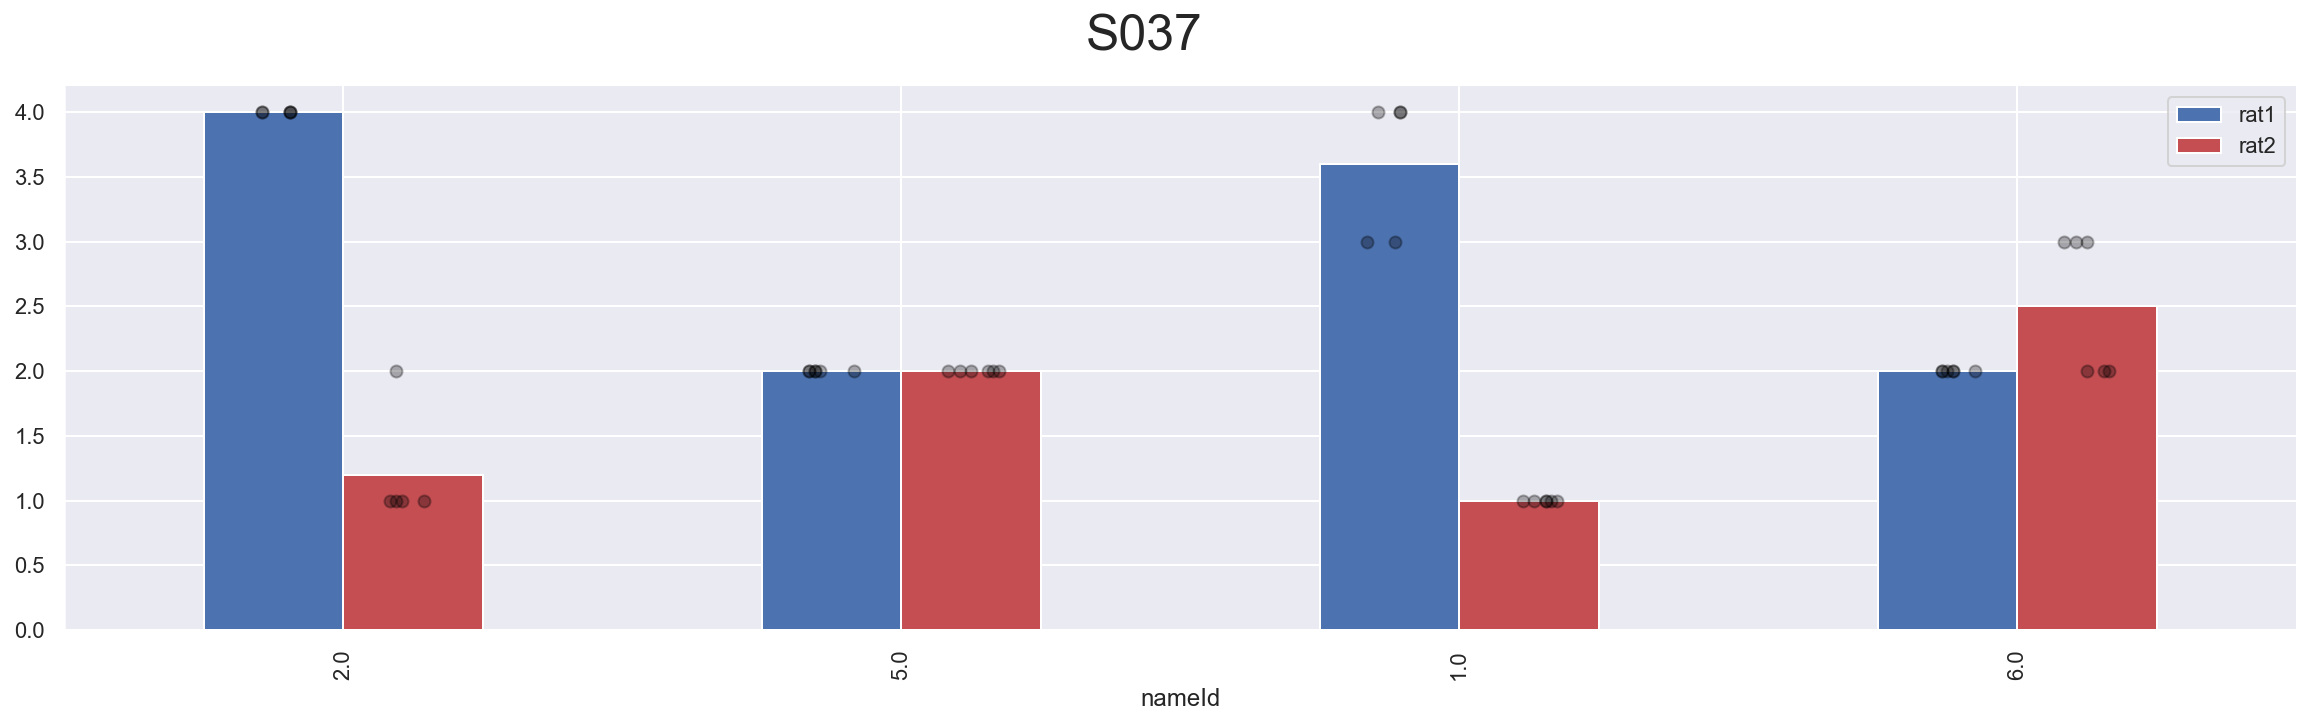

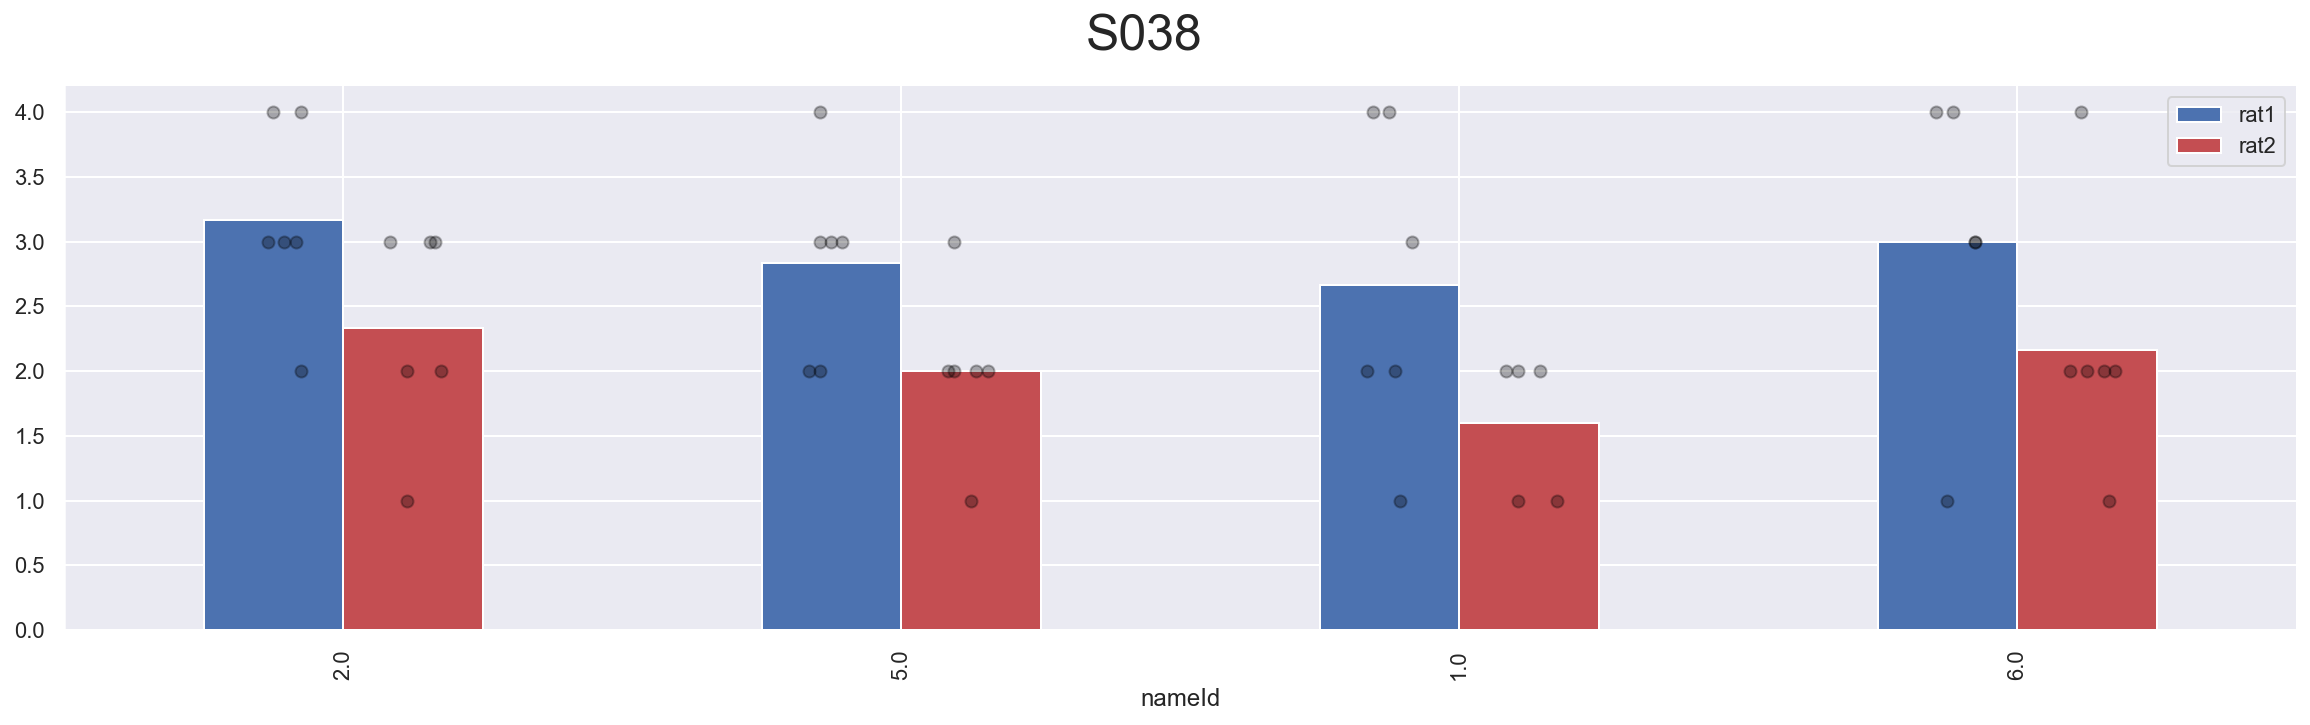

In [32]:
#sns.set(font_scale=1.5, style='white')


for part in data_exp1["Part"].unique(): 
    ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5), color = ['b','r'],zorder=1)
    
    
    for i in range(len(data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 3)].nameId.unique())):
        # for like
        ratings = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)].AllRatings1.values[i][1:-2].split('.')
        ratings = [int(i) for i in ratings]    
        ax.scatter(np.subtract([i-0.125]*len(ratings), np.divide([random.randrange(-5, 5,1) for iter in range(len(ratings))], 100)),ratings, color='black', alpha=0.3, label = 'Like',zorder=2)
        # for dislike
        ratings = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)].AllRatings2.values[i][1:-2].split('.')
        ratings = [int(i) for i in ratings]
        ax.scatter(np.subtract([i+0.125]*len(ratings), np.divide([random.randrange(-5, 5,1) for iter in range(len(ratings))], 100)),ratings, color='black', alpha=0.3, label = 'Dislike',zorder=2)
        
    plt.suptitle('S0' + str(part), fontsize = 25)
    
    sns.despine()
    plt.show()

## 2.reaction times for each participant in frame 1 (blue) and 2 (red)
### substract time till the response is available (raw RT in this case is the time from the beginning of the trial, which includes the sound stimuli)

participant: 0
RT frame 1: 0.7009877026666533
RT frame 2: 0.6566592079722113
participant: 1
RT frame 1: nan
RT frame 2: nan
participant: 2
RT frame 1: nan
RT frame 2: nan
participant: 3
RT frame 1: 0.9375675918888708
RT frame 2: 0.9824618607639071
participant: 4
RT frame 1: 0.8228576462916077
RT frame 2: 0.9487708636337198
participant: 5
RT frame 1: nan
RT frame 2: nan
participant: 6
RT frame 1: 0.6639819653195342
RT frame 2: 0.7626382734444581
participant: 7
RT frame 1: 0.5024040159167003
RT frame 2: 0.6230395852638821
participant: 8
RT frame 1: 0.4583658637500698
RT frame 2: 0.4639035050832945
participant: 9
RT frame 1: 0.4881985230277275
RT frame 2: 0.42836000248615225
participant: 10
RT frame 1: 0.632365590569476
RT frame 2: 0.61564972002778
participant: 11
RT frame 1: 0.5211088830416584
RT frame 2: 0.6696809363194989
participant: 12
RT frame 1: nan
RT frame 2: nan
participant: 13
RT frame 1: nan
RT frame 2: nan
participant: 14
RT frame 1: 0.5529860212856352
RT frame 2: 0.546387494

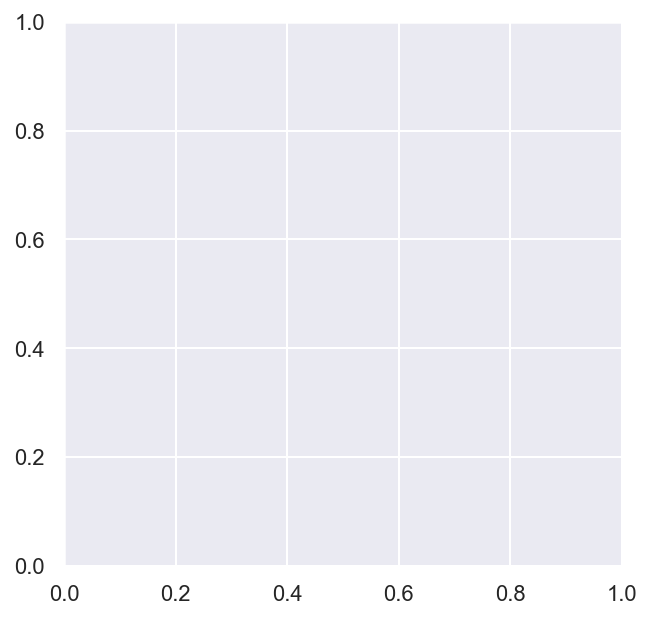

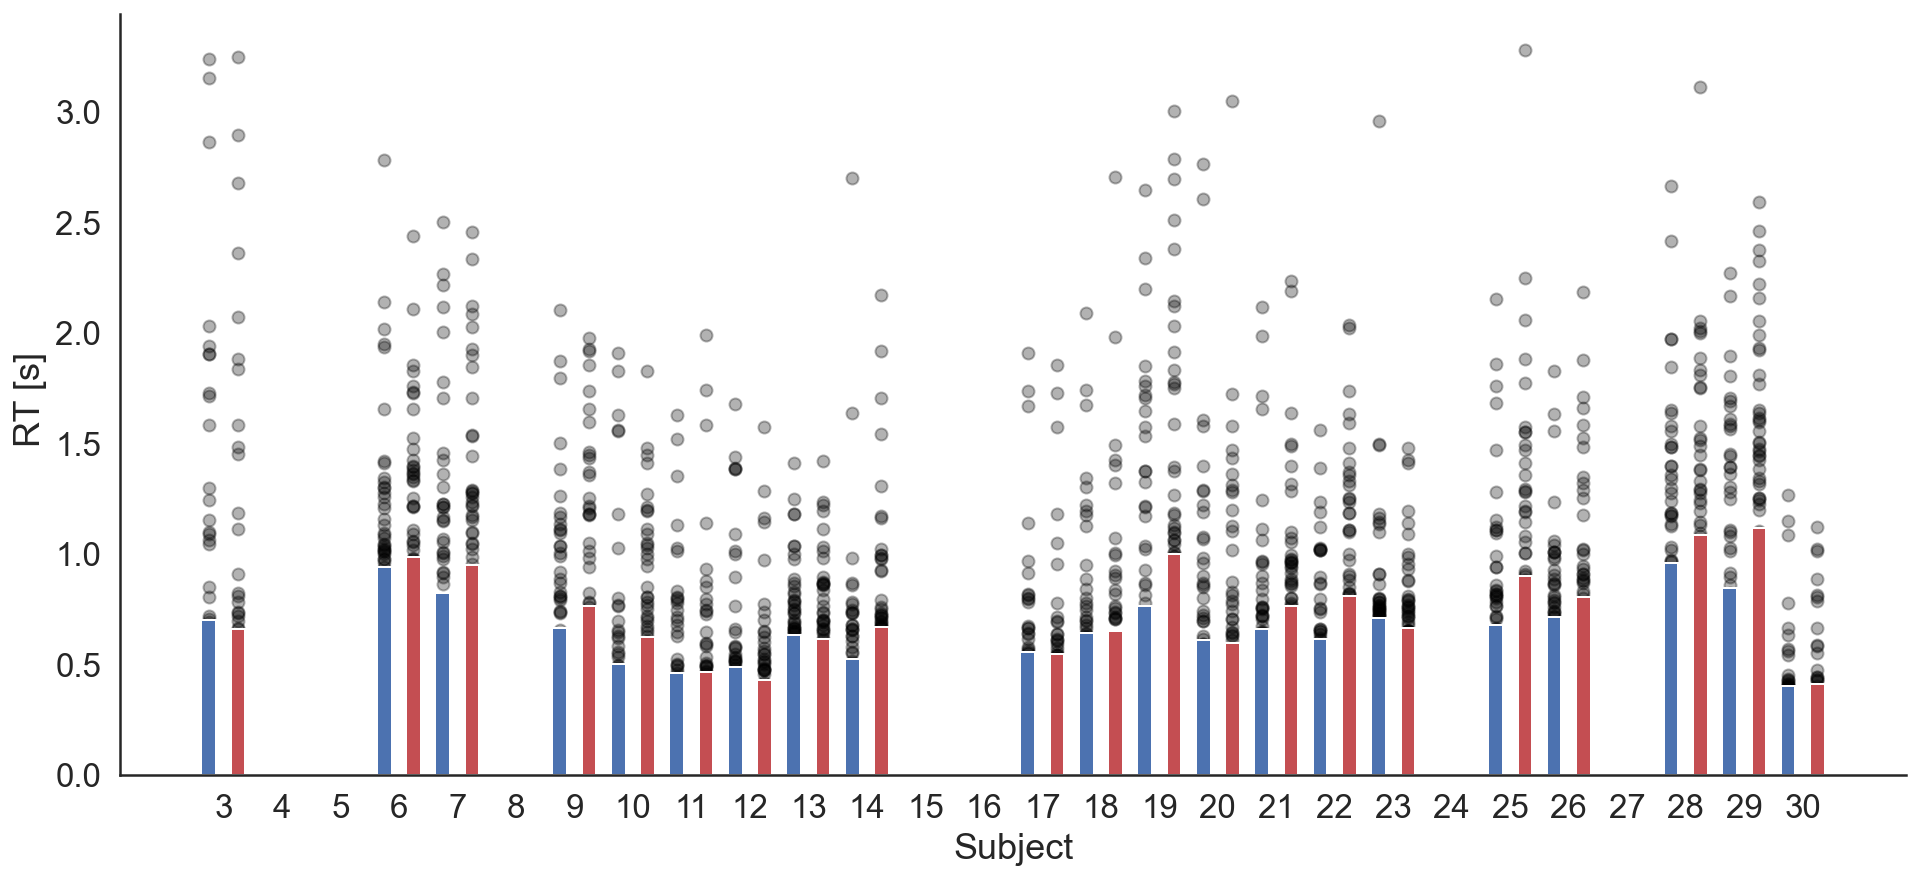

In [33]:
fig, ax = plt.subplots()
figure(figsize=(16,7))

sns.set(font_scale=1.5, style='white')

width = 0.25
#partNames = data_exp1.Part.unique()
partNames = range(3, 3+len(data_exp1["Part"].unique()))



for i in np.arange(len(partNames)):
    RT1 = data_exp1.loc[(data_exp1['Part'] == partNames[i]) & (data_exp1['frame'] == 1) ].RT-3.5
    RT2 = data_exp1.loc[(data_exp1['Part'] == partNames[i]) & (data_exp1['frame'] == 2) ].RT-3.5

    RT_mean1 = data_exp1.loc[(data_exp1['Part'] == partNames[i]) & (data_exp1['frame'] == 1) ].RT.mean()-3.5
    RT_mean2 = data_exp1.loc[(data_exp1['Part'] == partNames[i]) & (data_exp1['frame'] == 2) ].RT.mean()-3.5
    print ('participant: ' + str(i))
    print ('RT frame 1: ' + str(RT_mean1))
    print ('RT frame 2: ' + str(RT_mean2))

    plt.bar(i-0.25, RT_mean1,width,color='b', label = 'Like')

    plt.scatter([i-0.25]*len(RT1),RT1 ,color='black', alpha=0.3, marker='o', label = 'Like')


    plt.bar(i+0.25, RT_mean2,width,color='r', label = 'Dislike')
    plt.scatter([i+0.25]*len(RT2),RT2 ,color='black', alpha=0.3, marker='o', label = 'Dislike')

plt.xticks(range(len(partNames)), partNames)
plt.xlabel("Subject")
plt.ylabel("RT [s] ")
#plt.xticks([i-0.5,i+0.5],["Like ","Dislike"], rotation=0, fontsize=25)
#plt.legend()
sns.despine()

## 3. participant densities rate 

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element po

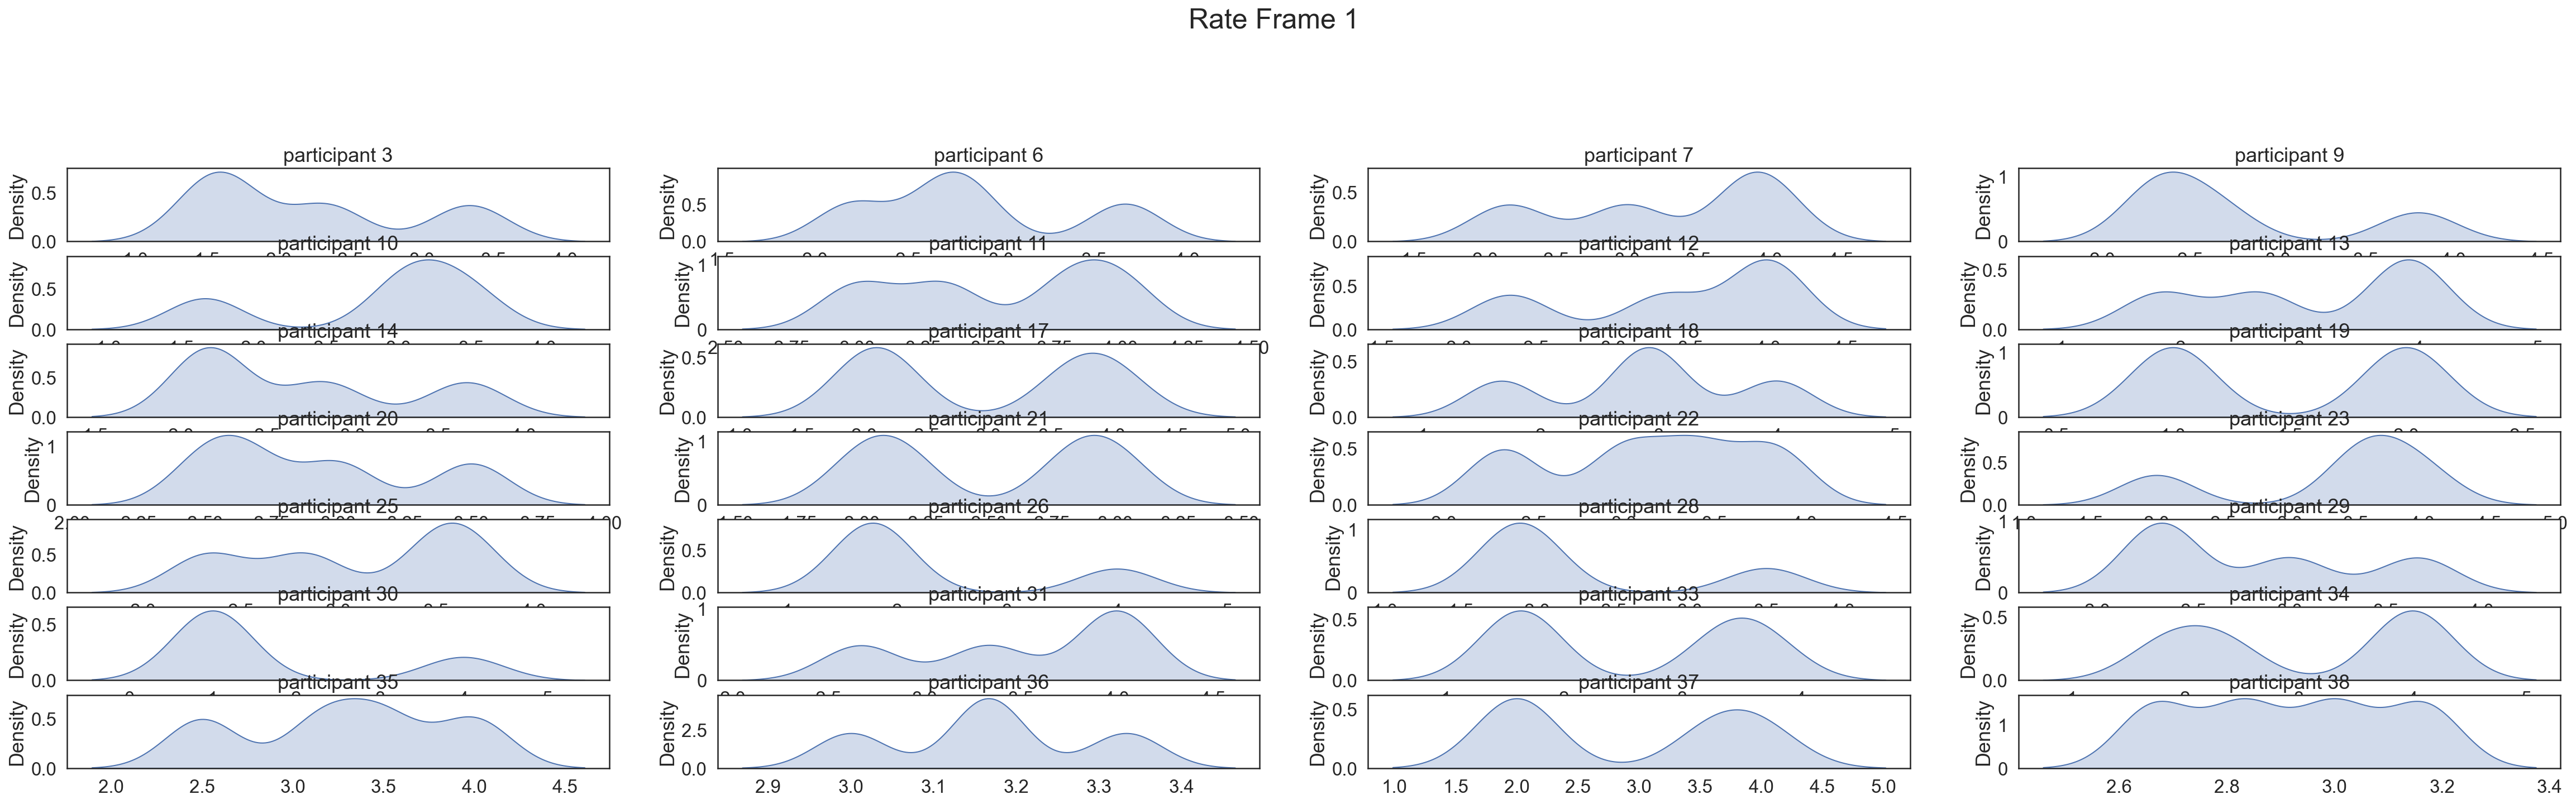

In [34]:
participant_densities(data_exp1,'RRat1', title = 'Rate Frame 1')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element po

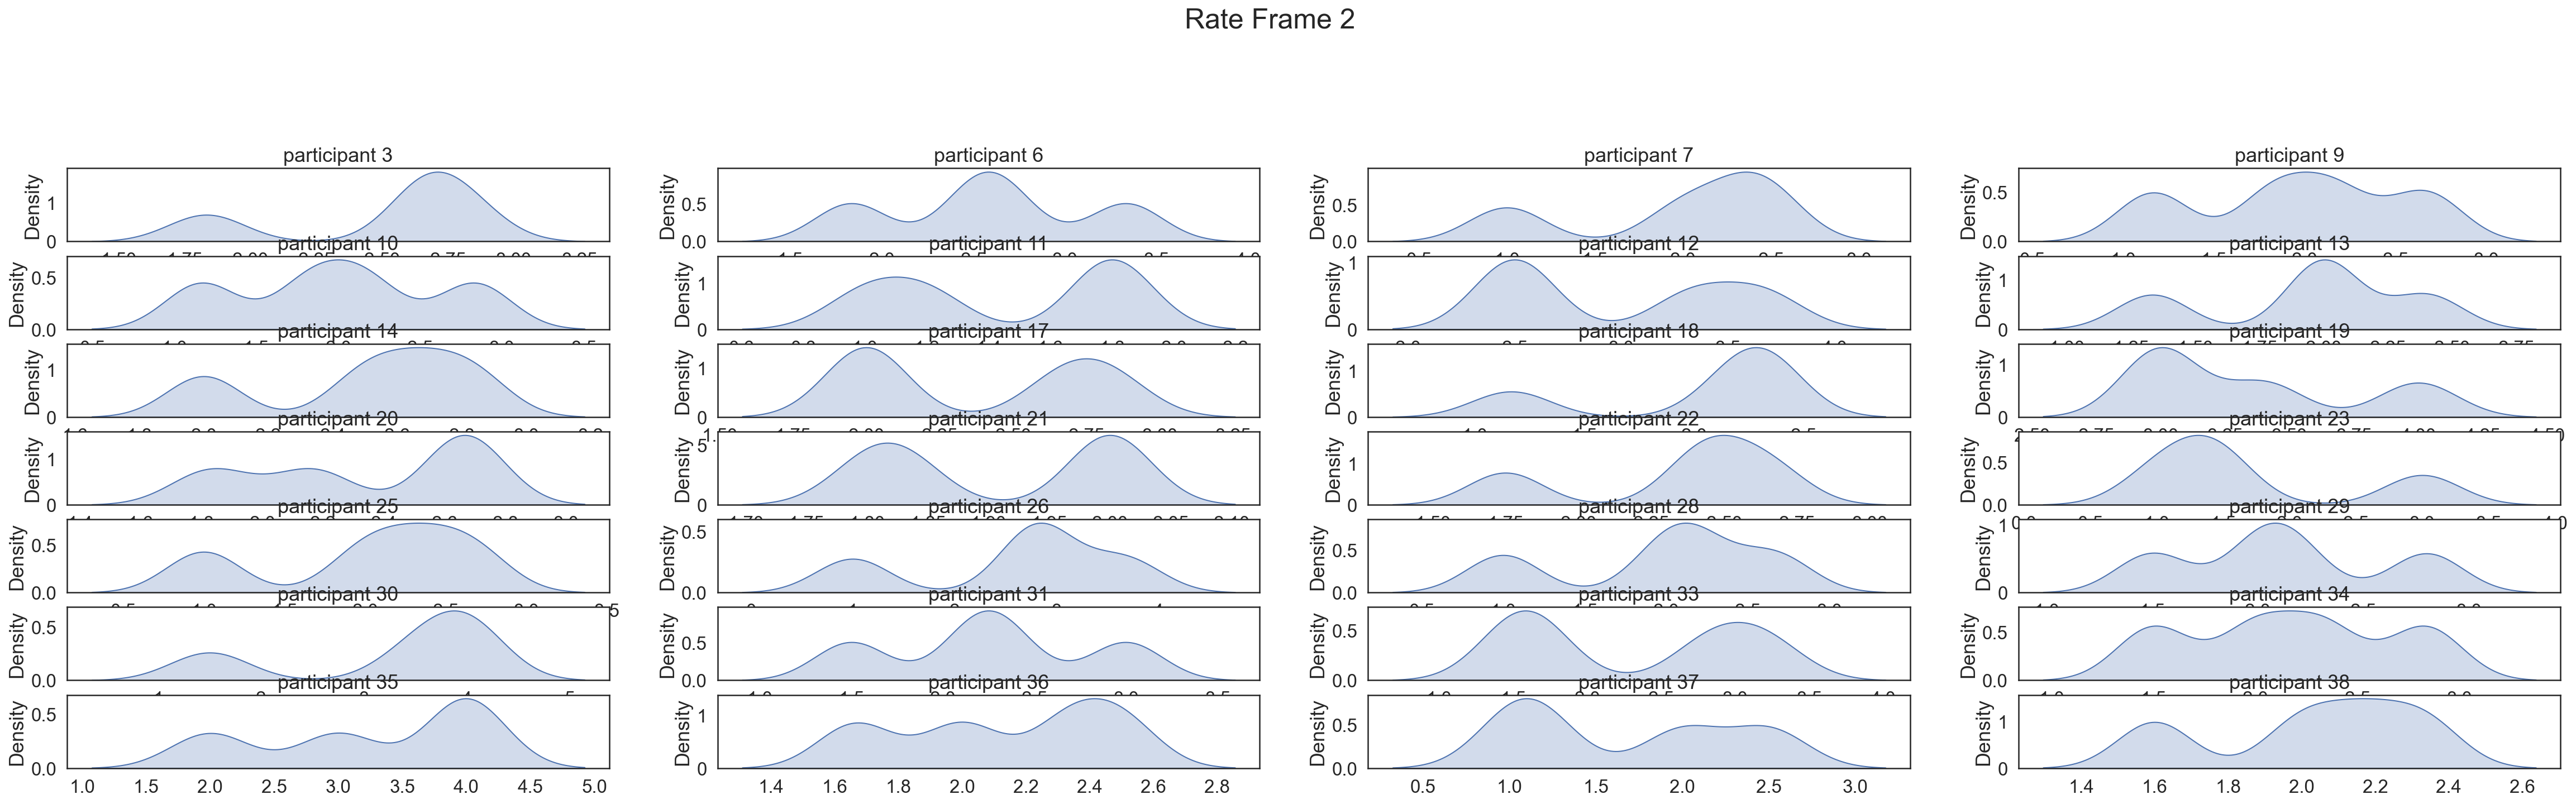

In [35]:
participant_densities(data_exp1,'RRat2', title = 'Rate Frame 2 ')

## 4. participants densities variability 
## (variability corresponds to the standard deviation of the ratings for each pet)

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element po

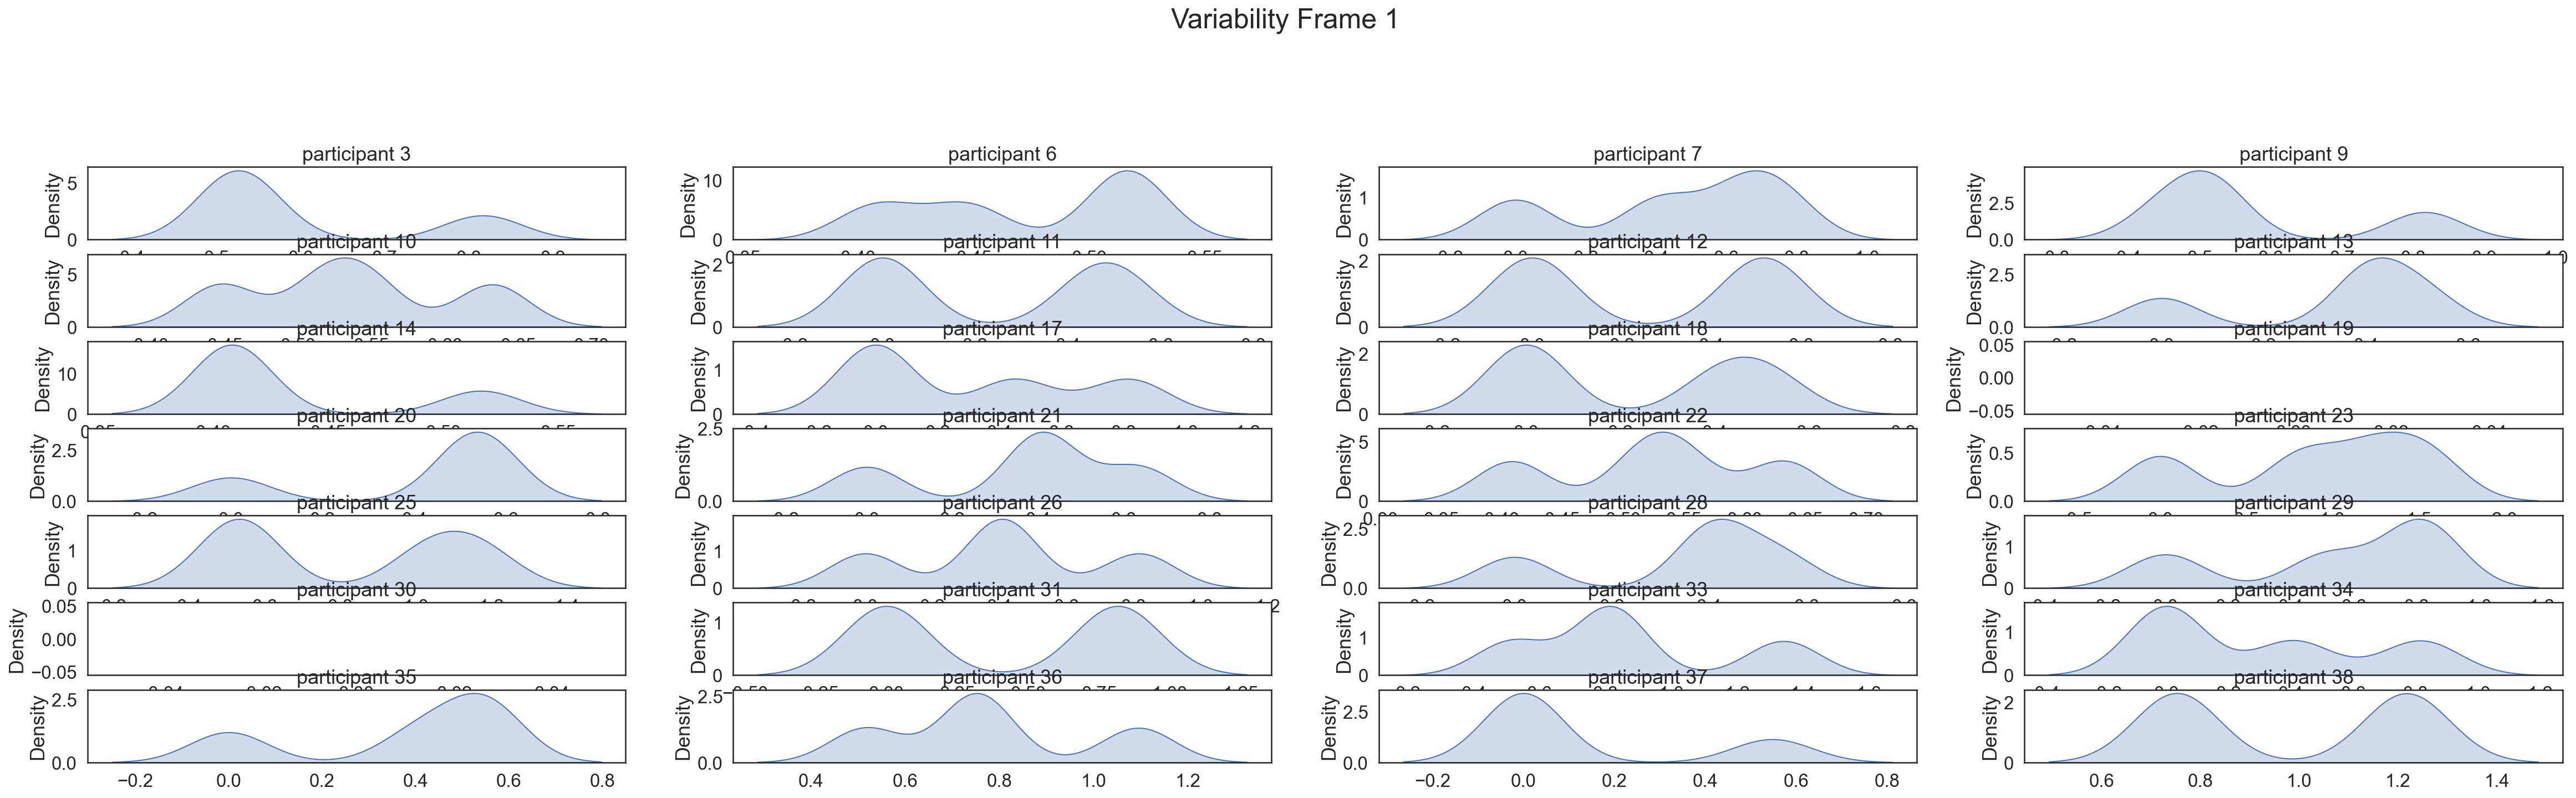

In [36]:
participant_densities(data_exp1,'RVar1', title = 'Variability Frame 1')

/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element po

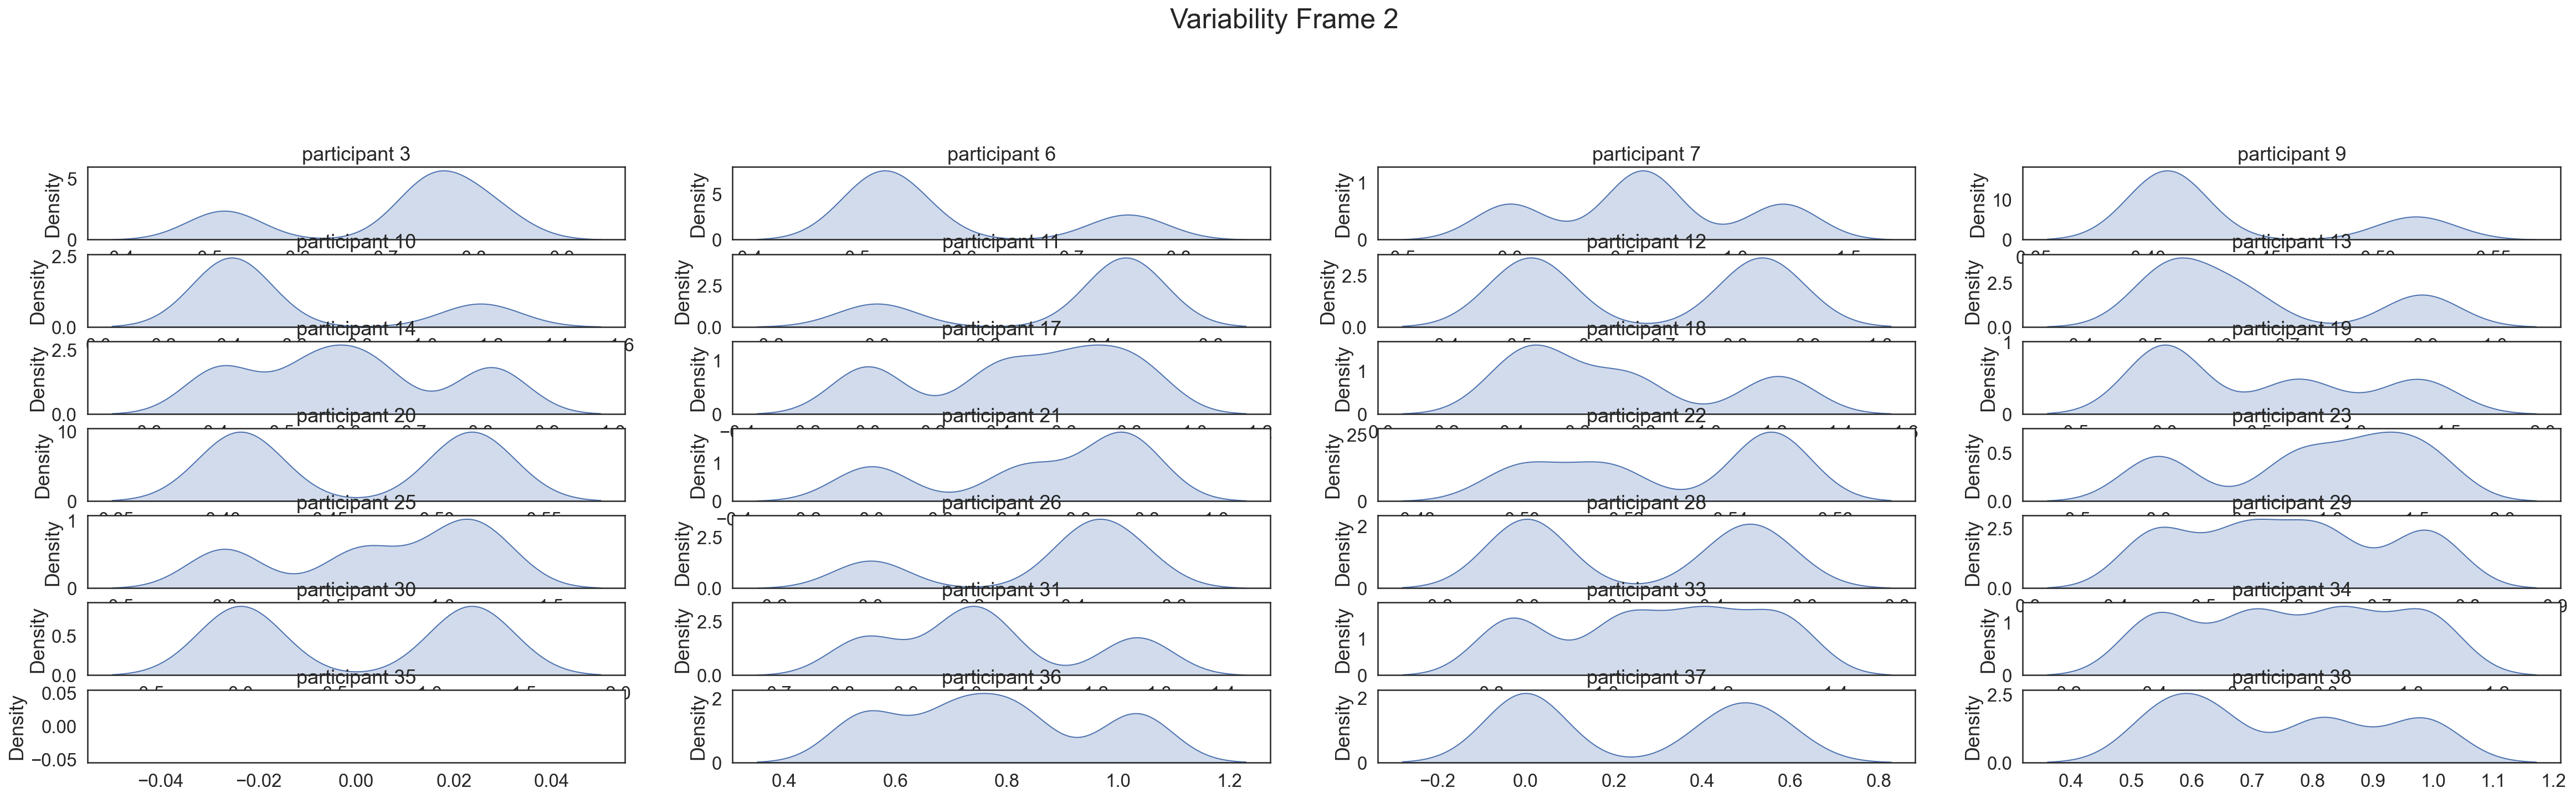

In [37]:
participant_densities(data_exp1,'RVar2', title = 'Variability Frame 2')

## 5. pet ratings in both frames
### each dot corresponds to a pet (4 pets) for each participant (3 participant)

In [38]:
data_exp_ratings_2

index  nameId      rat1      rat2      var1      var2  Part  \
0        0     2.0  2.333333  2.666667  0.516398  0.516398     3   
1        1     5.0  1.500000  2.666667  0.547723  0.816497     3   
2        2     1.0  3.333333  1.833333  0.816497  0.752773     3   
3        3     6.0  1.666667  2.833333  0.516398  0.752773     3   
4       12     2.0  2.833333  2.500000  0.408248  0.547723     6   
..     ...     ...       ...       ...       ...       ...   ...   
107    139     6.0  2.000000  2.500000  0.000000  0.547723    37   
108    140     2.0  3.166667  2.333333  0.752773  0.816497    38   
109    141     5.0  2.833333  2.000000  0.752773  0.632456    38   
110    142     1.0  2.666667  1.600000  1.211060  0.547723    38   
111    143     6.0  3.000000  2.166667  1.224745  0.983192    38   

             AllRatings1          AllRatings2  
0    [3. 2. 3. 2. 2. 2.]  [3. 2. 2. 3. 3. 3.]  
1    [1. 1. 2. 2. 1. 2.]  [2. 3. 2. 2. 3. 4.]  
2    [4. 3. 4. 2. 3. 4.]  [2. 1. 1. 3. 2. 2.]  
3    [2. 2. 2. 2. 1. 1.]  [2. 2. 3. 3. 4. 3.]  
4    [3. 3. 3. 3. 2. 3.]  [2. 3. 3. 2. 3. 2.]  
..                   ...                  ...  
107  [2. 2. 2. 2. 2. 2.]  [2. 2. 2. 3. 3. 3.]  
108  [4. 3. 4. 3. 3. 2.]  [3. 1. 2. 3. 3. 2.]  
109  [3. 3. 3. 2. 4. 2.]  [2. 3. 1. 2. 2. 2.]  
110  [1. 2. 4. 4. 3. 2.]     [2. 1. 1. 2. 2.]  
111     [4. 1. 4. 3. 3.]  [2. 4. 1. 2. 2. 2.]  

[112 rows x 9 columns]

In [39]:
data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 3)]

index  nameId      rat1      rat2      var1      var2  Part  \
0      0     2.0  2.333333  2.666667  0.516398  0.516398     3   
1      1     5.0  1.500000  2.666667  0.547723  0.816497     3   
2      2     1.0  3.333333  1.833333  0.816497  0.752773     3   
3      3     6.0  1.666667  2.833333  0.516398  0.752773     3   

           AllRatings1          AllRatings2  
0  [3. 2. 3. 2. 2. 2.]  [3. 2. 2. 3. 3. 3.]  
1  [1. 1. 2. 2. 1. 2.]  [2. 3. 2. 2. 3. 4.]  
2  [4. 3. 4. 2. 3. 4.]  [2. 1. 1. 3. 2. 2.]  
3  [2. 2. 2. 2. 1. 1.]  [2. 2. 3. 3. 4. 3.]

# ---> Correlation Overall : Like vs Dislike rating Task

Pearson's r = -0.621 p =  2.871913433857987e-13


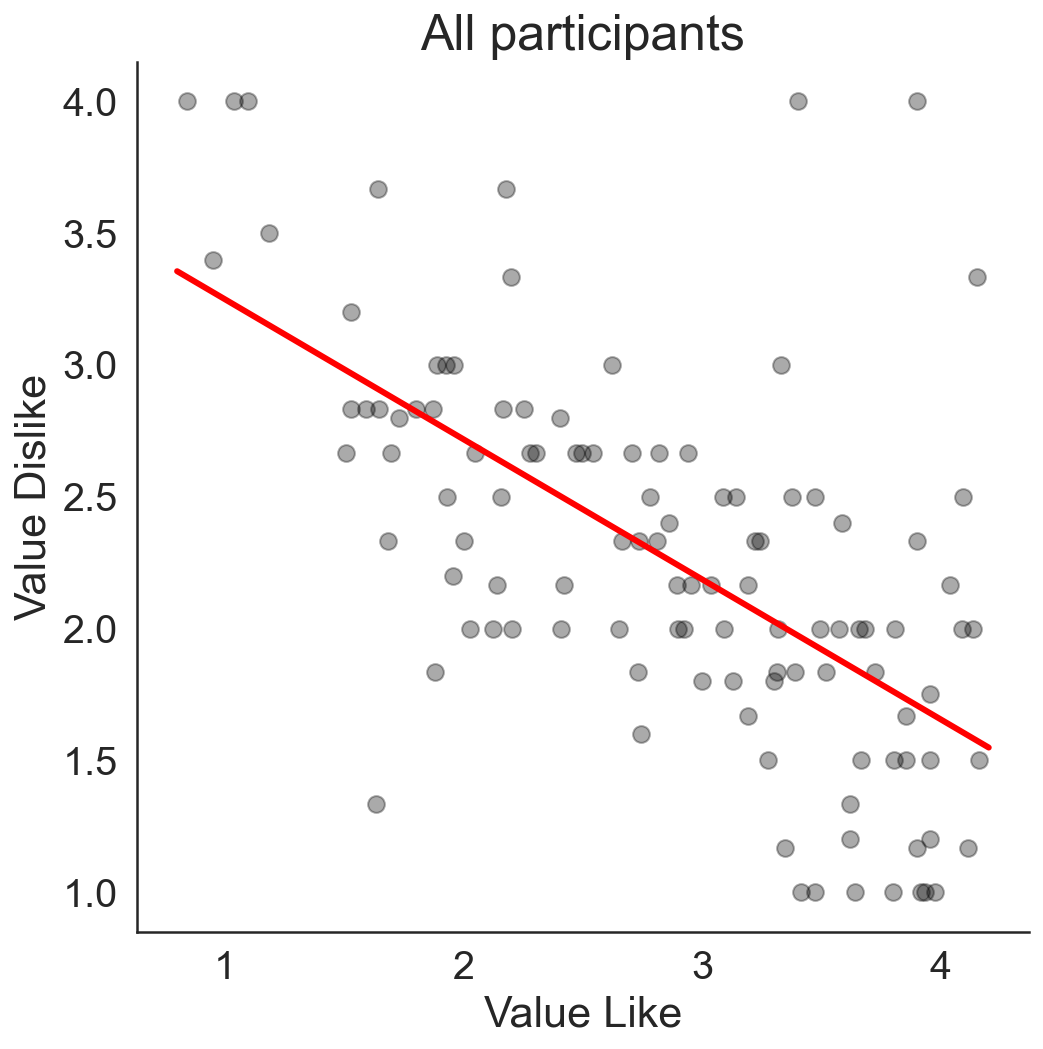

In [40]:
corrPlotSimpleJitter(data_exp_ratings_2, 'rat1','Value Like','rat2','Value Dislike', title = 'All participants')



/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anacond

Pearson's r = -0.912 p =  0.088
Pearson's r = -0.985 p =  0.015
Pearson's r = -0.628 p =  0.372
Pearson's r = -0.916 p =  0.084
Pearson's r = -0.926 p =  0.074
Pearson's r = -0.954 p =  0.046
Pearson's r = -0.555 p =  0.445
Pearson's r = 0.491 p =  0.509
Pearson's r = -0.831 p =  0.169
Pearson's r = -0.963 p =  0.037
Pearson's r = -0.828 p =  0.172


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anacond

Pearson's r = -0.855 p =  0.145
Pearson's r = -0.977 p =  0.023
Pearson's r = -0.106 p =  0.894
Pearson's r = -0.885 p =  0.115
Pearson's r = -0.917 p =  0.083
Pearson's r = -0.877 p =  0.123
Pearson's r = -0.957 p =  0.043
Pearson's r = -0.941 p =  0.059
Pearson's r = -0.876 p =  0.124
Pearson's r = -0.98 p =  0.02
Pearson's r = -0.518 p =  0.482
Pearson's r = -0.967 p =  0.033
Pearson's r = -0.616 p =  0.384
Pearson's r = 0.576 p =  0.424
Pearson's r = 0.921 p =  0.079
Pearson's r = -0.92 p =  0.08
Pearson's r = 0.972 p =  0.028


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  
/Users/pradyumna/anacond

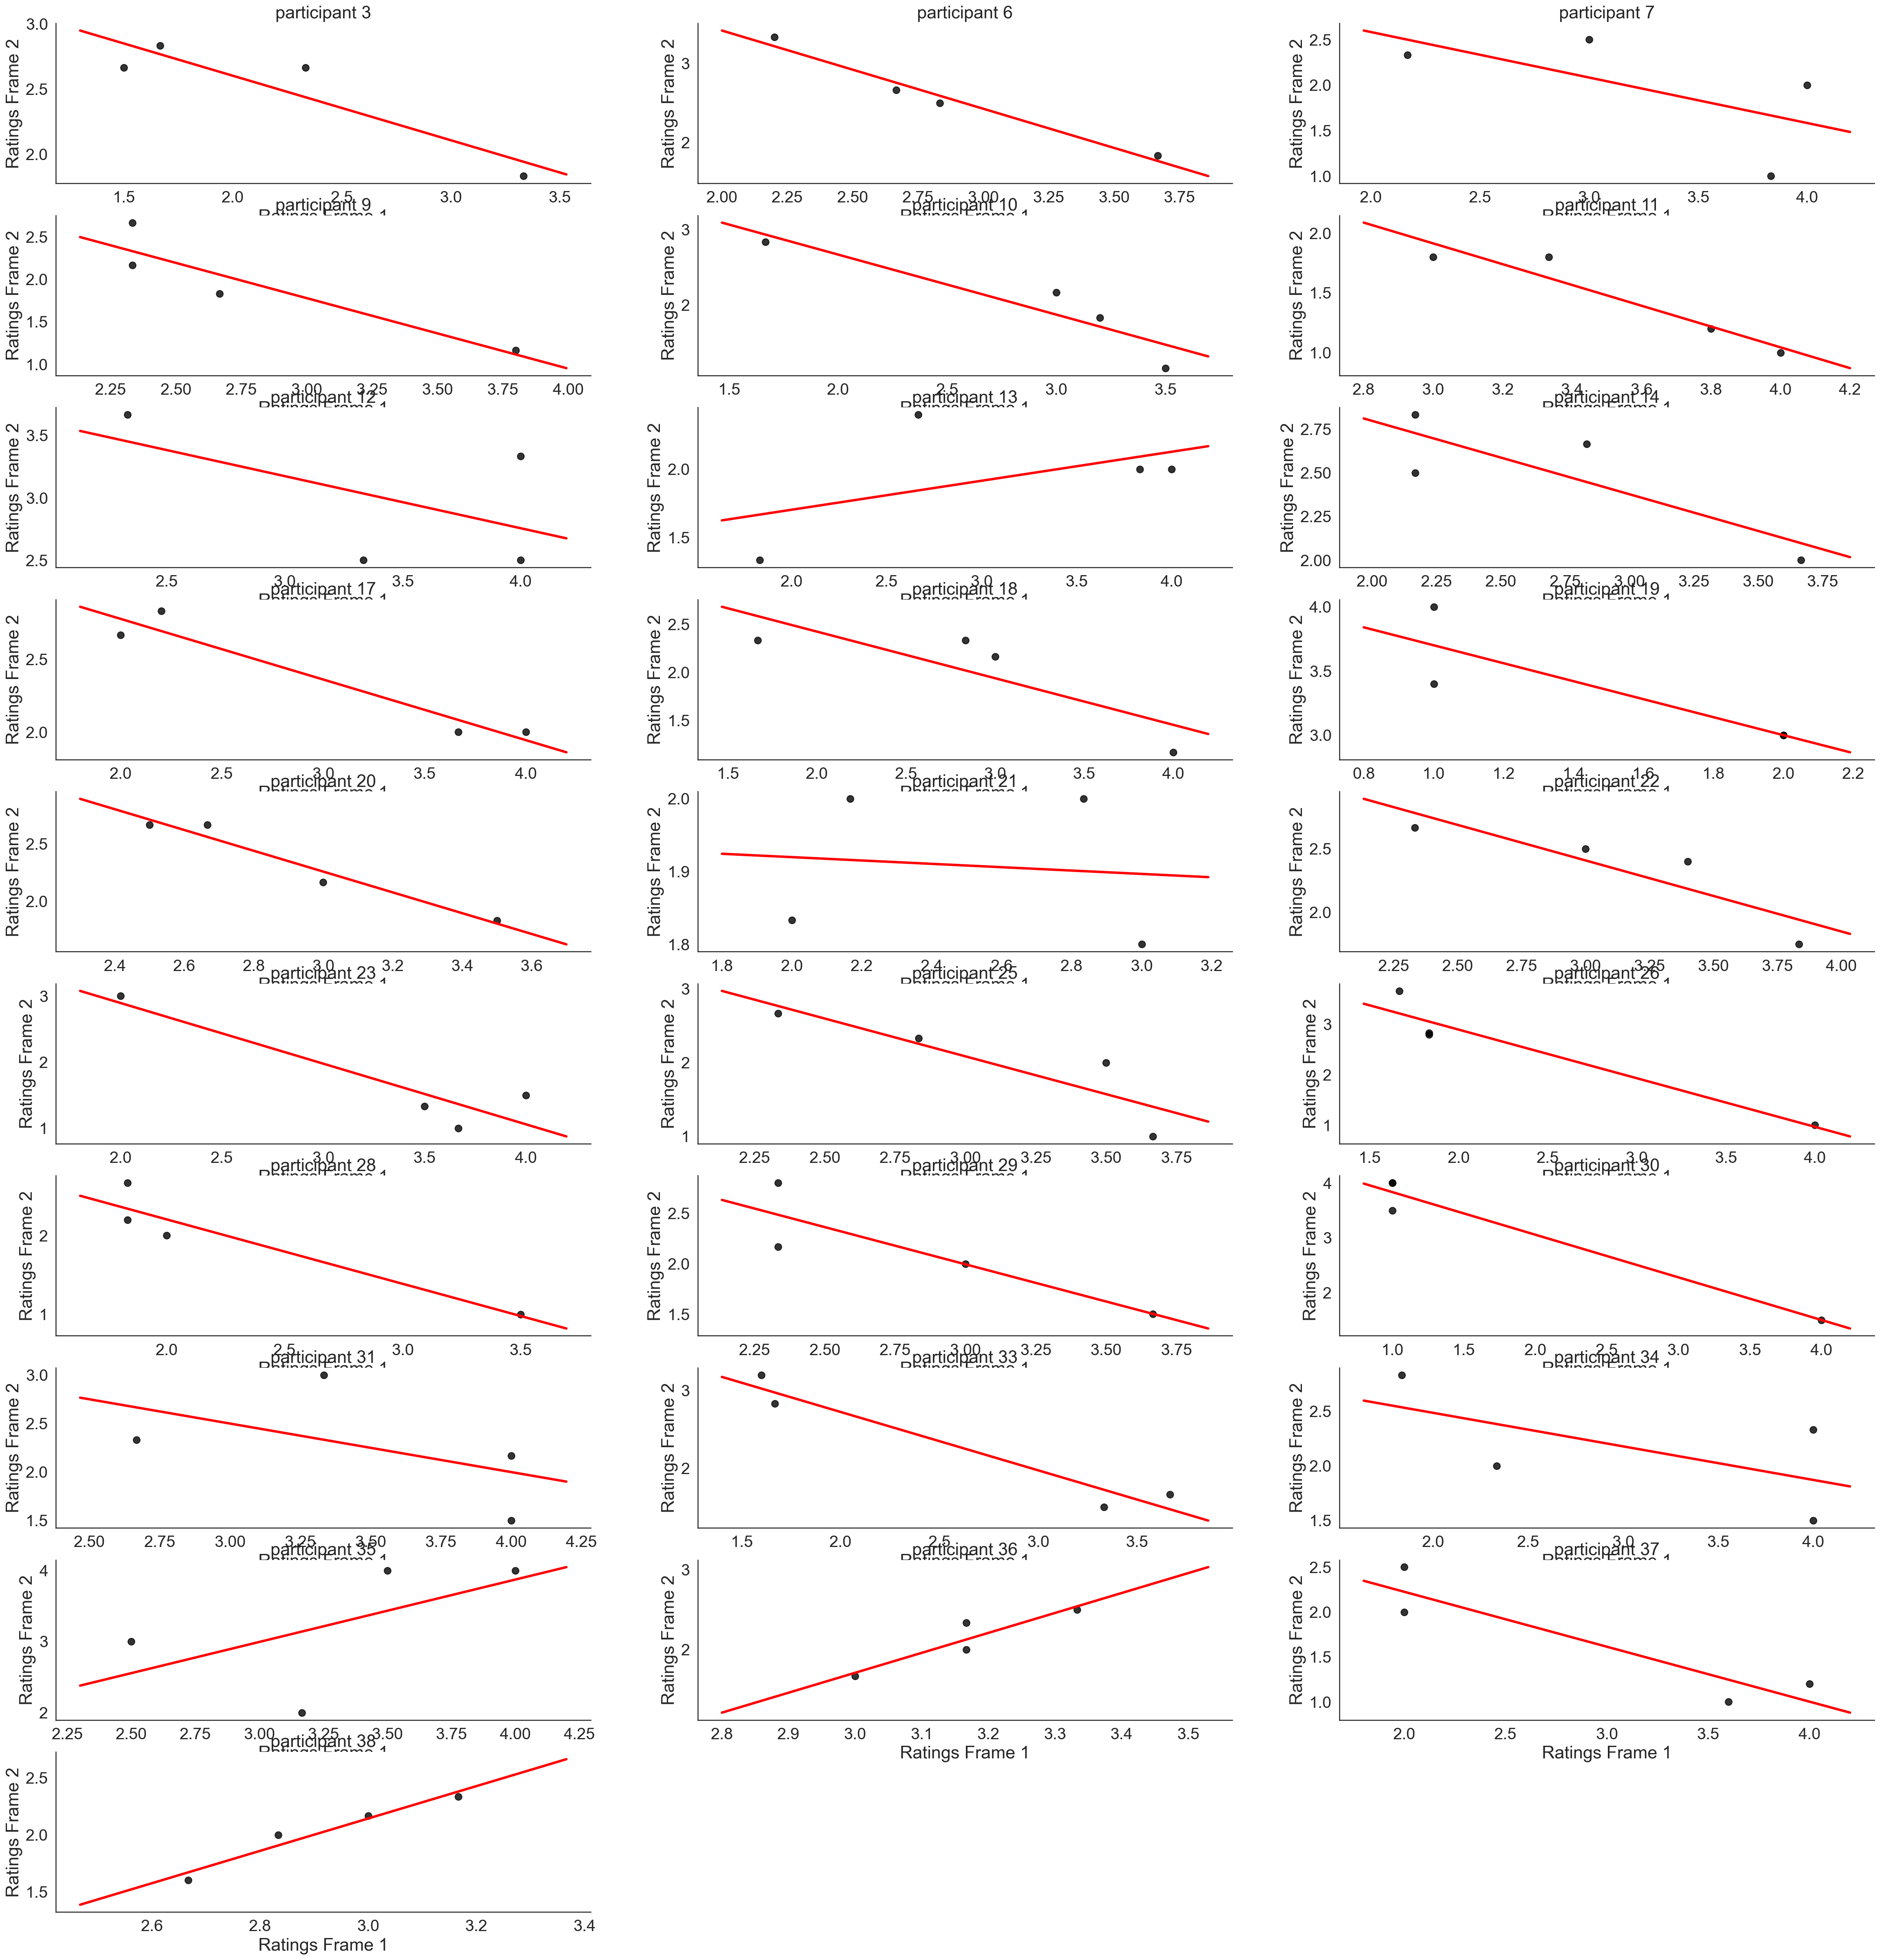

In [41]:
#corrPlotSimple(data_exp_ratings_2, 'rat1','Ratings Frame 1','rat2','Ratings Frame 2')
fig = figure(figsize=(40,60))
order = 1
for part in data_exp1["Part"].unique(): 
    sub={}
    sub['%s' % part] =plt.subplot(len(data_exp1["Part"].unique())/2, 3, order)
    corrPlotPart(data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)], 'rat1','Ratings Frame 1','rat2','Ratings Frame 2', title = 'S0'+str(part))
    #sub['%s' % part].set_title('participant %s' % part)
    sub['%s' % part].set_title('participant %s' % part)

    order += 1


    

Pearson's r = -0.912 p =  0.088
Pearson's r = -0.985 p =  0.015
Pearson's r = -0.628 p =  0.372
Pearson's r = -0.916 p =  0.084
Pearson's r = -0.926 p =  0.074
Pearson's r = -0.954 p =  0.046
Pearson's r = -0.555 p =  0.445
Pearson's r = 0.491 p =  0.509
Pearson's r = -0.831 p =  0.169
Pearson's r = -0.963 p =  0.037
Pearson's r = -0.828 p =  0.172
Pearson's r = -0.855 p =  0.145
Pearson's r = -0.977 p =  0.023
Pearson's r = -0.106 p =  0.894
Pearson's r = -0.885 p =  0.115
Pearson's r = -0.917 p =  0.083
Pearson's r = -0.877 p =  0.123
Pearson's r = -0.957 p =  0.043
Pearson's r = -0.941 p =  0.059
Pearson's r = -0.876 p =  0.124
Pearson's r = -0.98 p =  0.02
Pearson's r = -0.518 p =  0.482
Pearson's r = -0.967 p =  0.033
Pearson's r = -0.616 p =  0.384
Pearson's r = 0.576 p =  0.424
Pearson's r = 0.921 p =  0.079
Pearson's r = -0.92 p =  0.08
Pearson's r = 0.972 p =  0.028


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


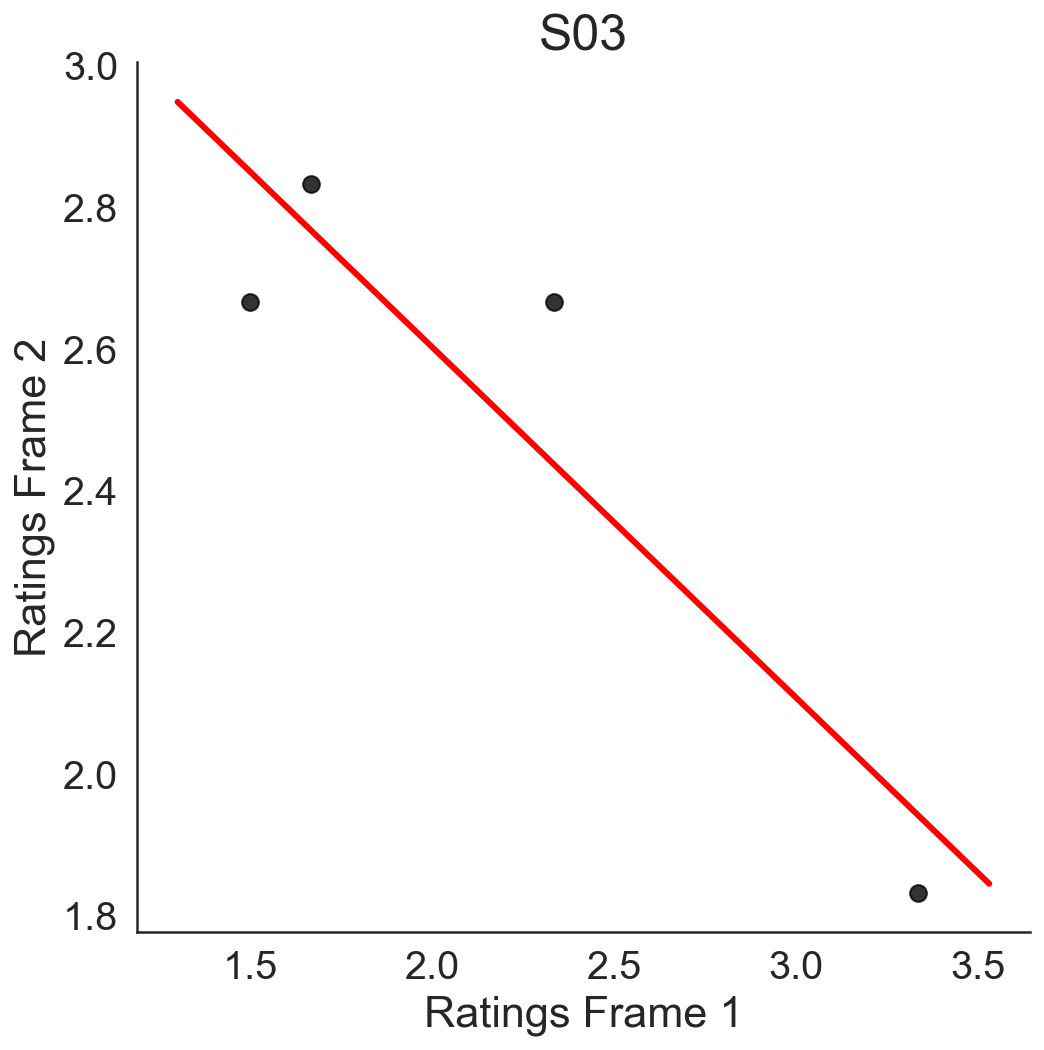

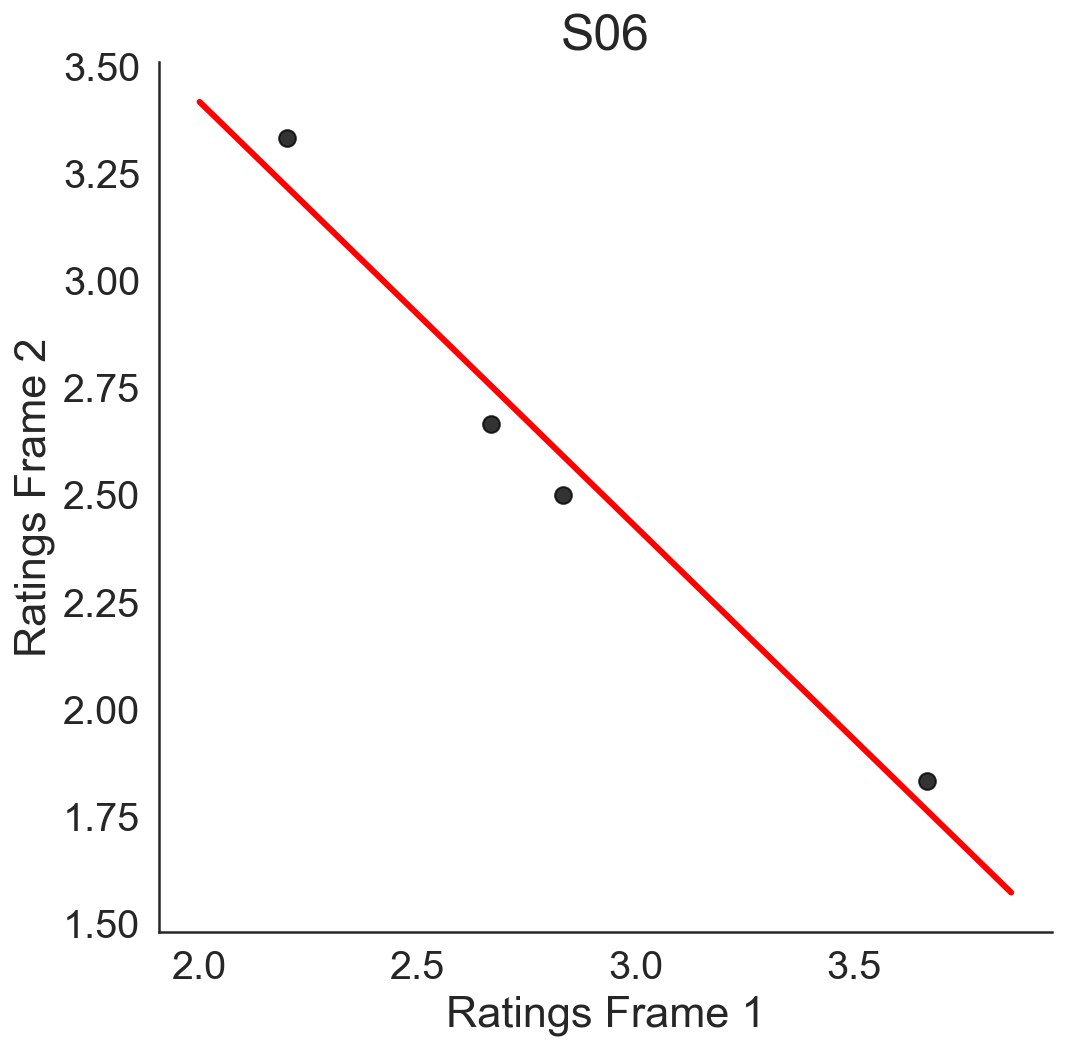

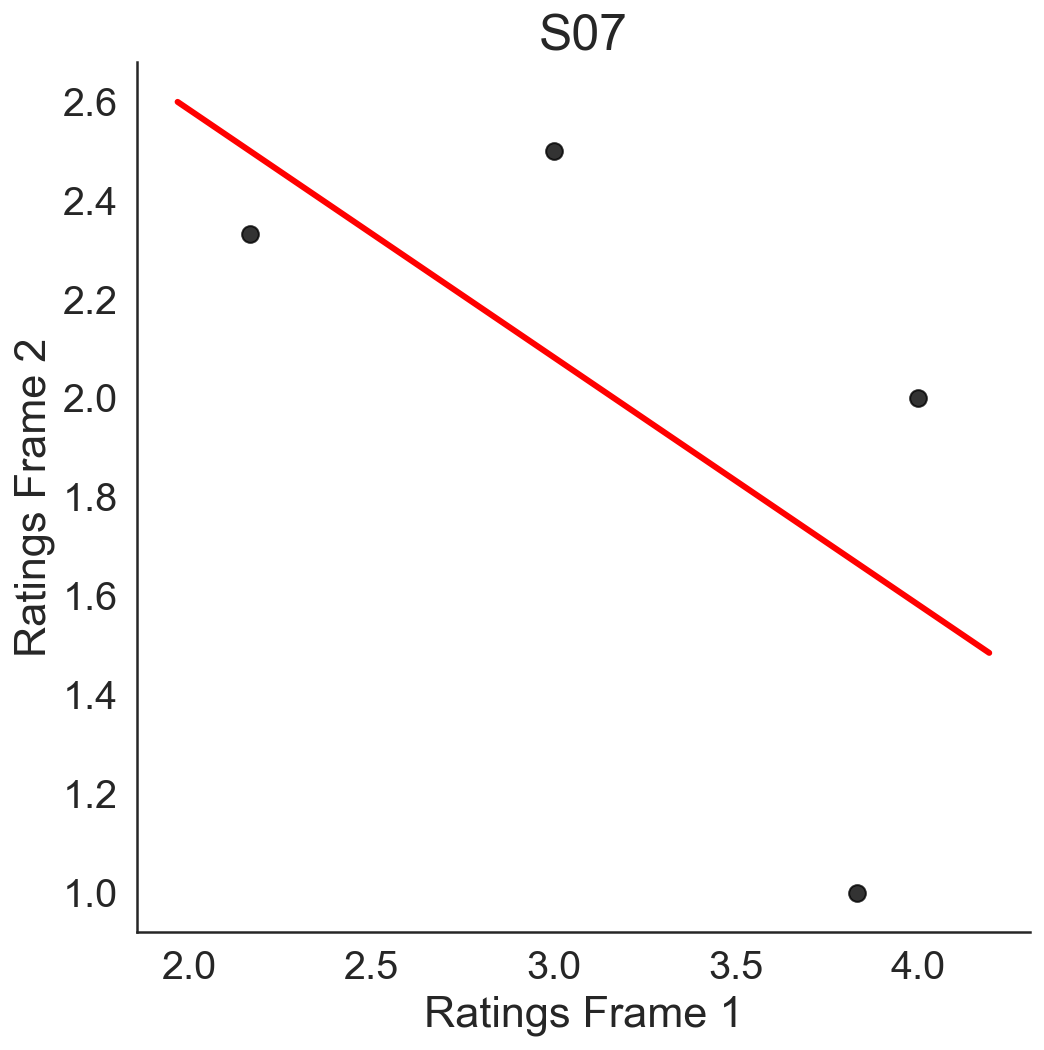

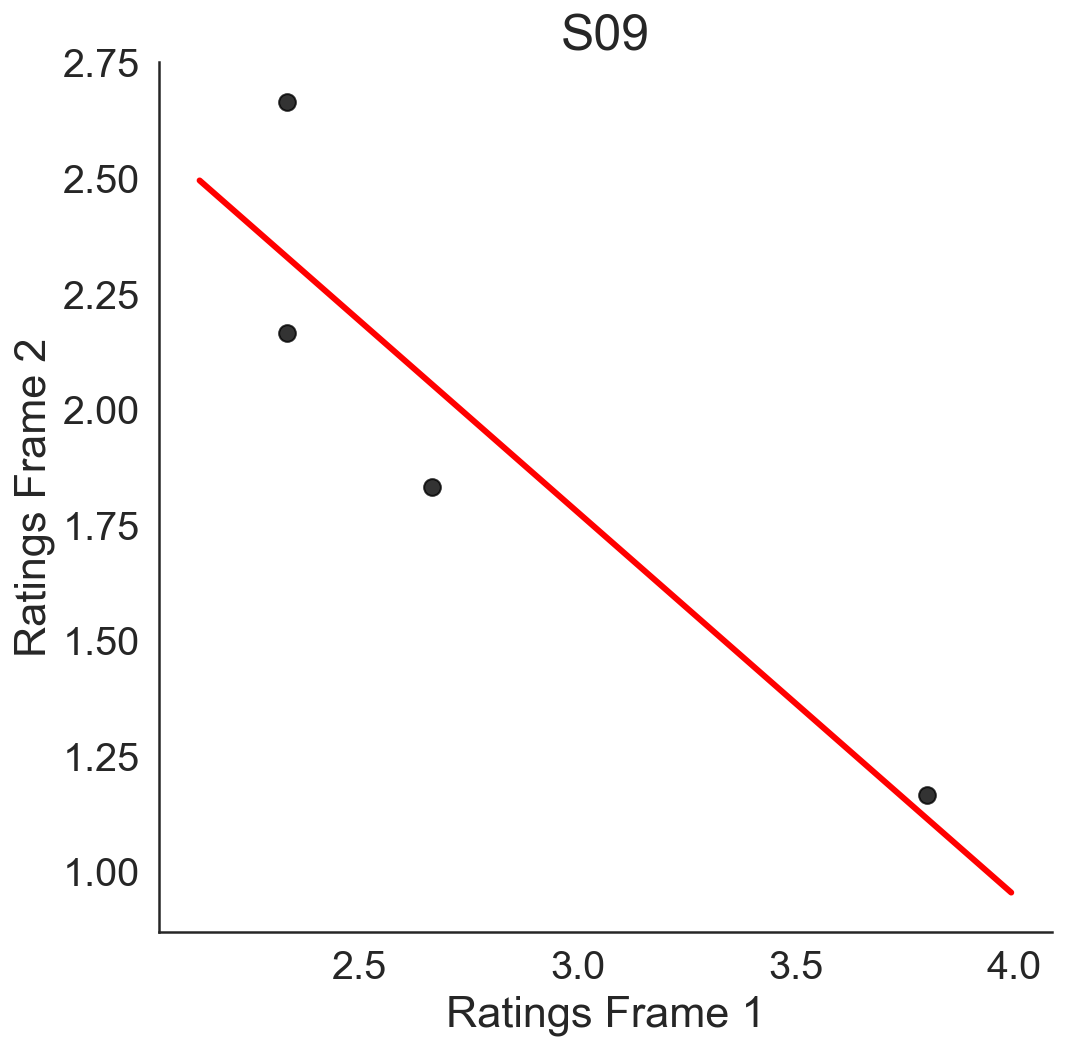

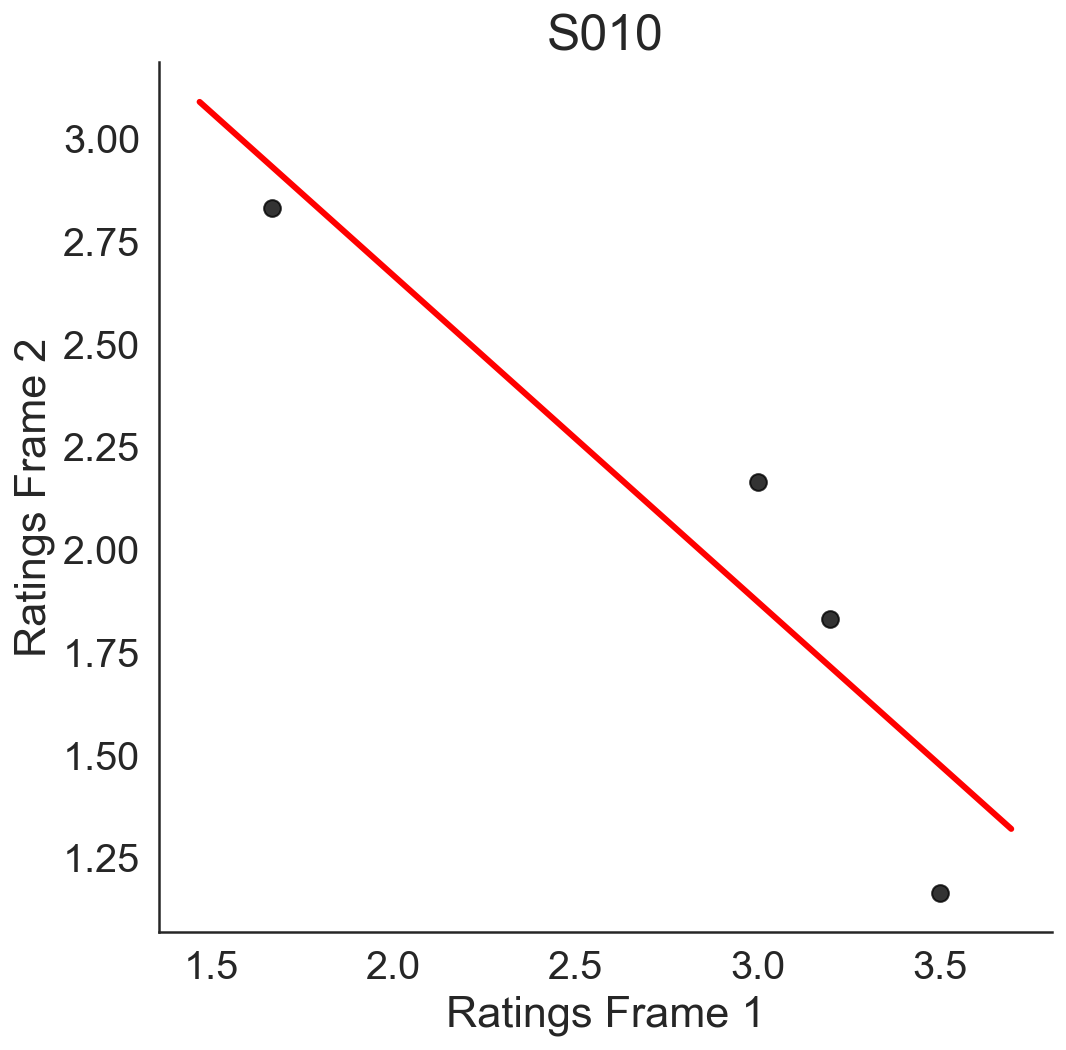

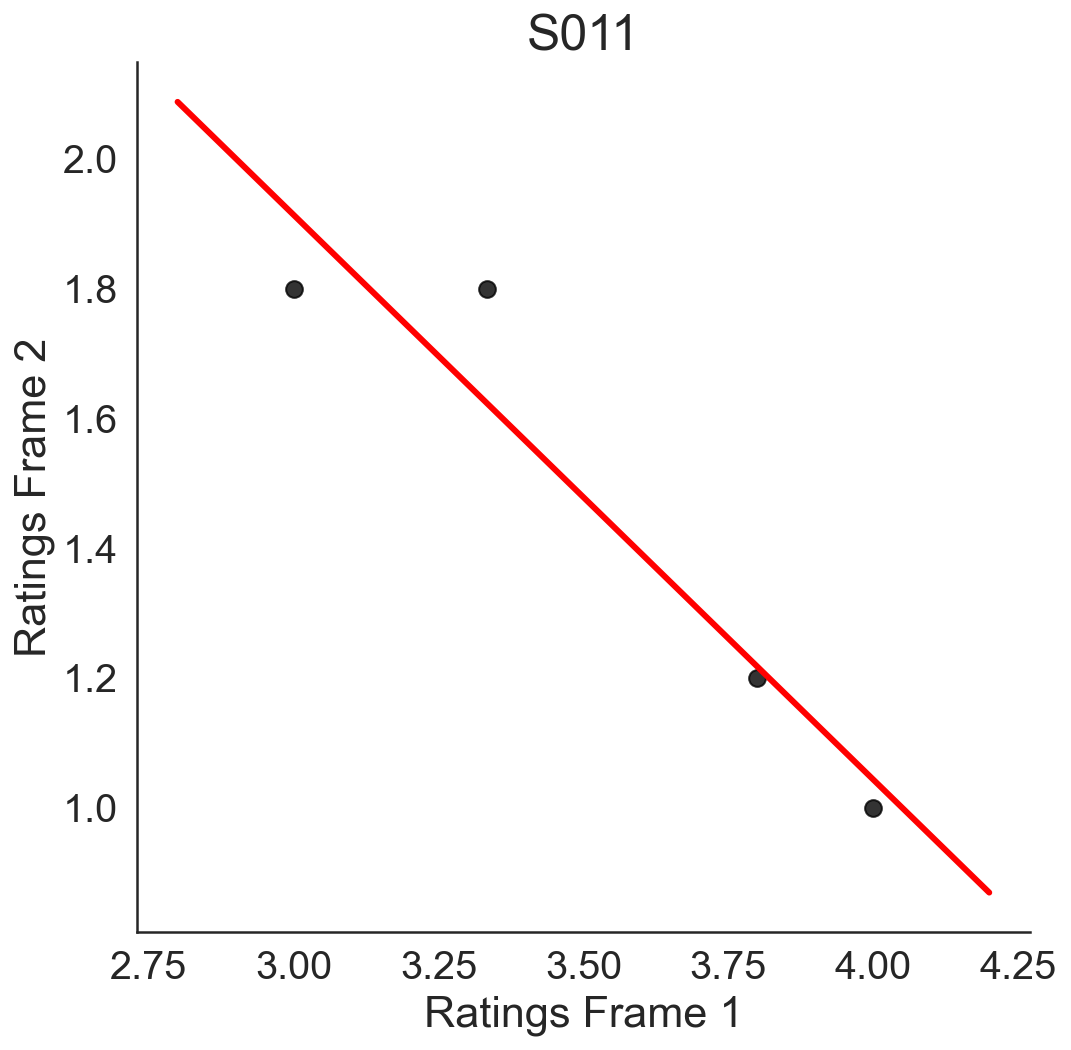

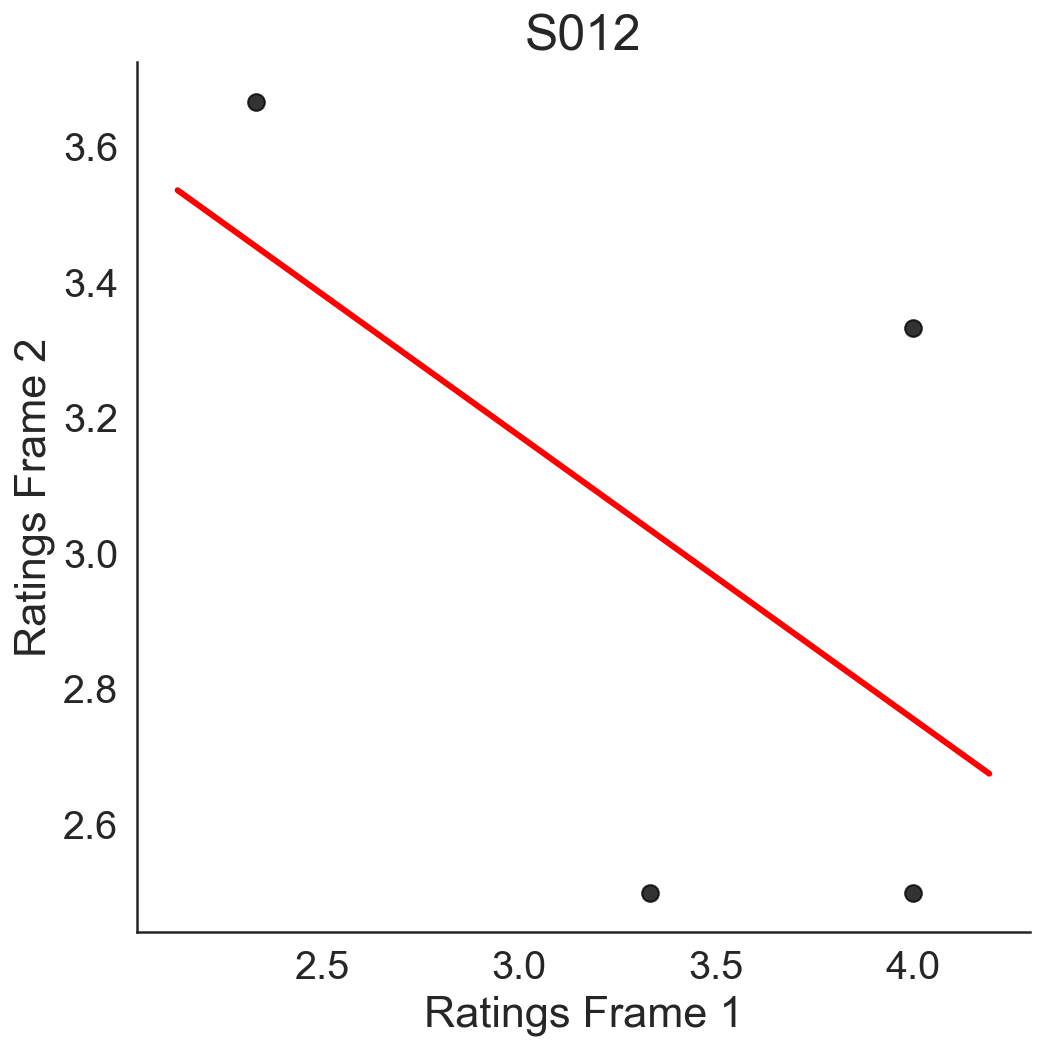

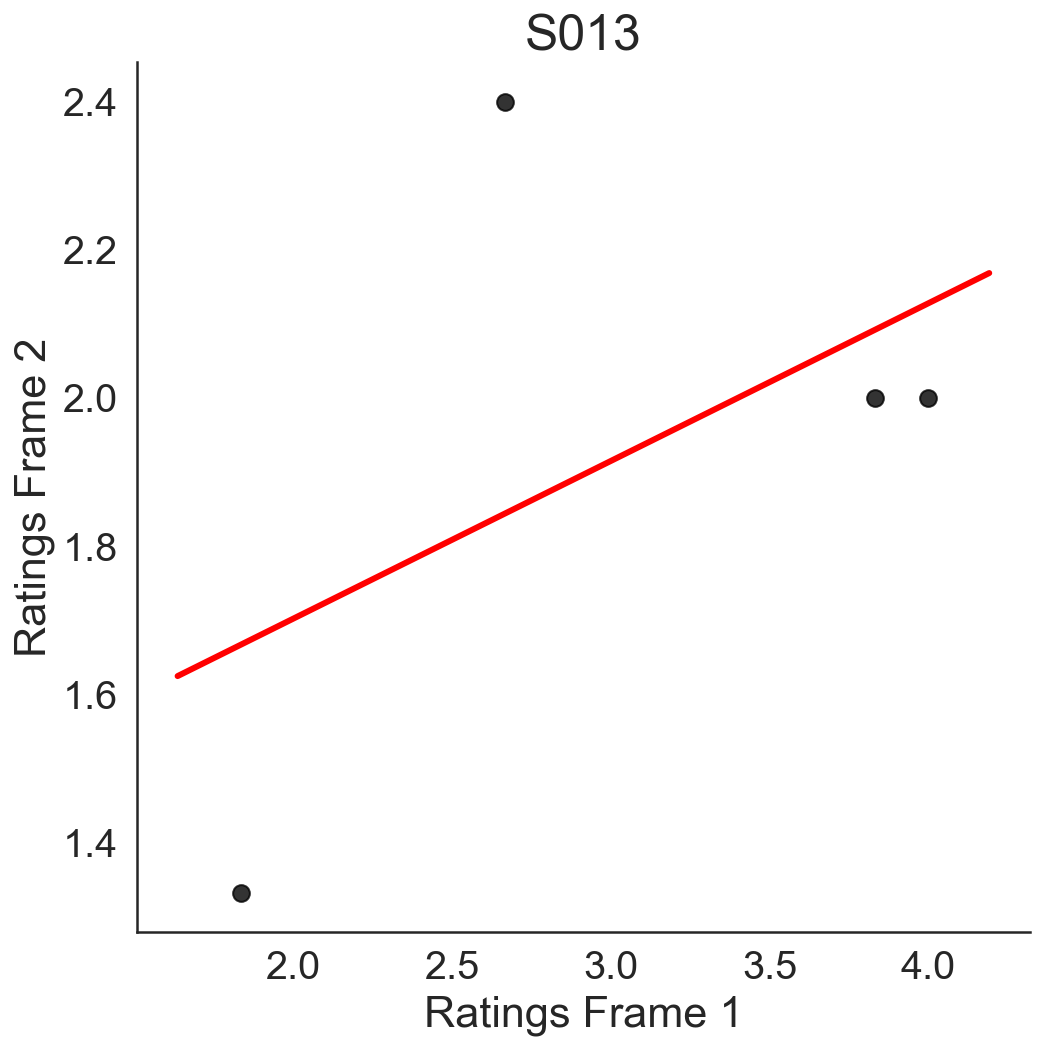

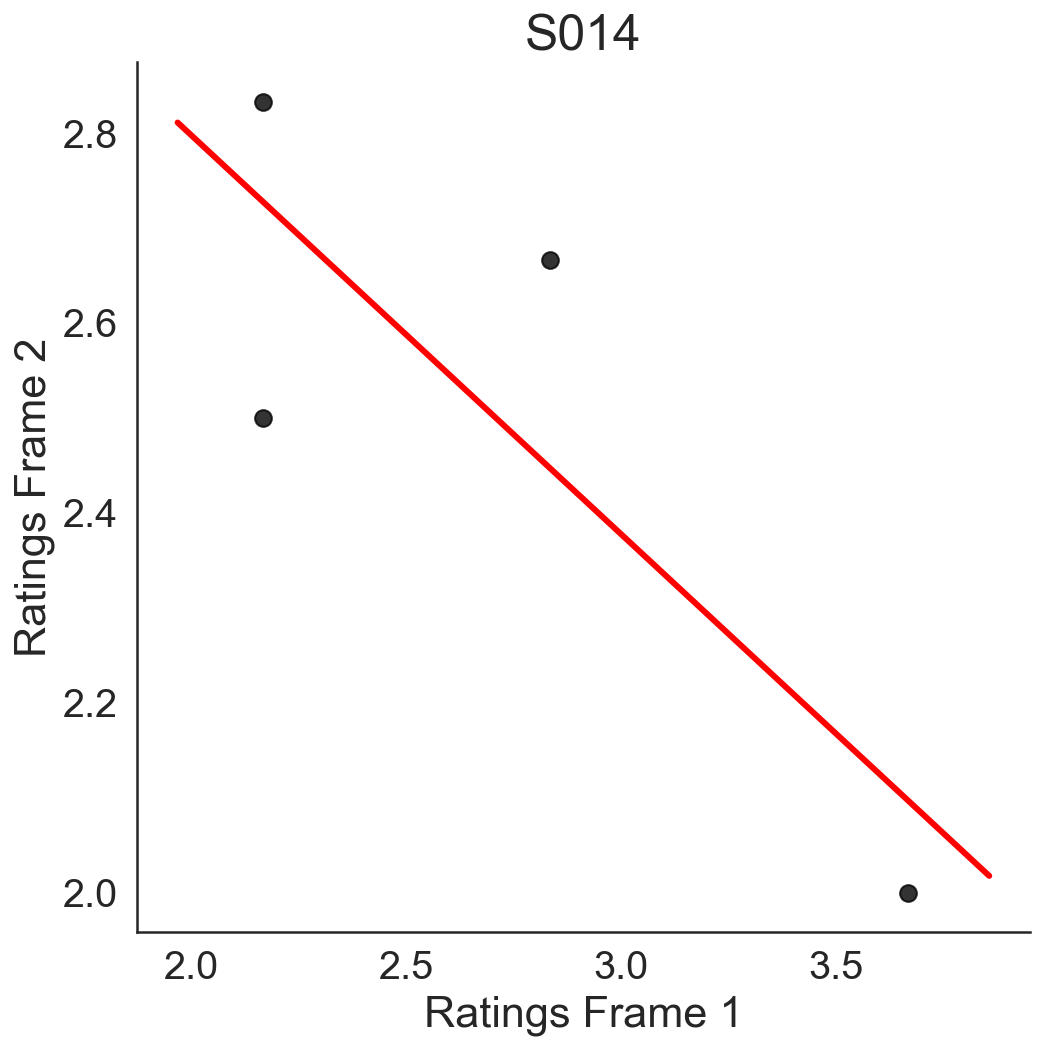

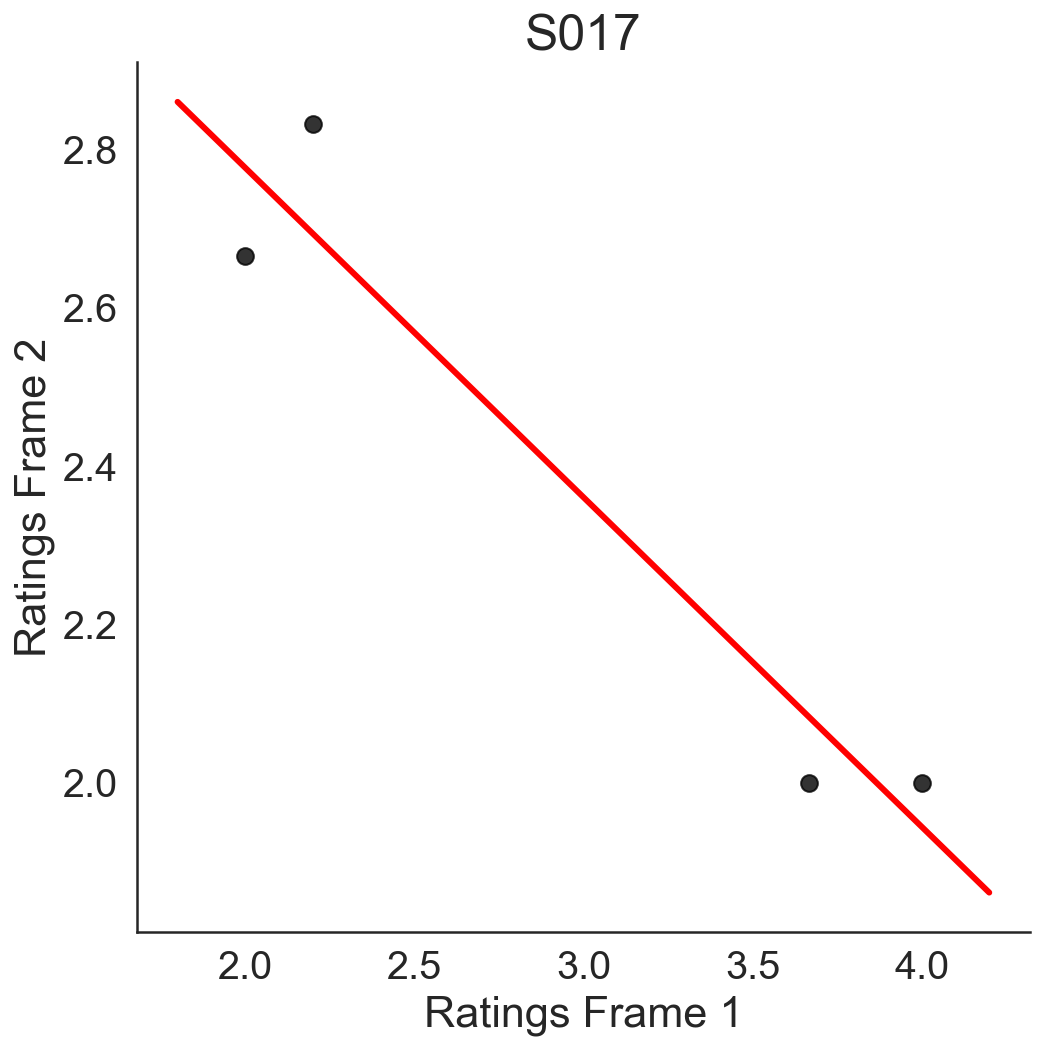

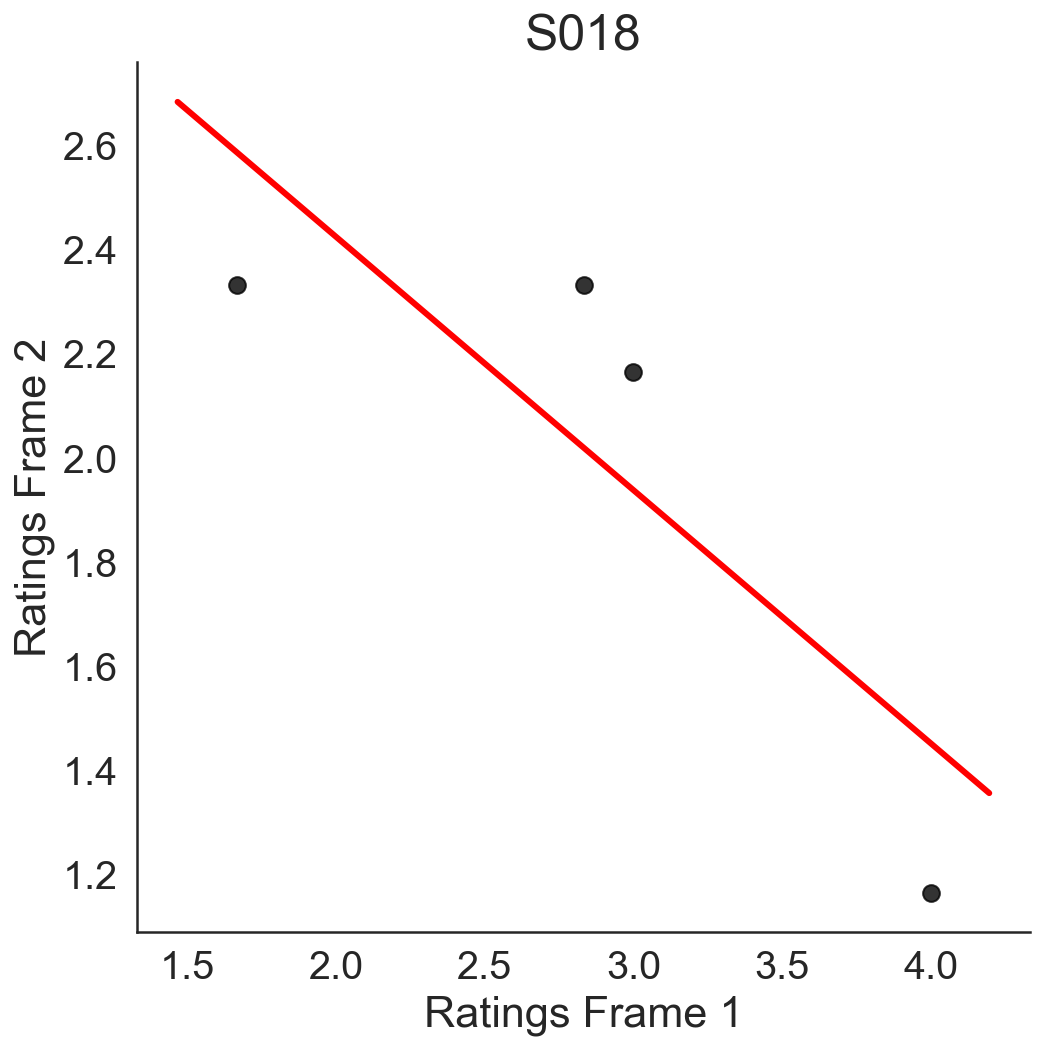

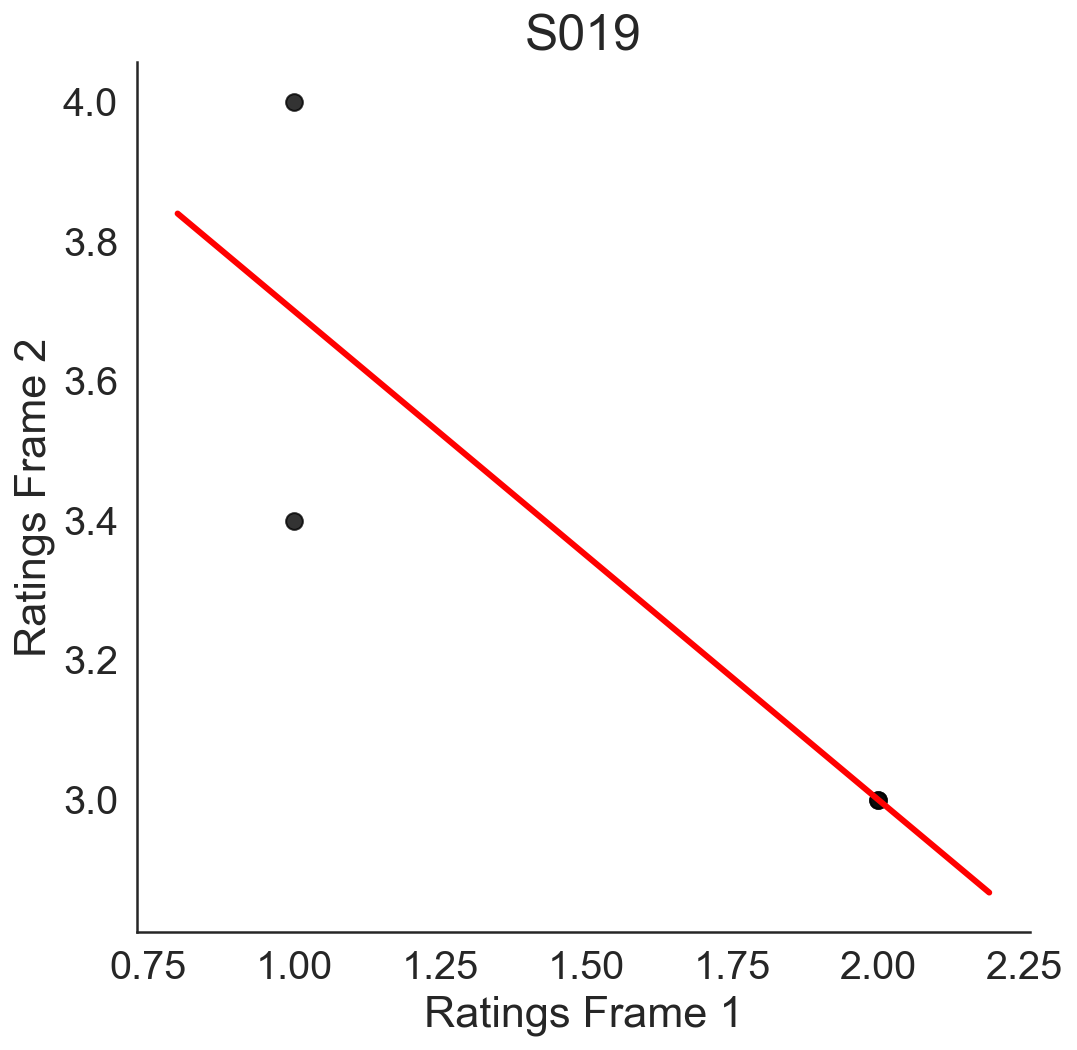

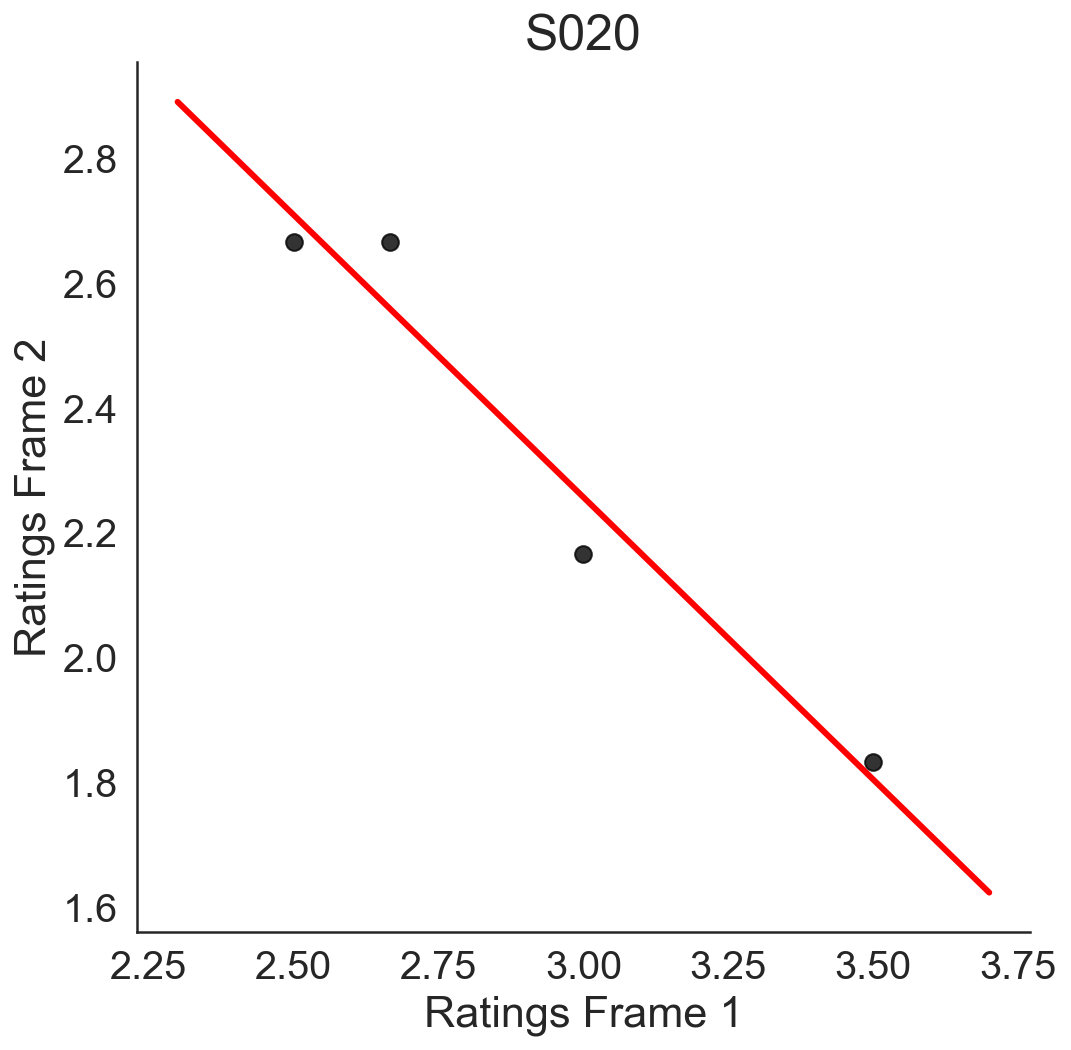

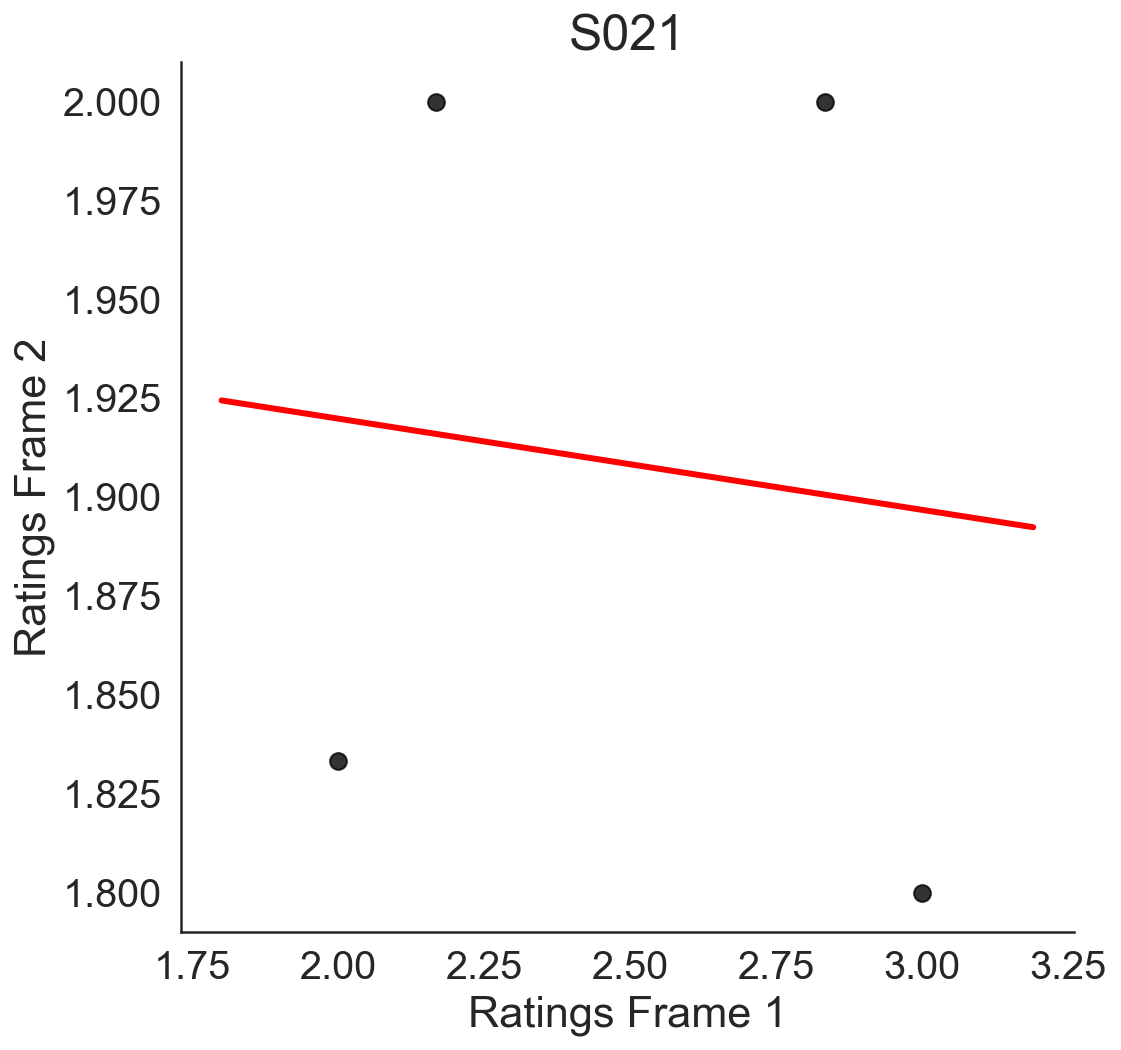

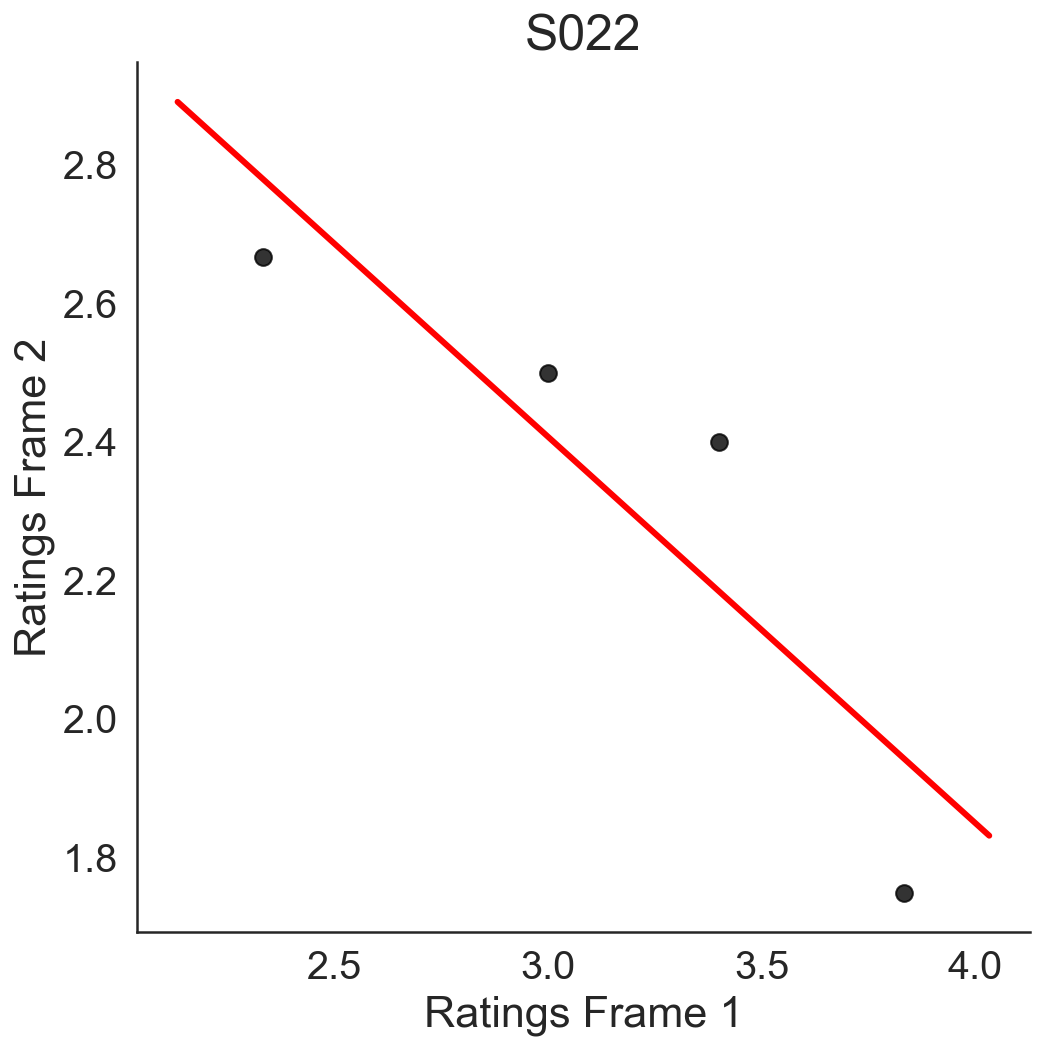

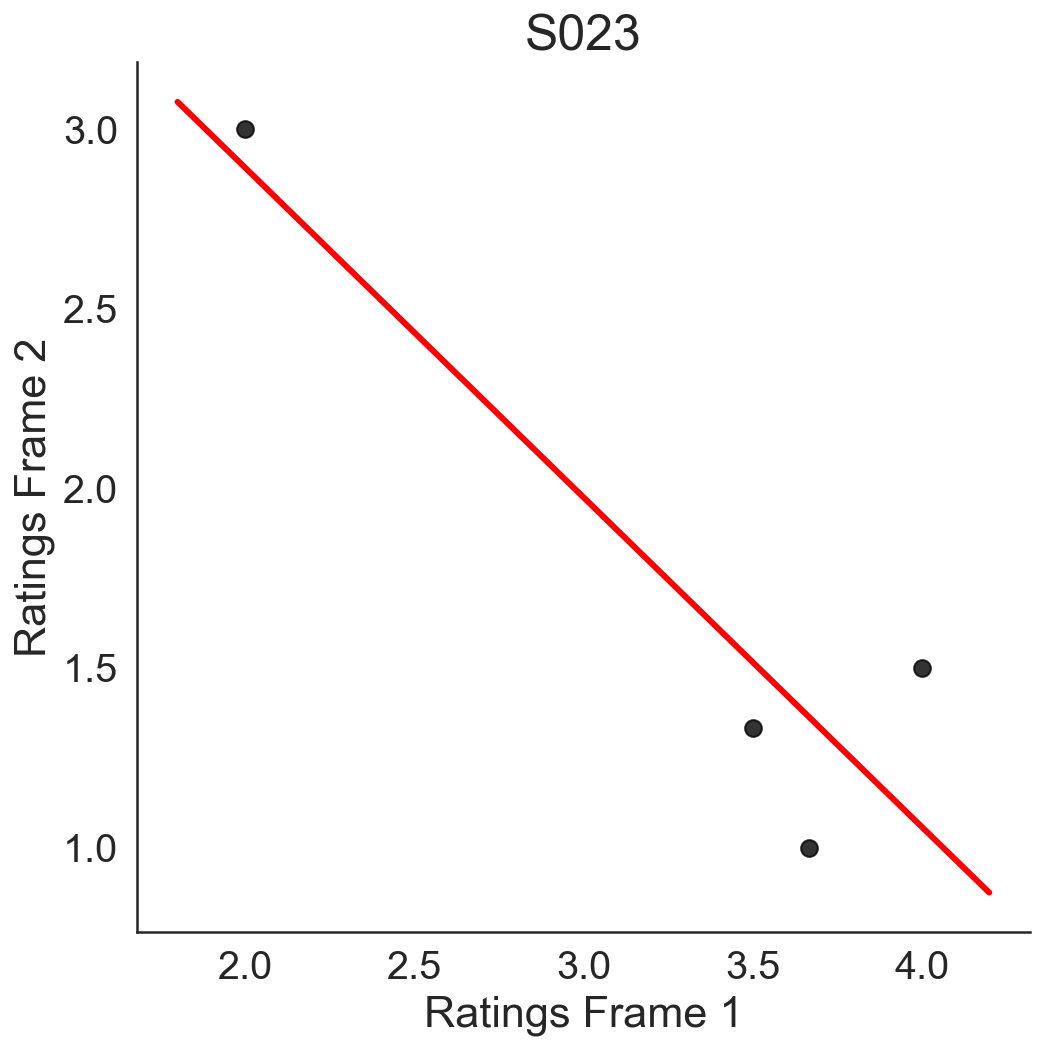

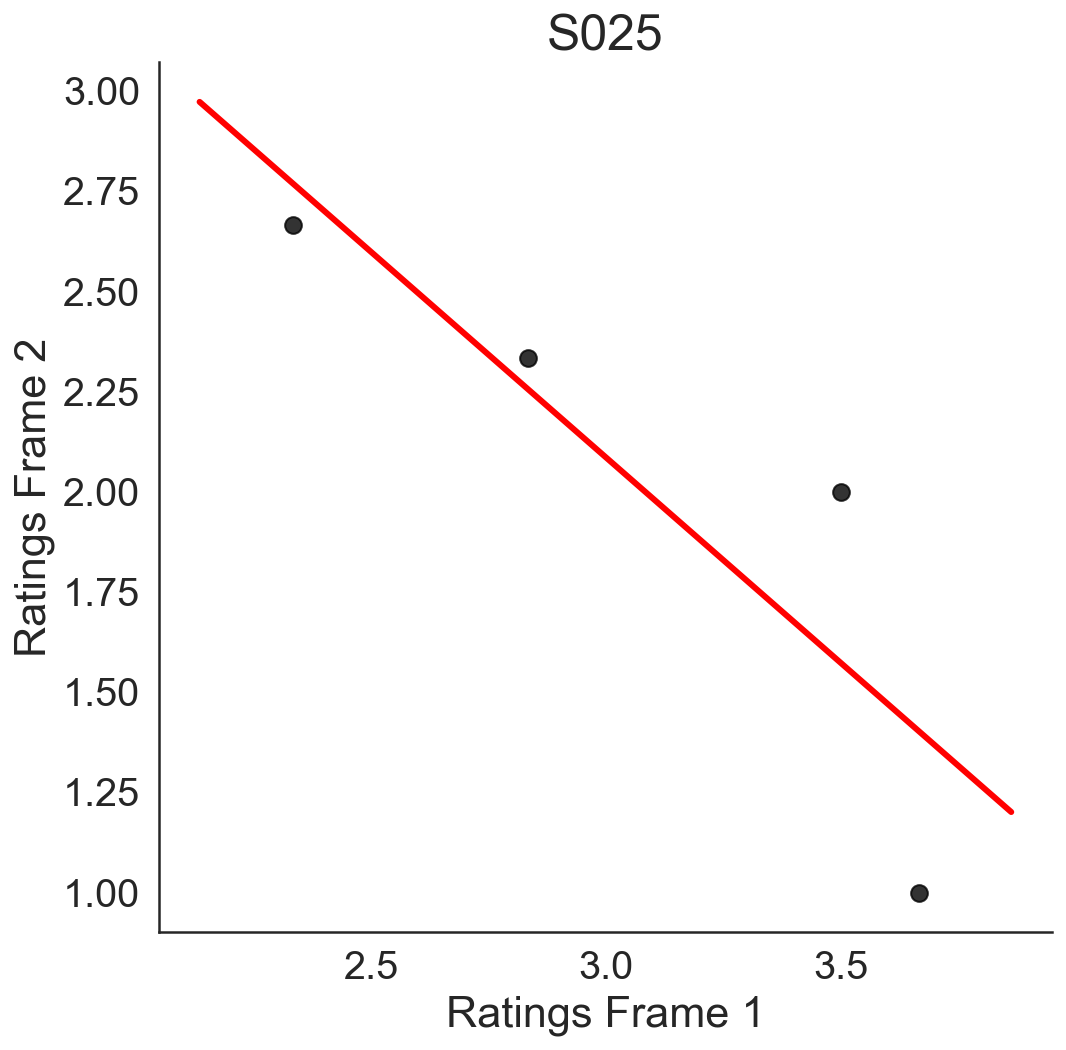

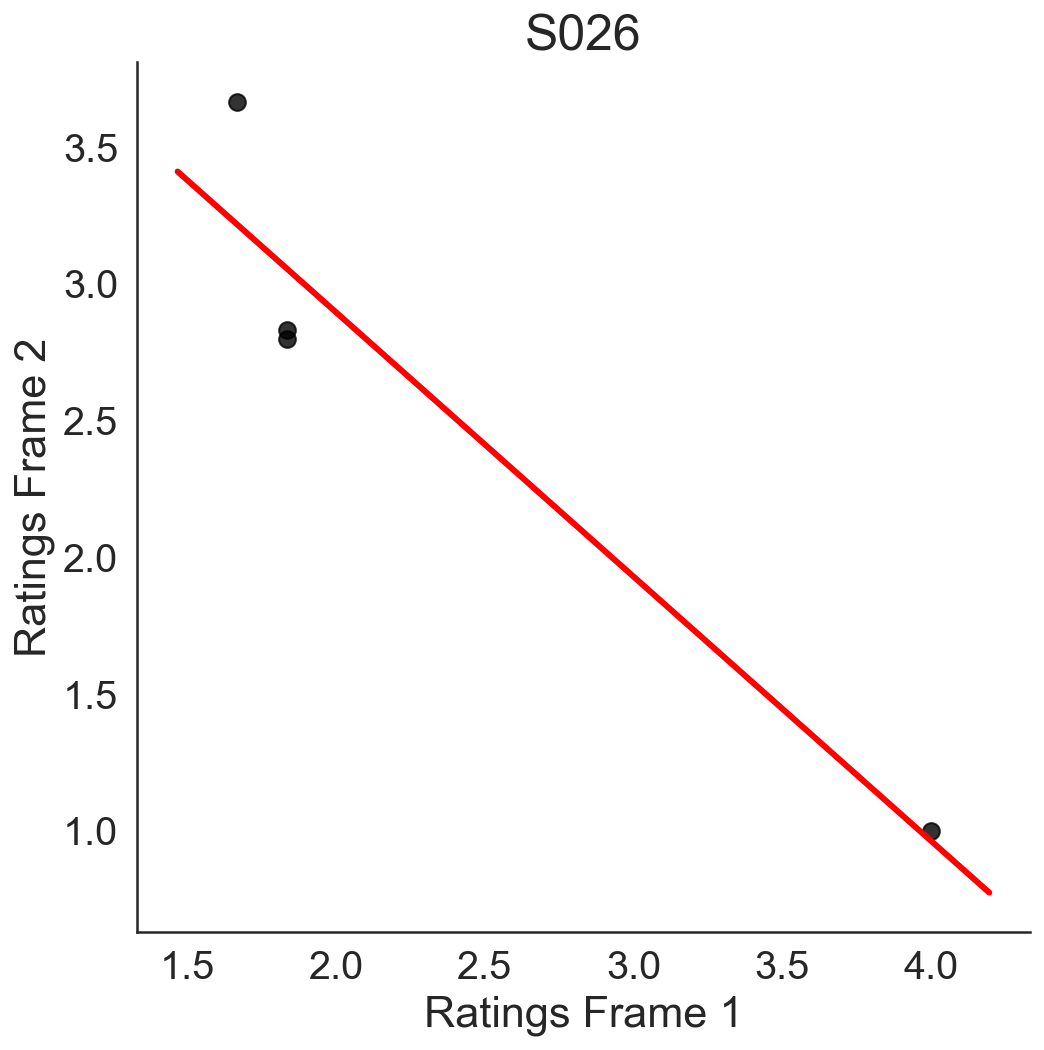

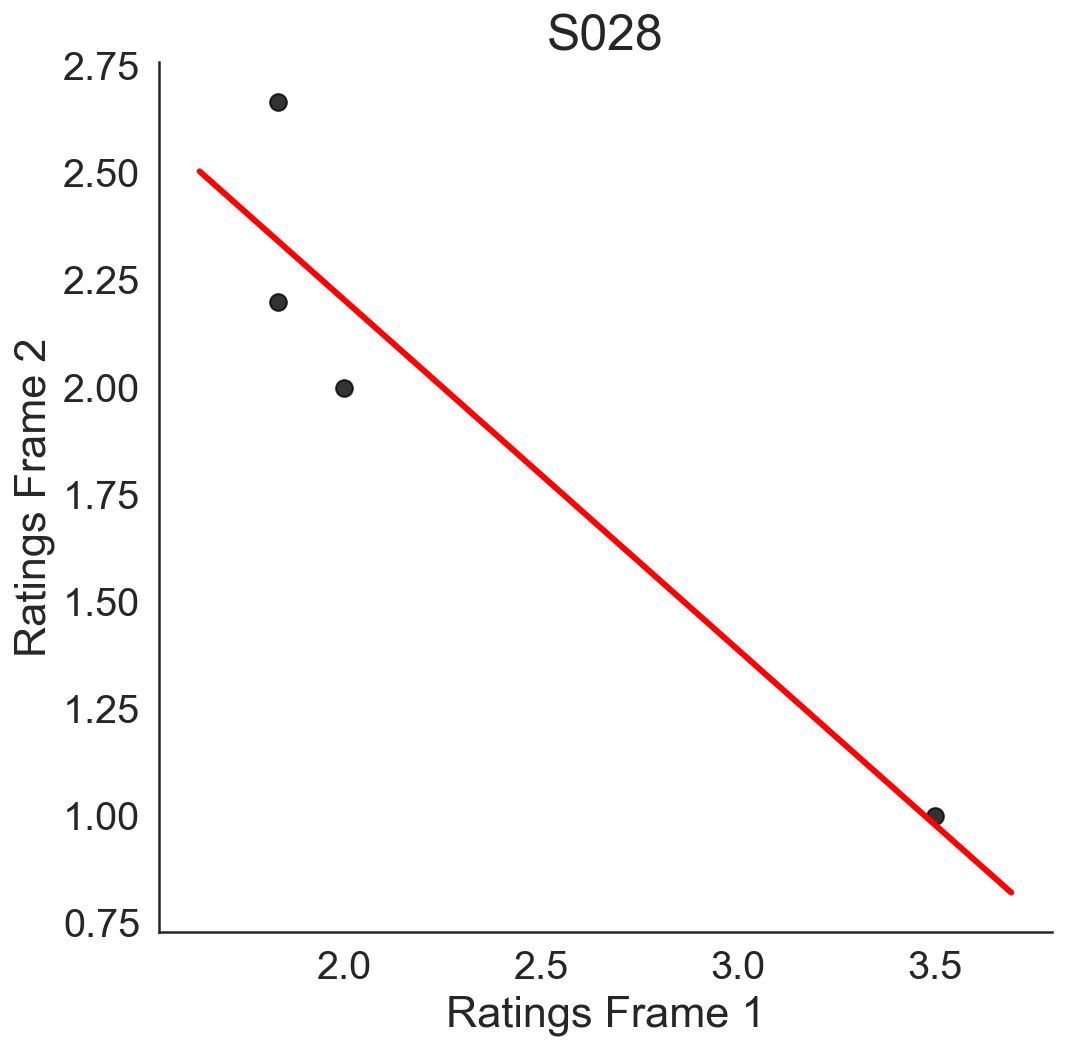

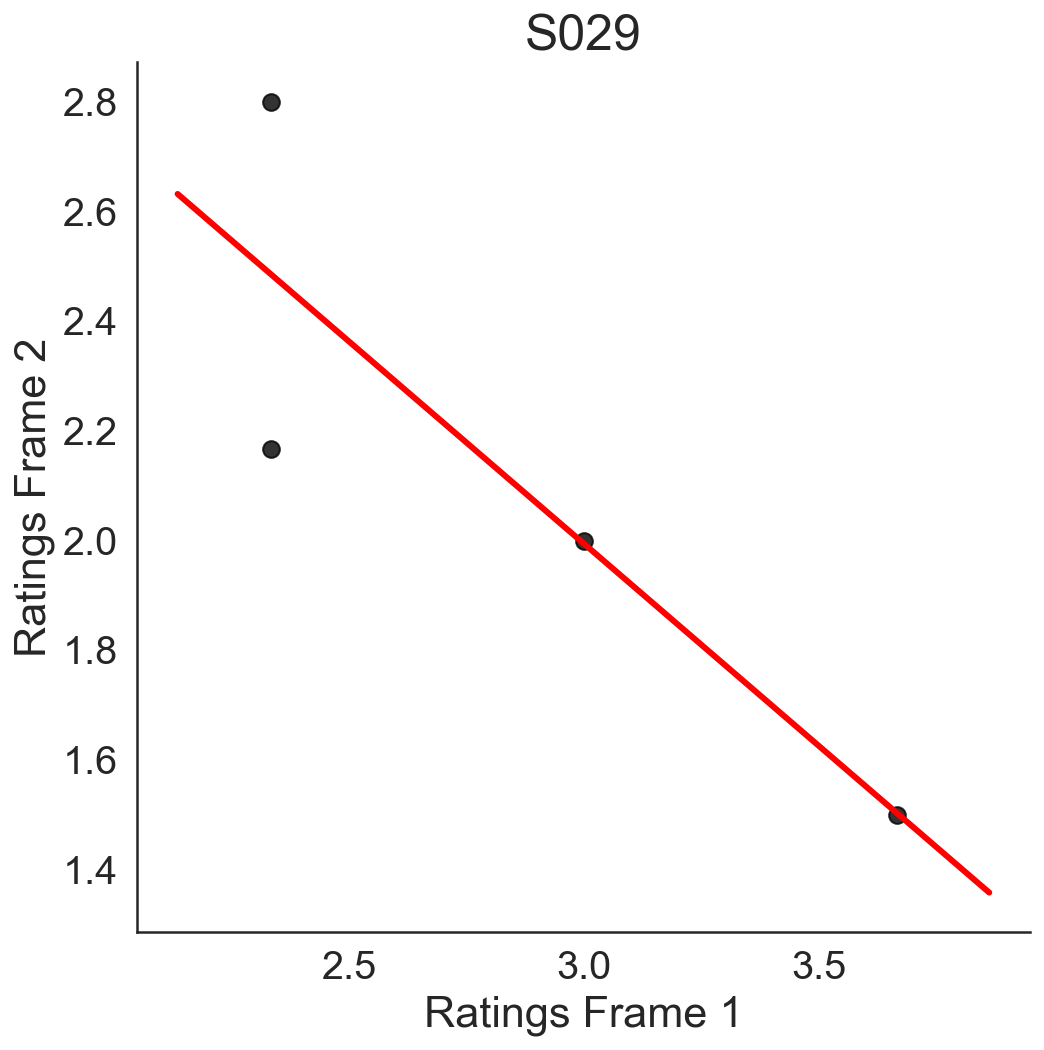

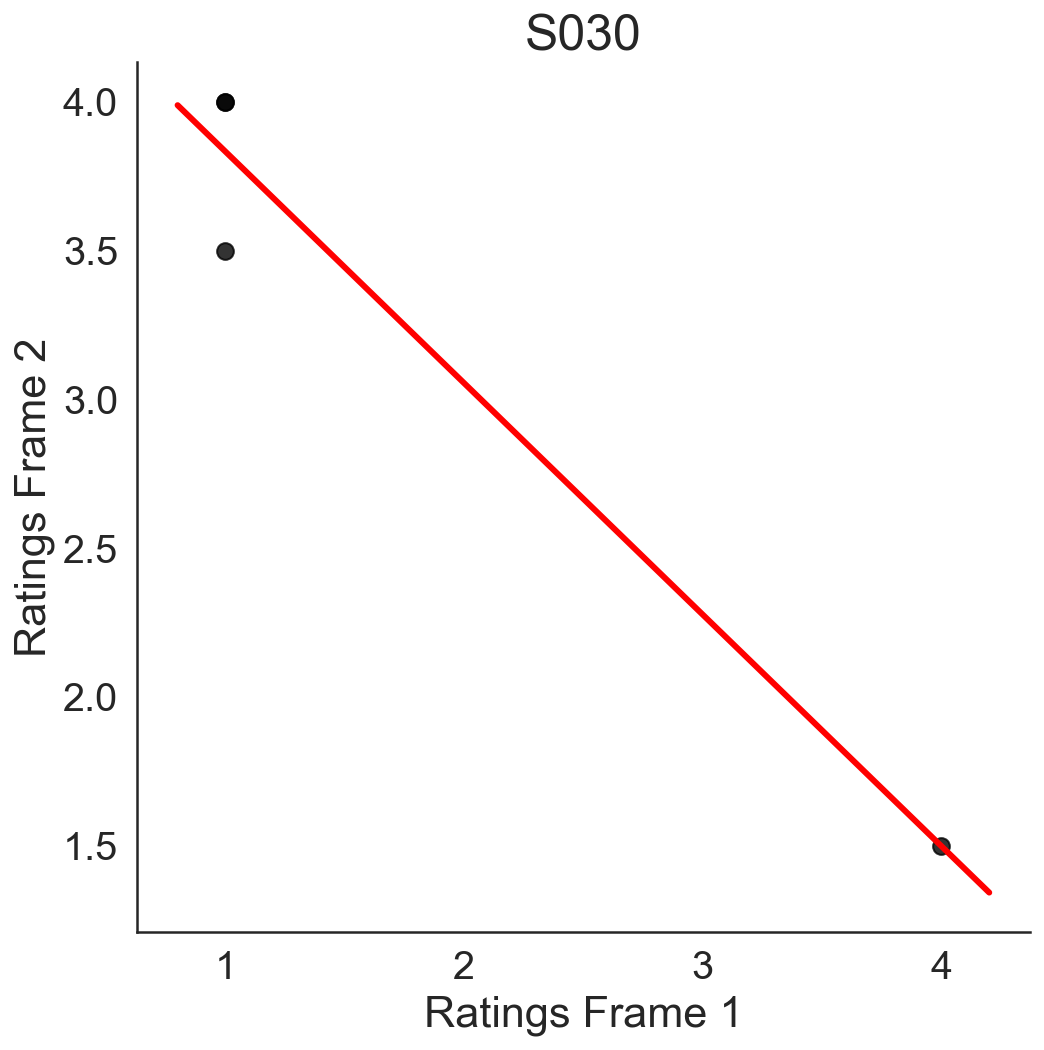

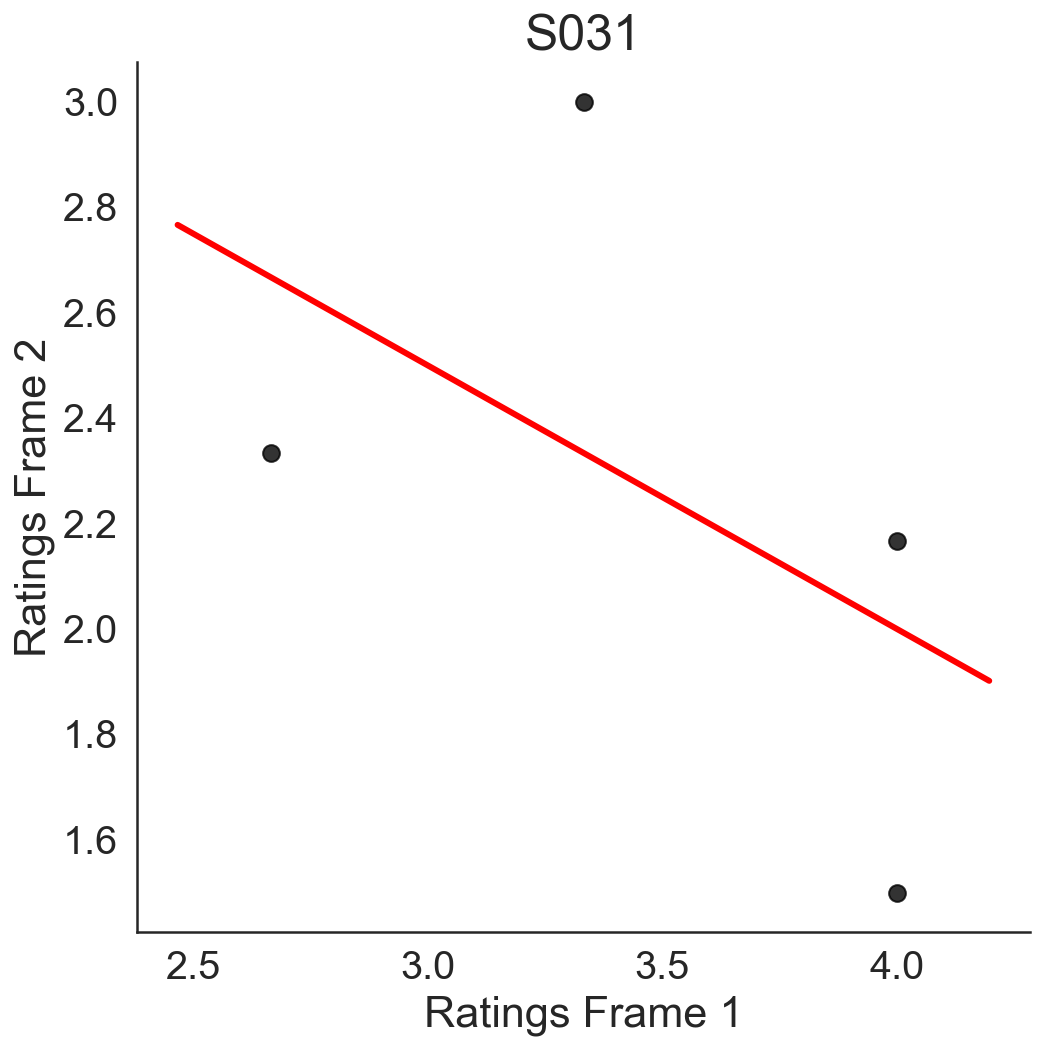

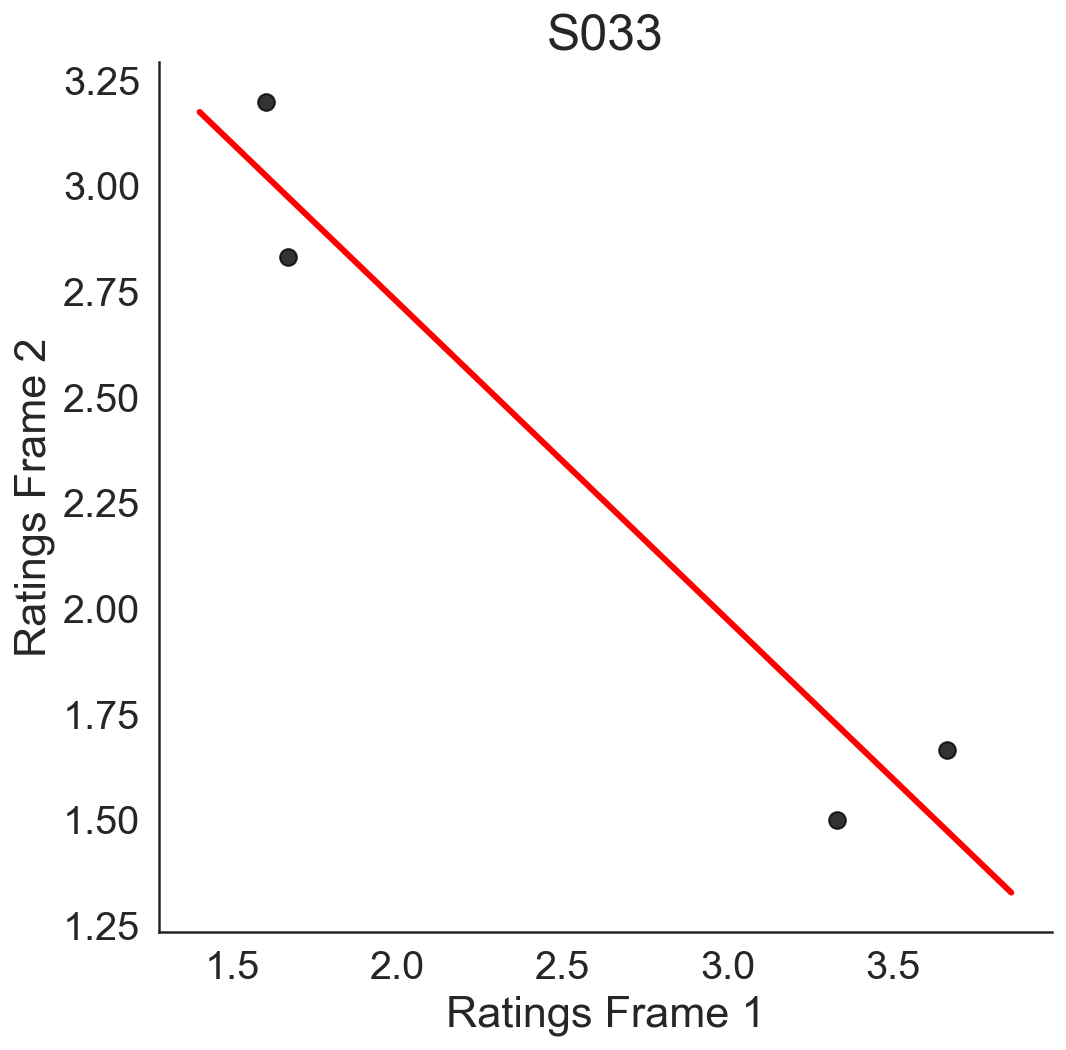

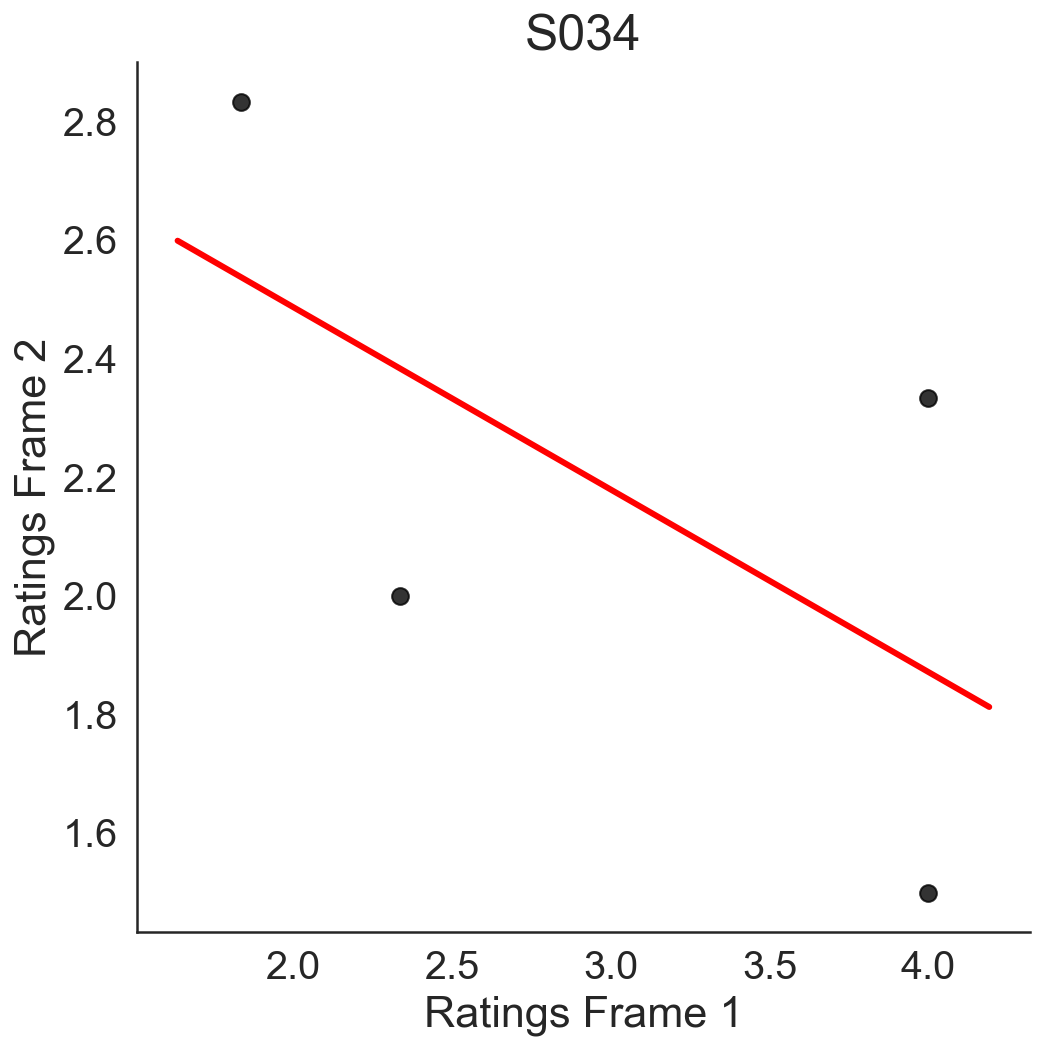

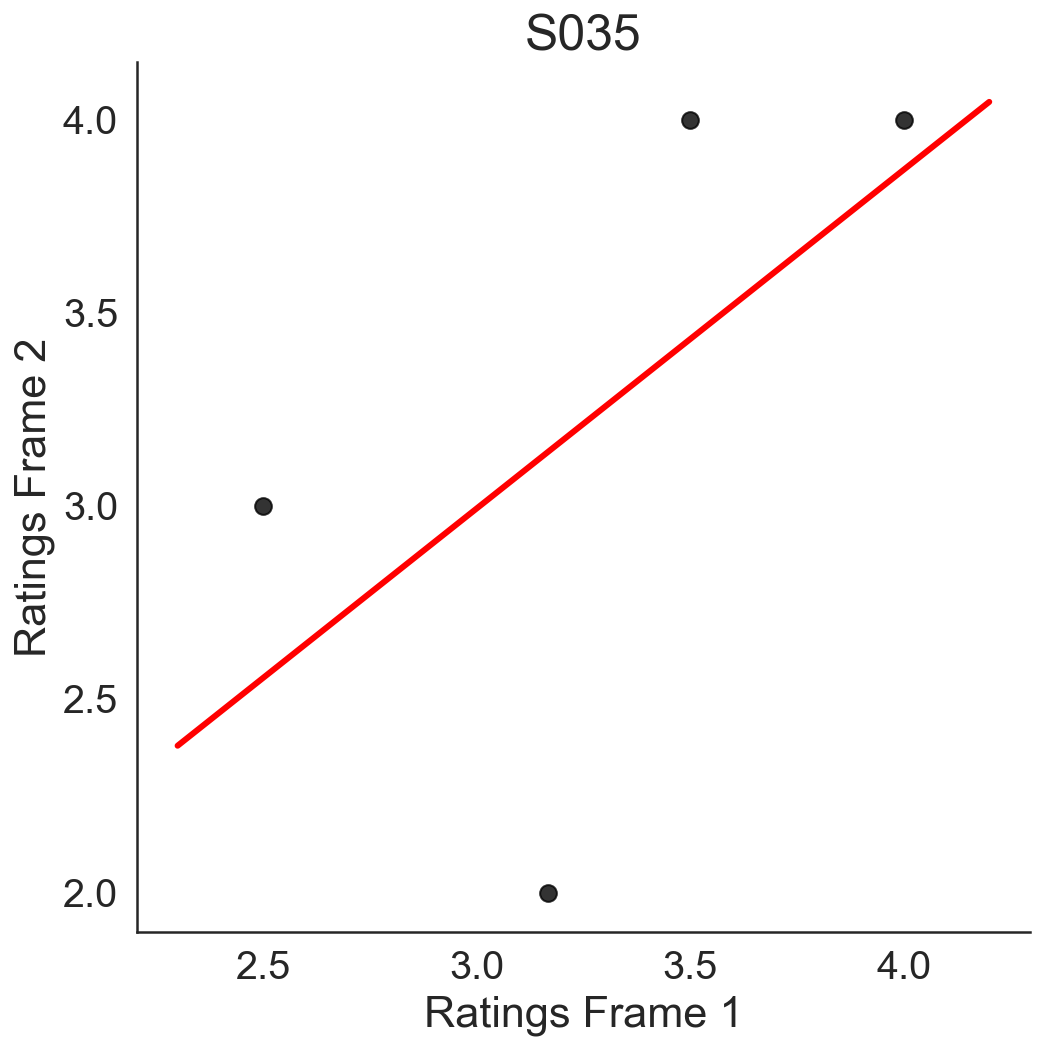

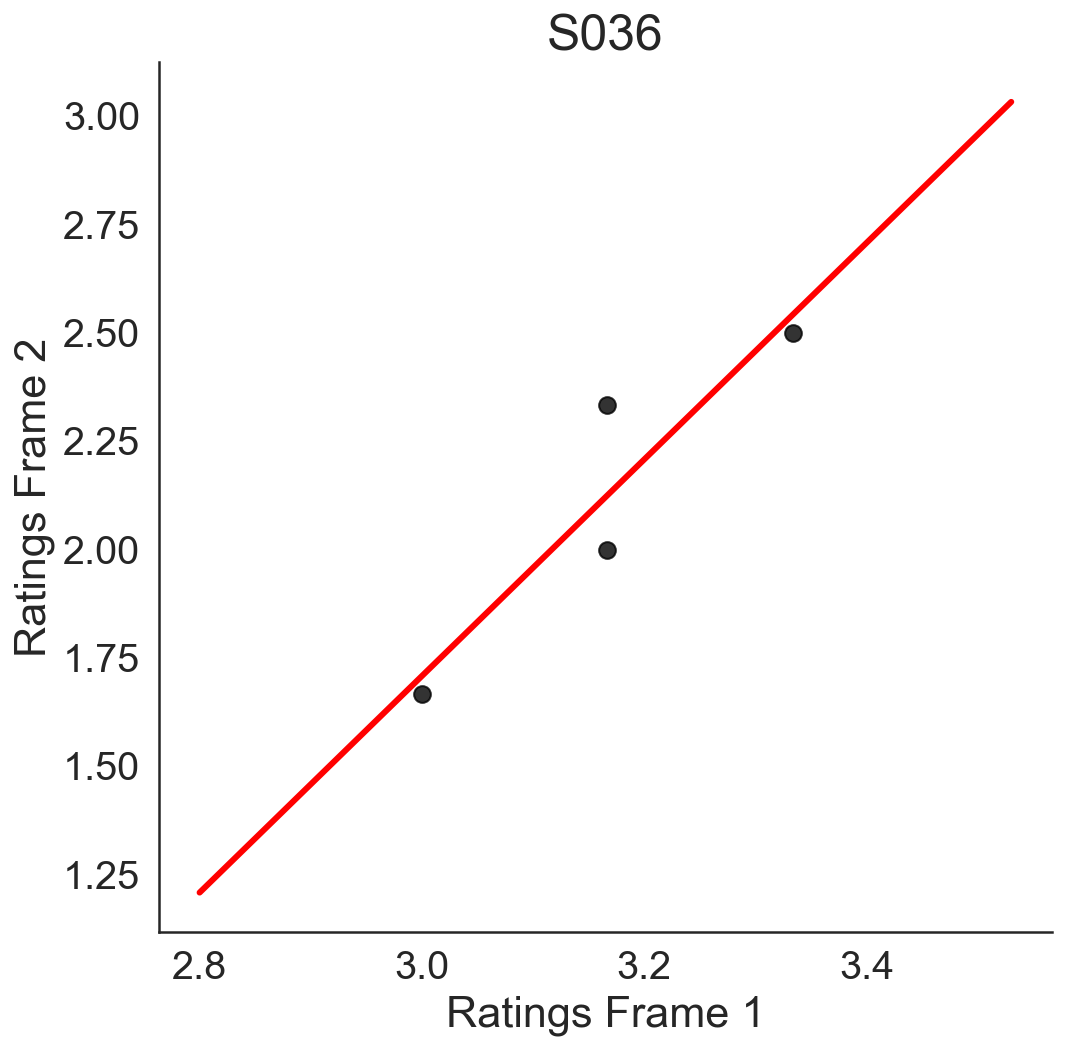

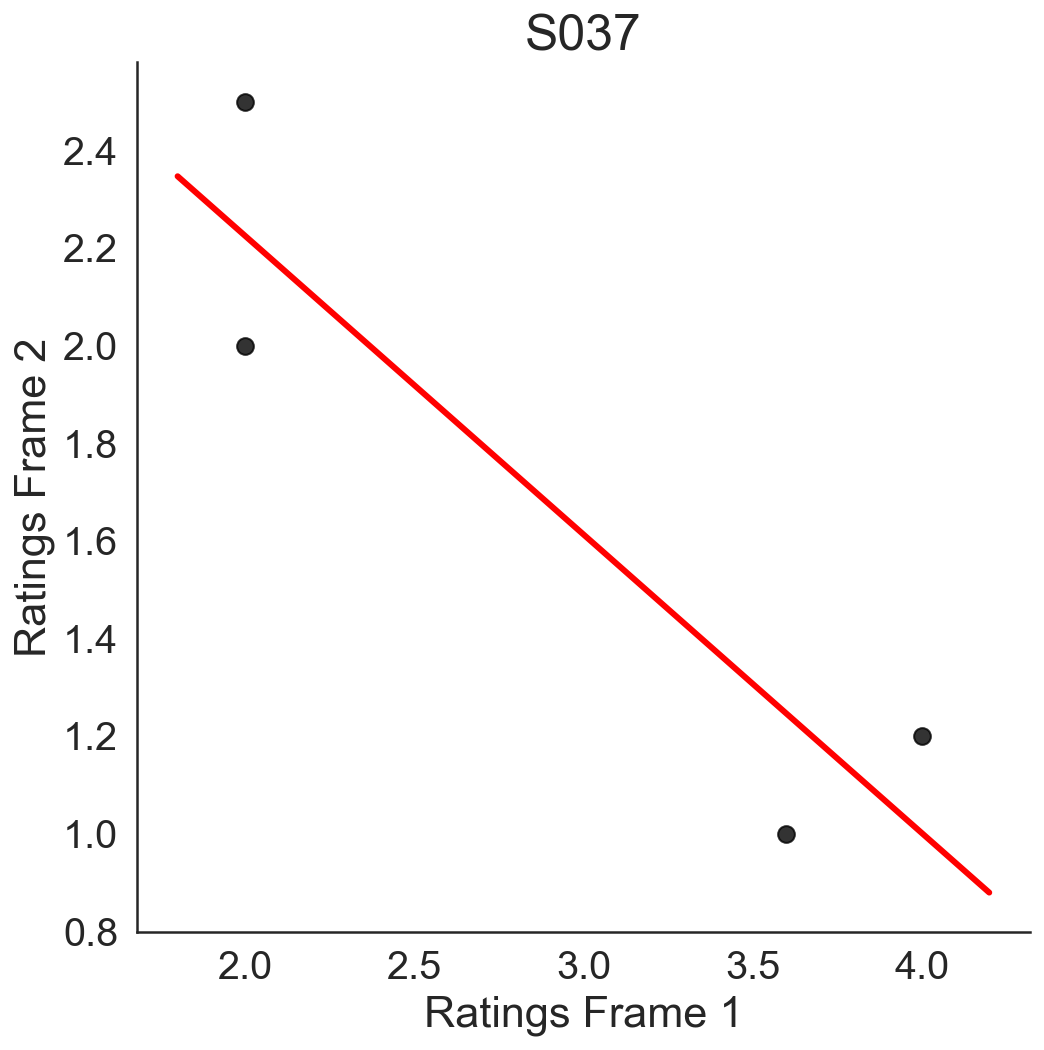

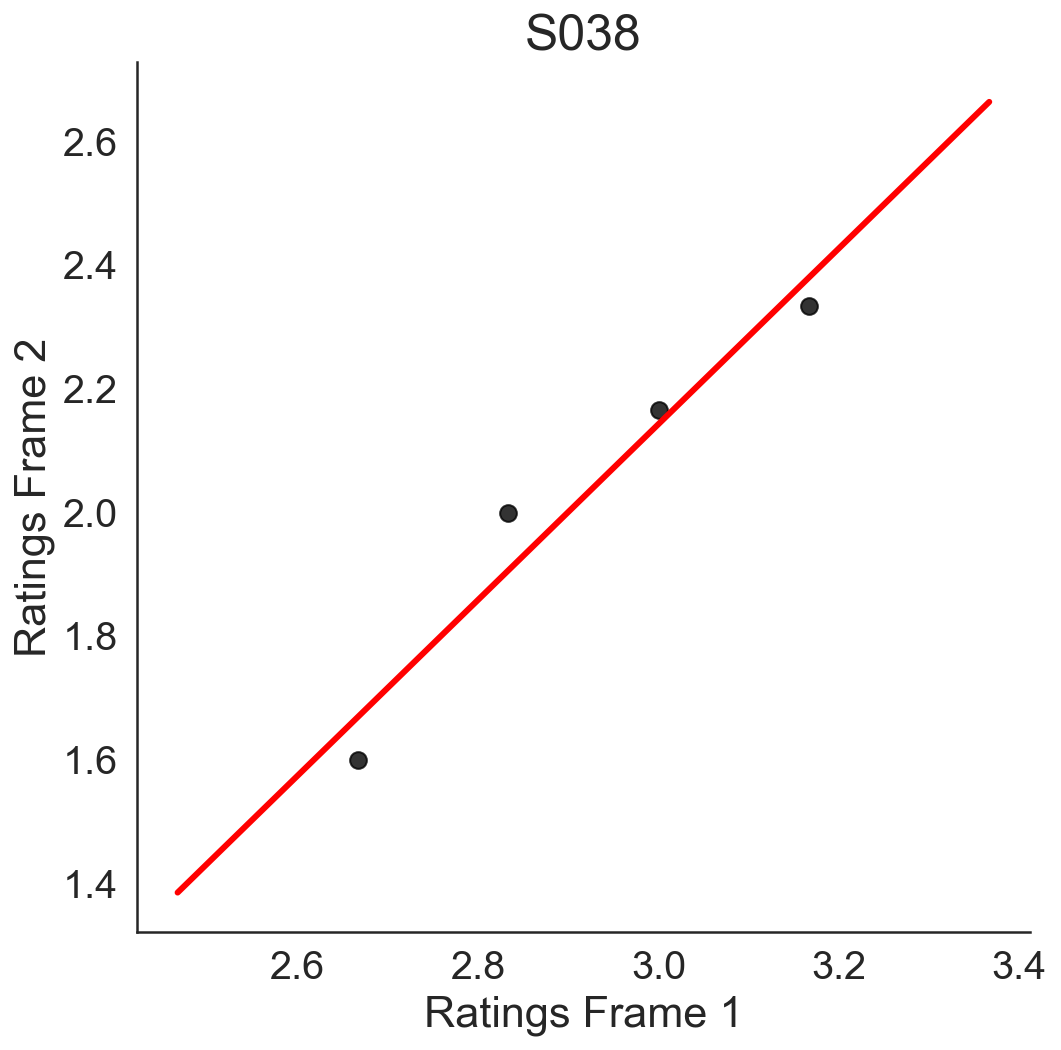

In [42]:
#corrPlotSimple(data_exp_ratings_2, 'rat1','Ratings Frame 1','rat2','Ratings Frame 2')
for part in data_exp1["Part"].unique(): 

    corrPlotSimple(data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)], 'rat1','Ratings Frame 1','rat2','Ratings Frame 2', title = 'S0'+str(part))


## 6. variability (std dev) of ratings for each pet in both frames 
### (frame 1: like; frame 2: dislike) 

Pearson's r = 0.282 p =  0.718
Pearson's r = 0.463 p =  0.537
Pearson's r = 0.377 p =  0.623
Pearson's r = -0.233 p =  0.767
Pearson's r = 0.837 p =  0.163
Pearson's r = 0.574 p =  0.426
Pearson's r = 0.0 p =  1.0
Pearson's r = -0.039 p =  0.961
Pearson's r = 0.122 p =  0.878
Pearson's r = 0.269 p =  0.731
Pearson's r = 0.583 p =  0.417
Pearson's r = nan p =  nan


/Users/pradyumna/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/Users/pradyumna/anaconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:659: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

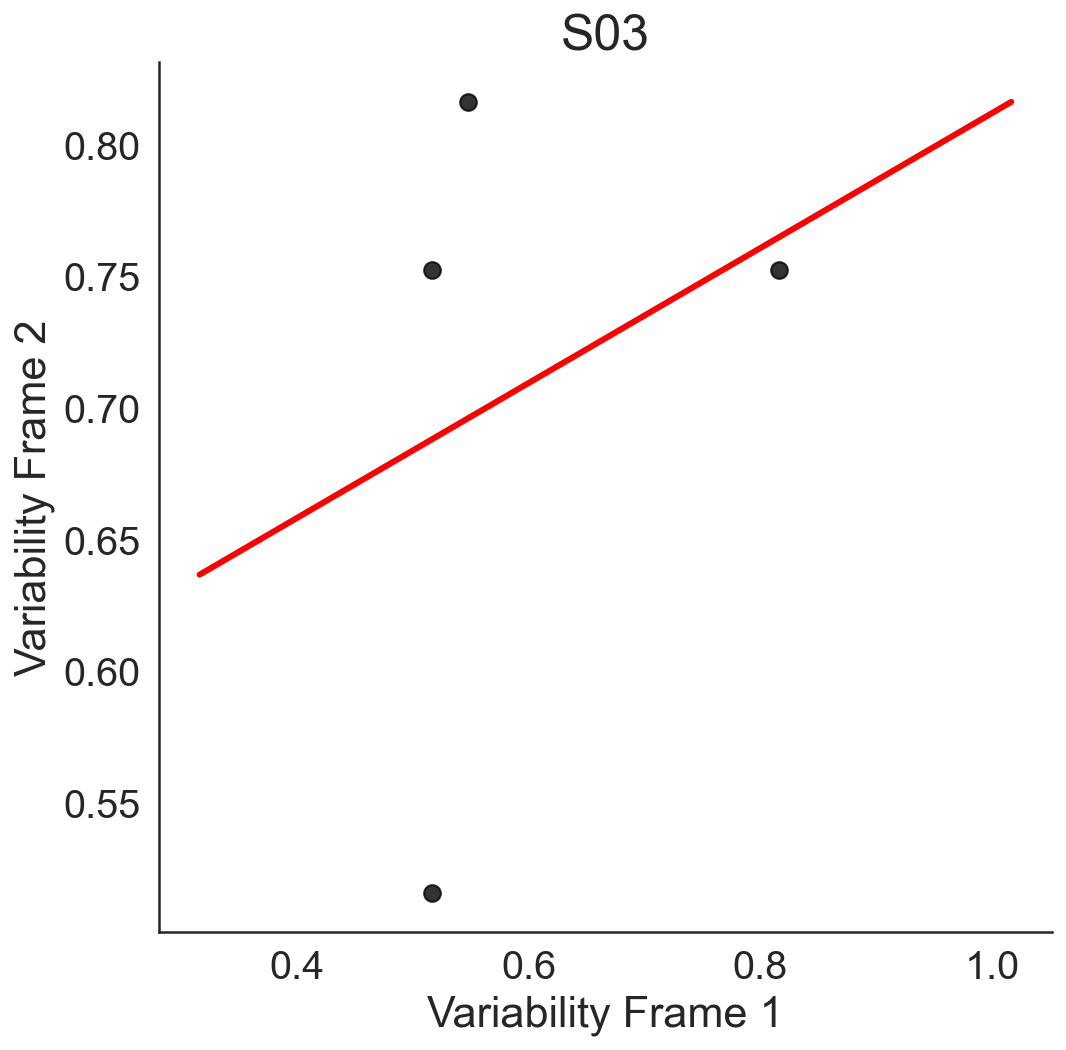

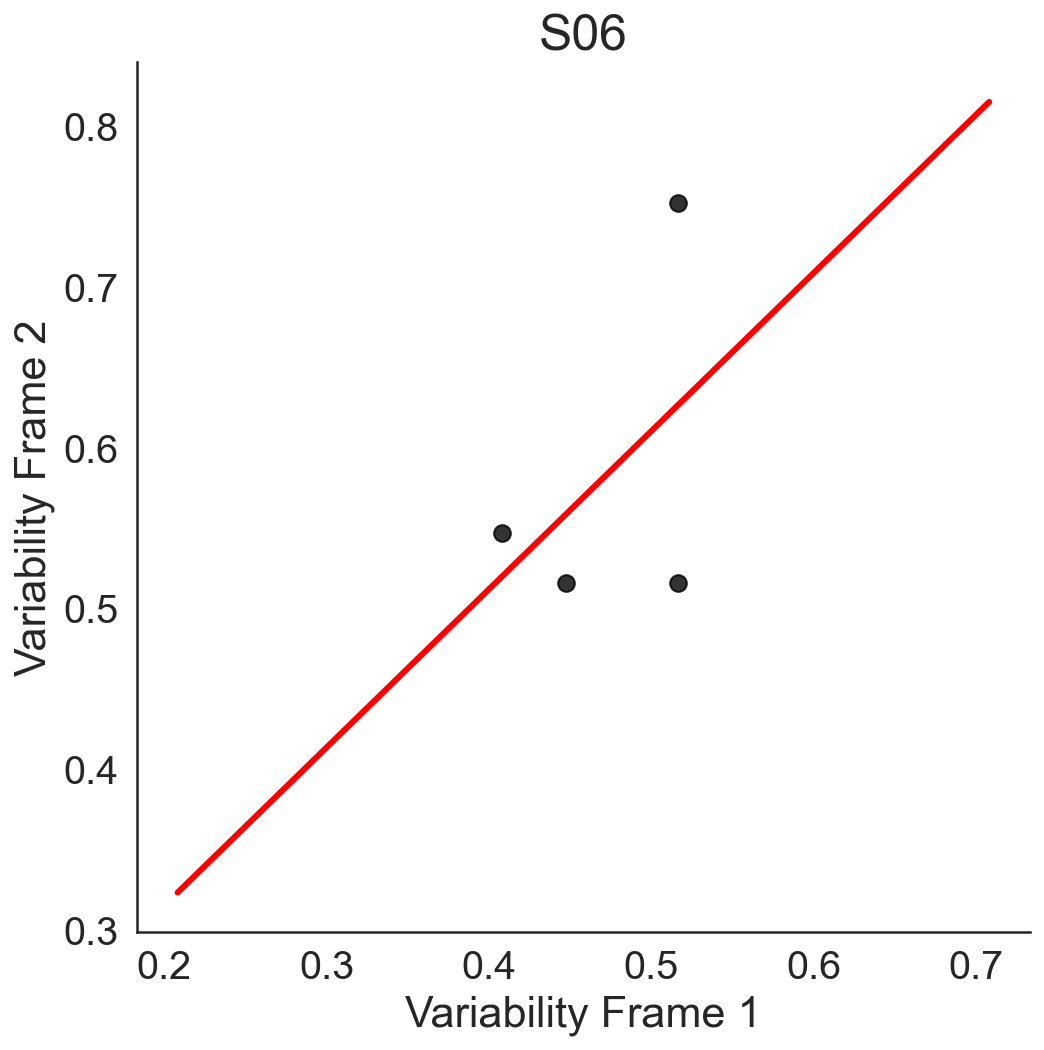

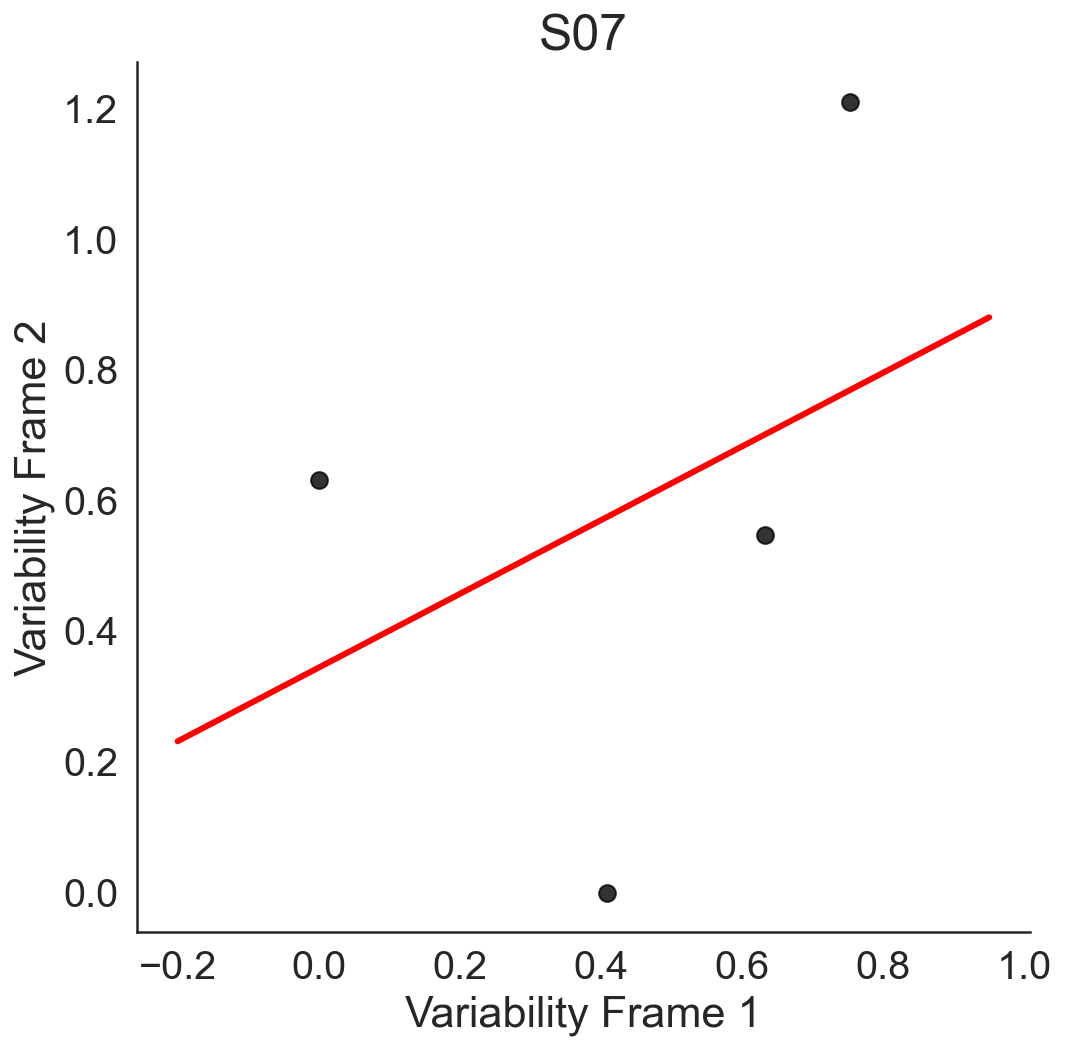

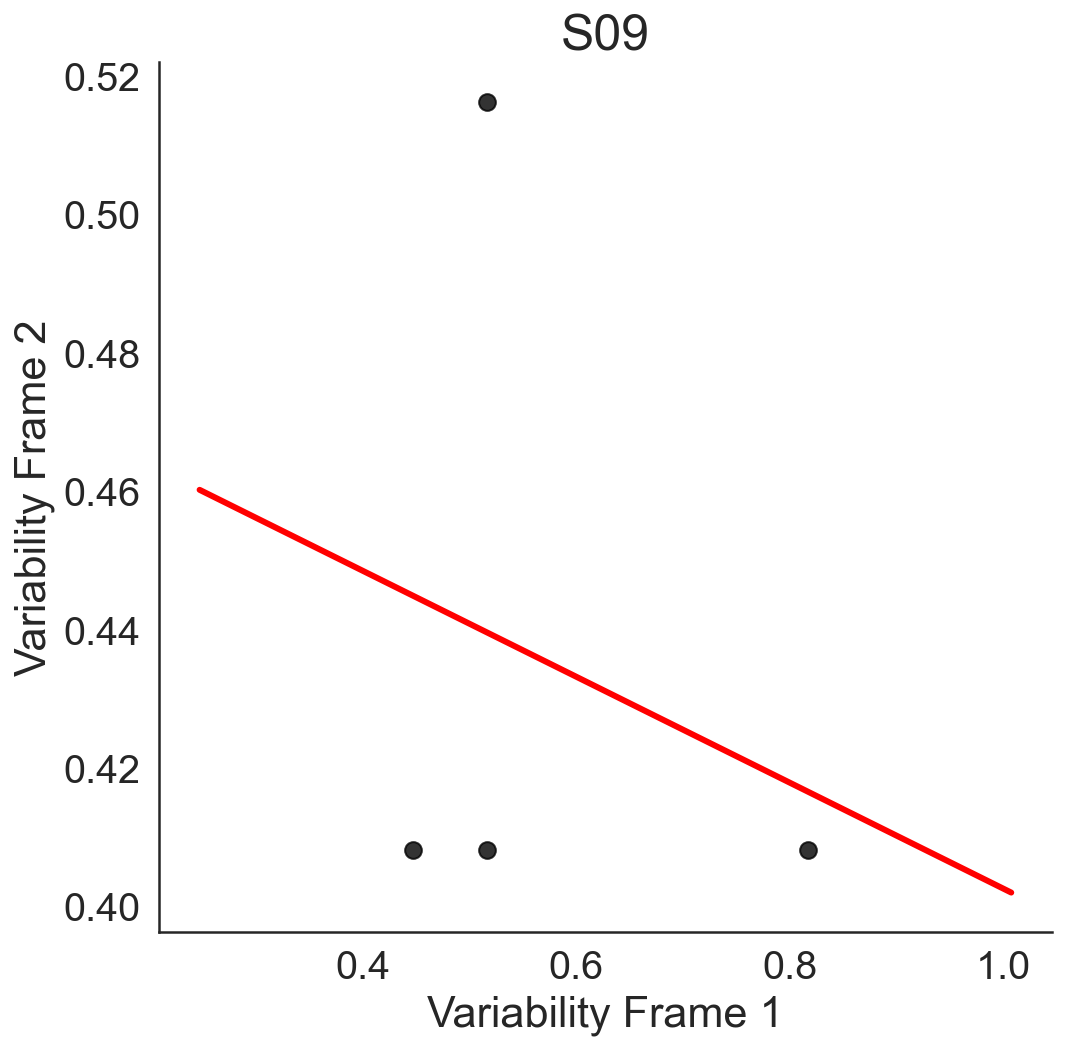

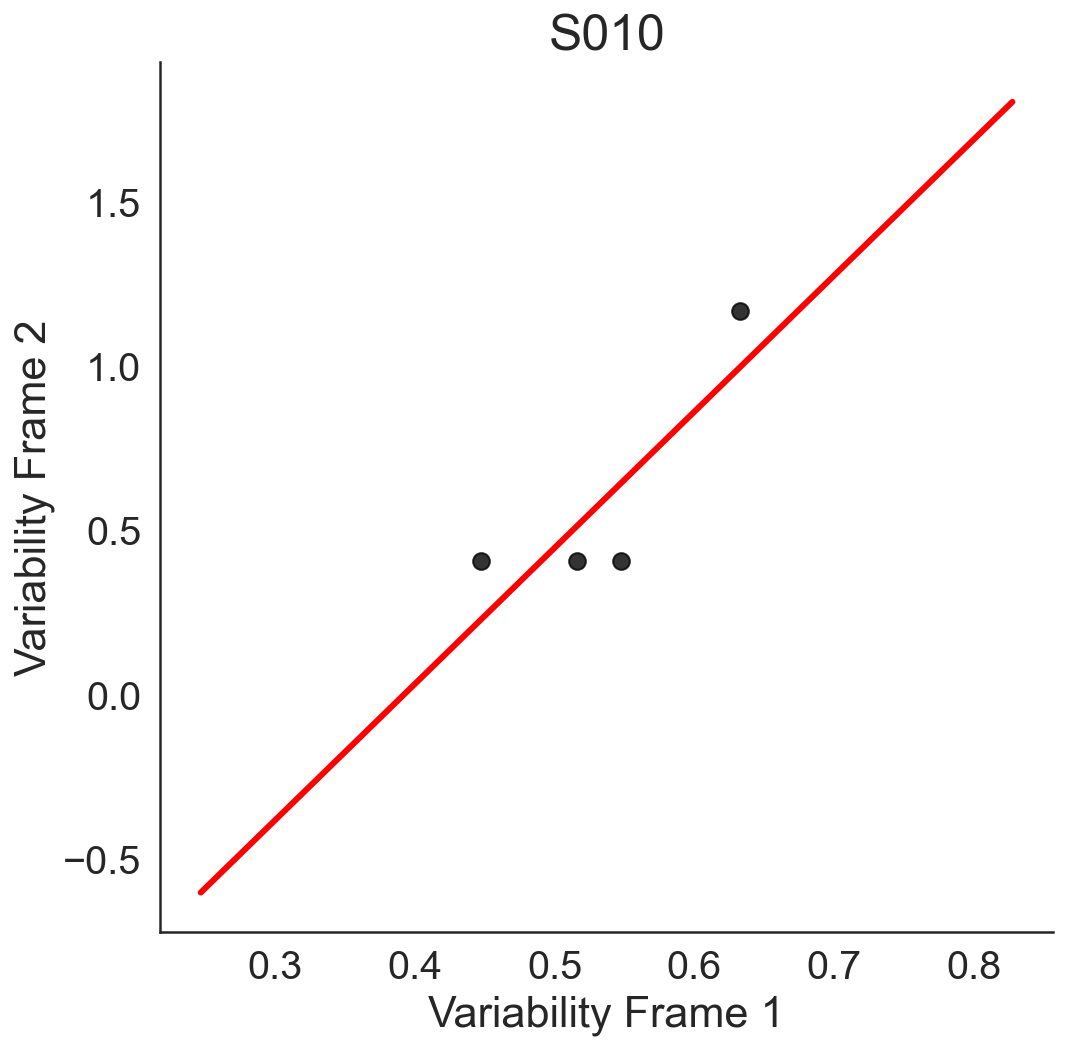

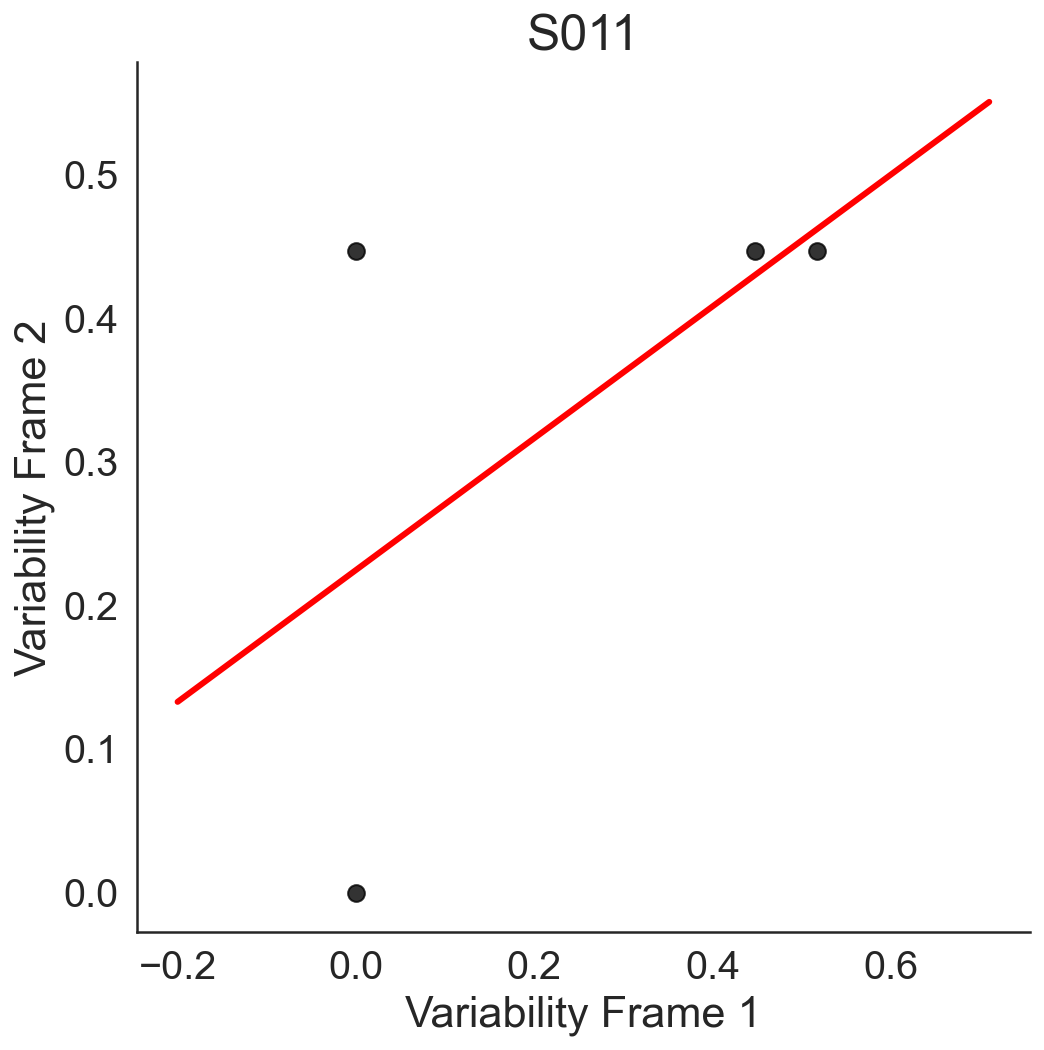

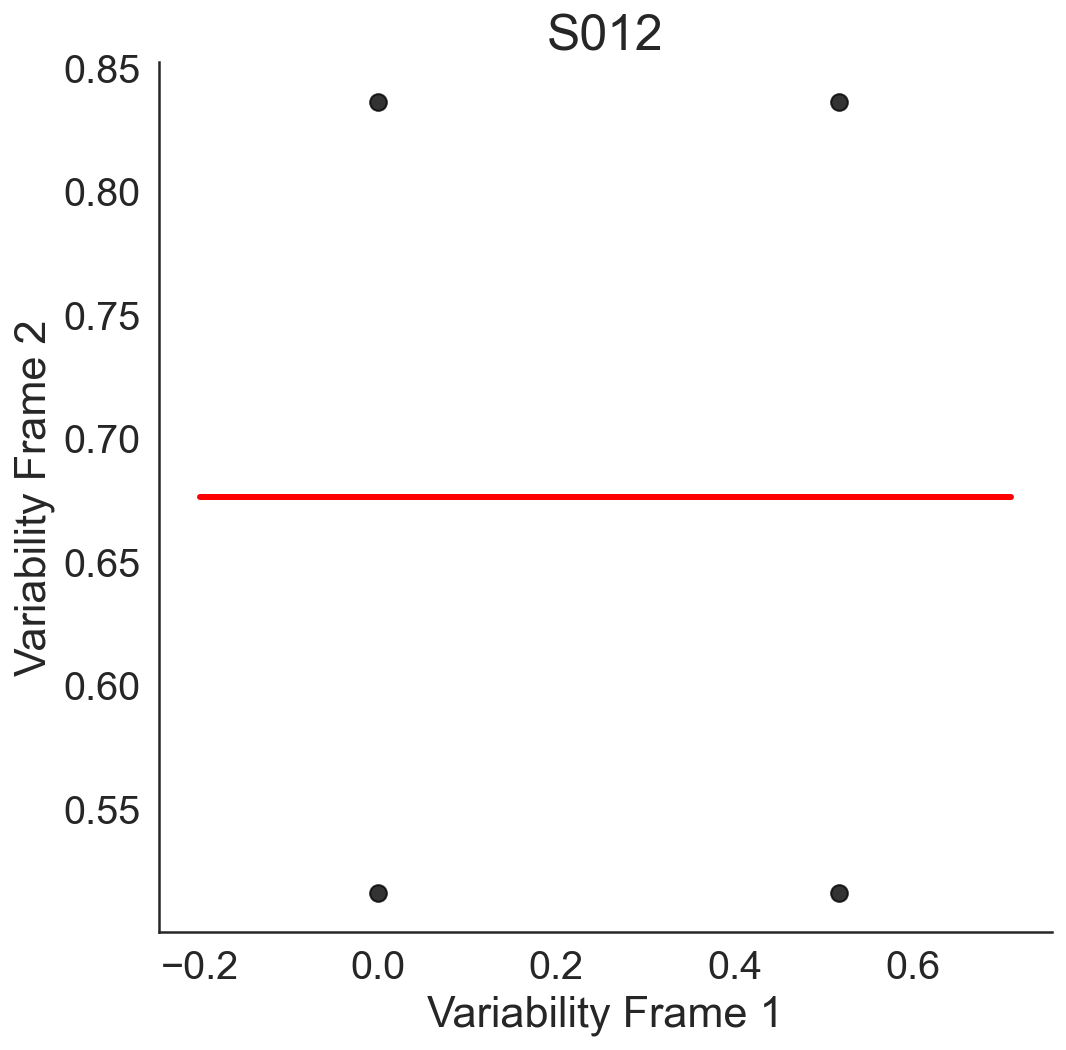

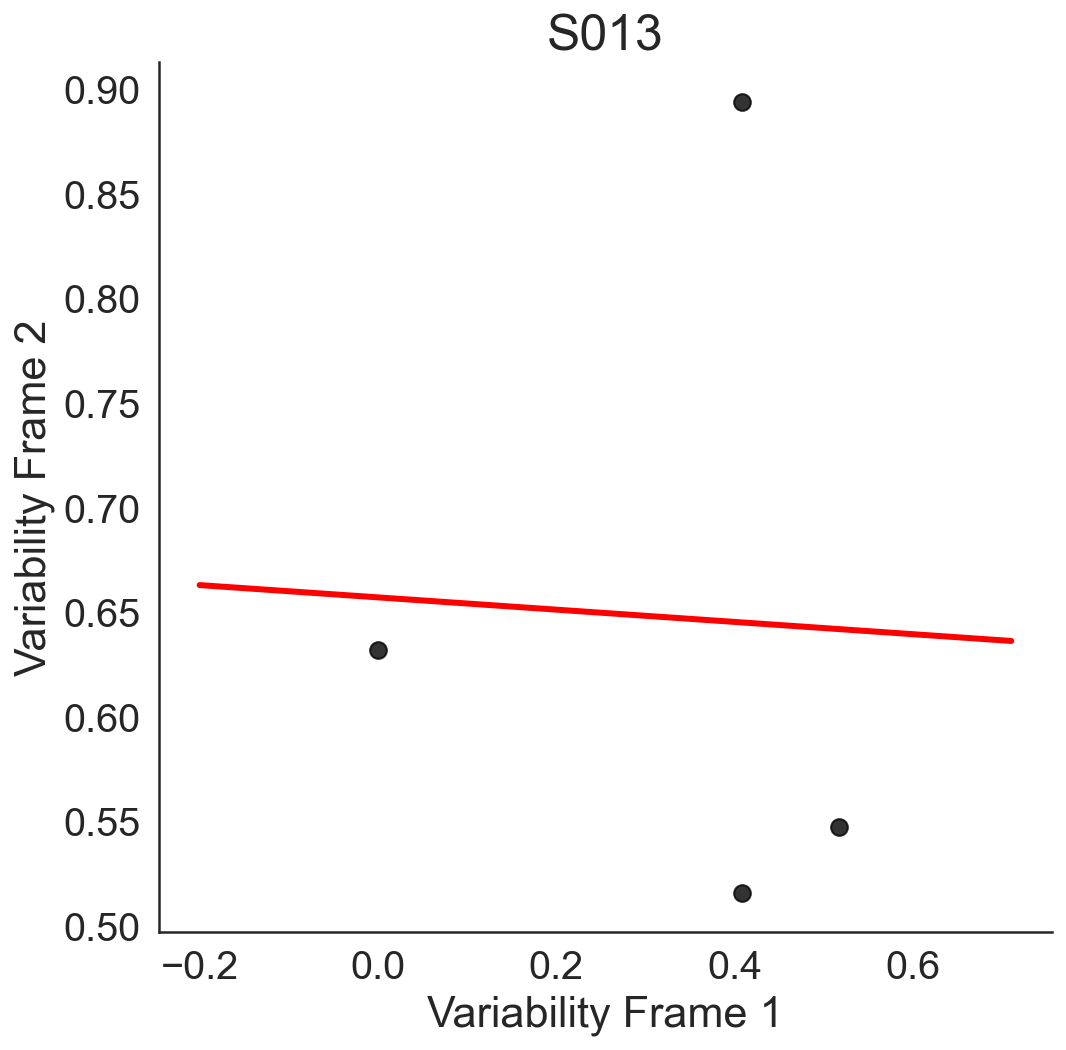

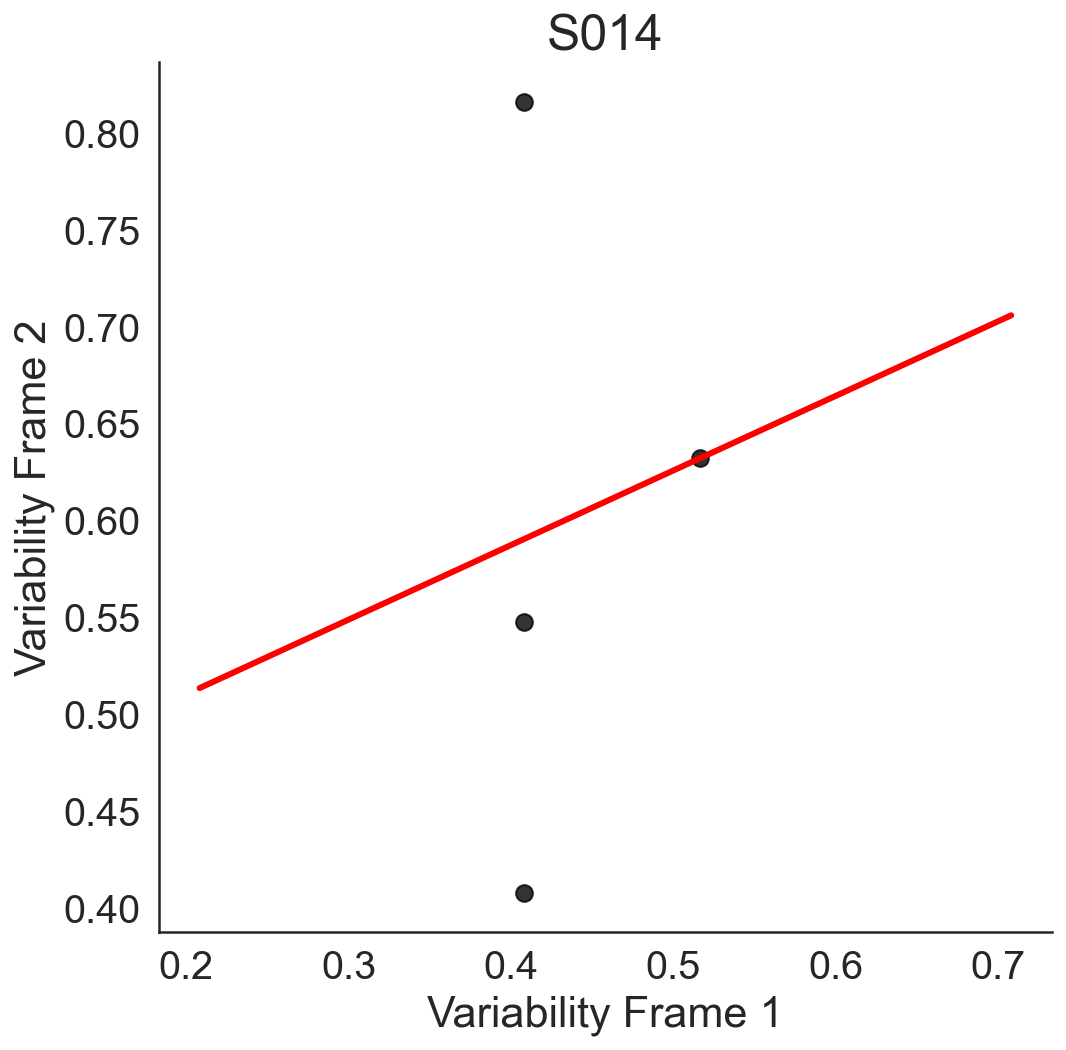

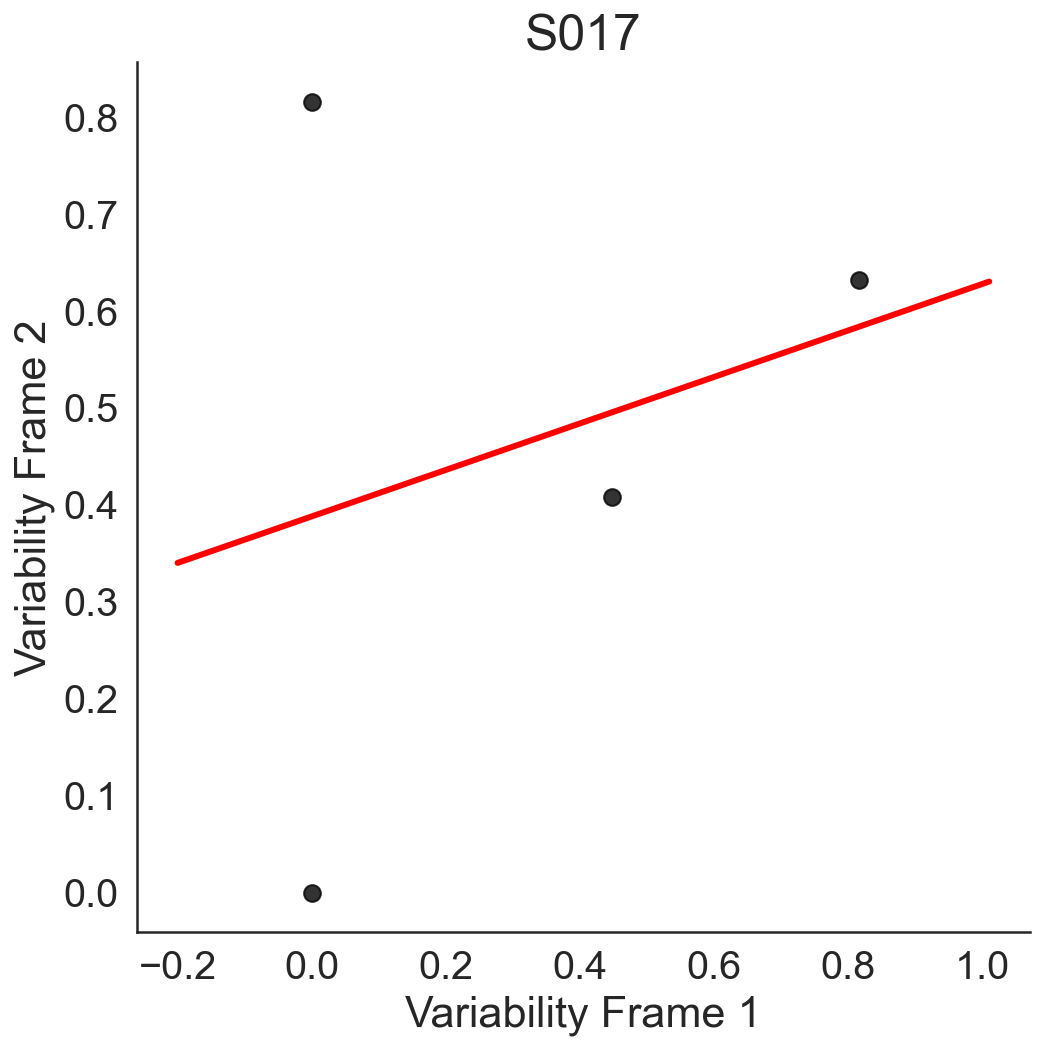

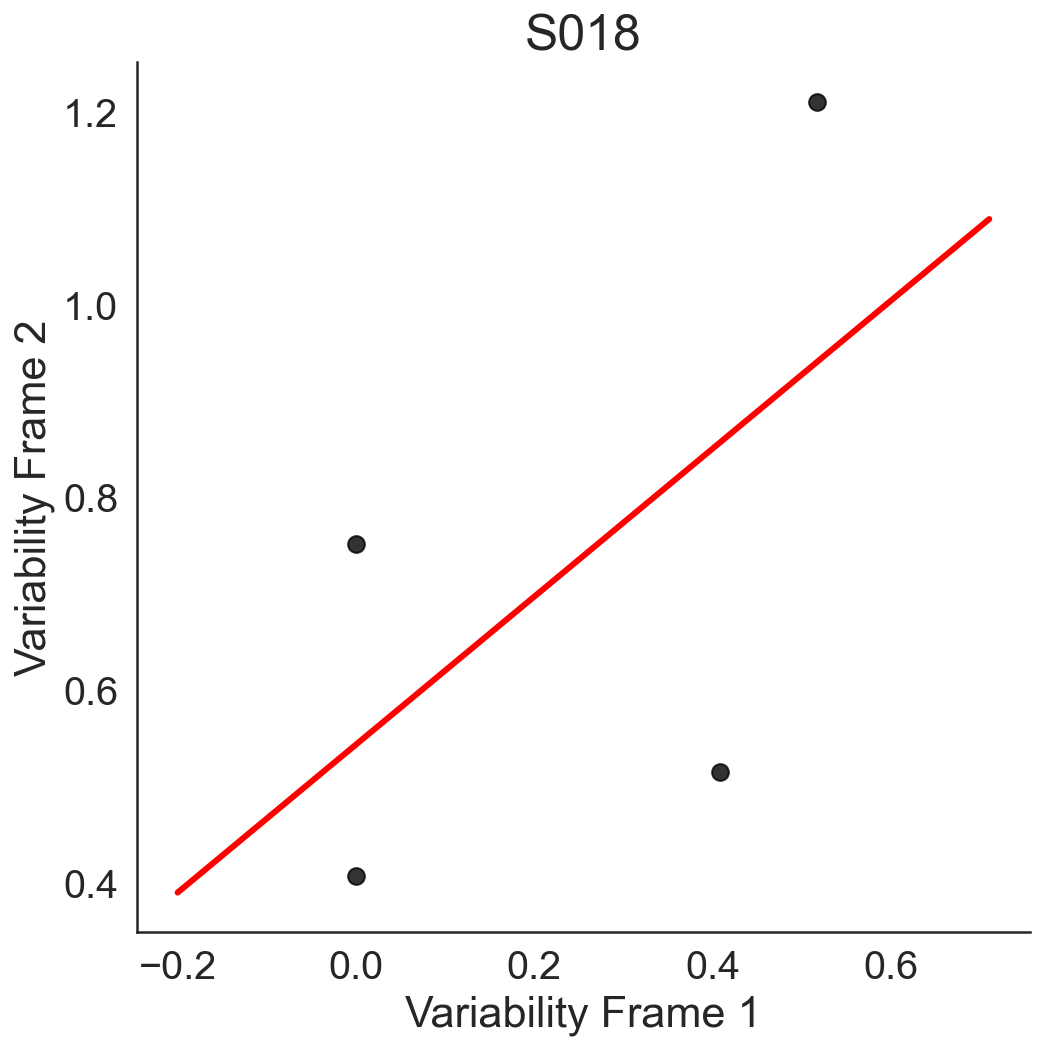

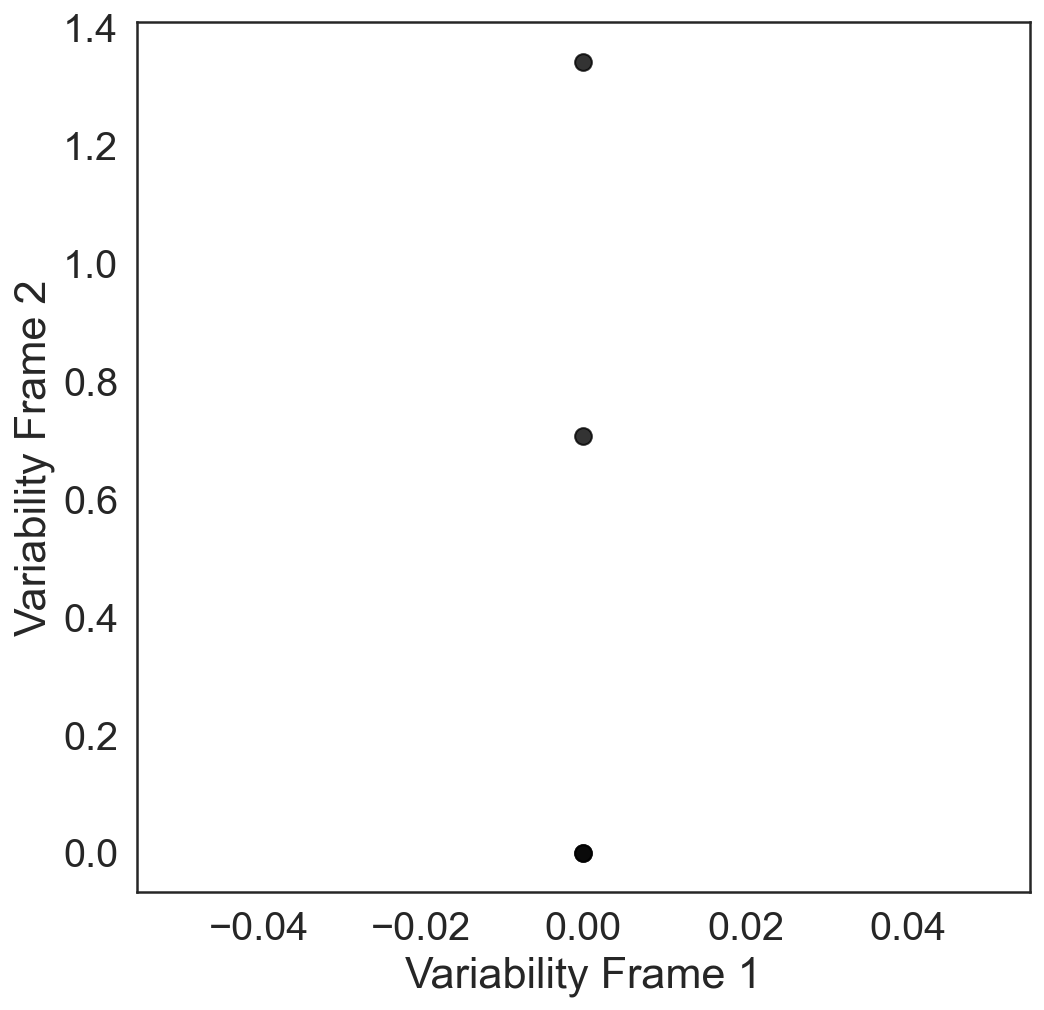

In [43]:
for part in data_exp1["Part"].unique(): 
    ## skip participant 16
    if part == 16:
        continue
    corrPlotSimple(data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)], 'var1','Variability Frame 1','var2','Variability Frame 2', title = 'S0'+str(part))

In [ ]:
corrPlotSimple(data_exp_ratings_2, 'var1','Variability Frame 1','var2','Variability Frame 2')


## 7. relationship between rating and variability.

In [ ]:
corrPlotSimple(data_exp_ratings_2, 'rat1','Rating Frame 1','var1','Variability Frame 1')

In [ ]:
#corrPlotSimple(data_exp_ratings_2, 'rat2','Rating Frame 2','var2','Variability Frame 2')
for part in data_exp1["Part"].unique(): 
    corrPlotSimple(data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)], 'rat2','Rating Frame 2','var2','Variability Frame 2',title = 'S0'+str(part))


## 8. I created an index of partiallity ( how much I like/dislike something, with 0 representing indifference and 2.5 representing absolute like/dislike for that animal)

In [ ]:
# if we adapt the rating scale to leave value 2.5 at the center of the scale (0) we can characterize the level of indifference that the animal generates
data_exp_ratings_2['partiality1'] = np.abs(data_exp_ratings_2.rat1-2.5)
data_exp_ratings_2['partiality2'] = np.abs(data_exp_ratings_2.rat2-2.5)

In [ ]:
corrPlotSimple(data_exp_ratings_2, 'partiality1','Partiality Frame 1','var1','Variability Frame 1')

In [ ]:
for part in data_exp1["Part"].unique(): 
    corrPlotSimple(data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == part)], 'partiality2','Partiality Frame 2','var2','Variability Frame 2', title = 'S0'+str(part))

### 

## 9. example ratings for each pet in one participant

In [ ]:
ax = data_exp_ratings_2.loc[(data_exp_ratings_2['Part'] == 3)].plot.bar(x='nameId',y=['rat1','rat2'], figsize=(20,5),color = ['b','r'] )


### **Note**: participant 4 doesn't report ratings for dislike correctly

## 10. example ratings  for each pet for all participants

In [ ]:
data_exp_ratings_2.plot.bar(x='nameId',y=['rat1','rat2'], figsize=(50,10),color = ['b','r'])

#  Choice data analysis
-----------------------------------------------------------------------

## 1. data visualization

In [ ]:
participant_densities(data_exp1,'choices', title = 'Choice (0: left ; 1: right)')

In [ ]:
participant_densities(data_exp1,'RT',title = 'RT')

In [ ]:
participant_densities(data_exp1,'frame',title = 'Frame')

#### This plot is just to check if I am presenting a comparable number of trials for each frames (in some cases is different because participants can miss the response)

# Accuracy per participant

In [ ]:
accuracies = pd.DataFrame( columns = [])

In [ ]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    print(i)
    accuracy_like.append(data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == i)].correct1.mean())
    #print(accuracy_like)

    accuracy_dislike.append(data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == i)].correct1.mean())
    #print(accuracy_dislike)

accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike


In [ ]:
accuracies

In [ ]:
accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Accuracy according to rating frame 1',color = ['b','r'])
ax.set_ylim(0, 1)
plt.xticks(range(0,len(data_exp1["Part"].unique())), data_exp1["Part"].unique())
plt.axhline(y=0.5, color='black', linestyle='--')
sns.despine()


In [ ]:
accuracies['like']

In [ ]:

sns.set(style='white', font_scale=1.8)
my_pal = {"like":"b" ,"dislike":"r"}
bplot = sns.violinplot(data=accuracies[ ['like','dislike']], palette=my_pal).set(ylabel='Accuracy')
plt.xticks([0, 1,], ['Like', 'Dislike'])
sns.despine()

stats.ttest_rel(accuracies['like'], accuracies['dislike'])

In [ ]:
print('mean Accuracy, like: ' + str(accuracies['like'].mean()))
print('mean Accuracy, dislike: ' + str(accuracies['dislike'].mean()))

In [ ]:
accuracies = pd.DataFrame( columns = [])

In [ ]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    print(i)
    accuracy_like.append(data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == i)].correct2.mean())
    accuracy_dislike.append(data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == i)].correct2.mean())
    #print(accuracy_dislike)
accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike

In [ ]:
 accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Accuracy according to rating frame 2',color = ['b','r'])
    
ax.set_ylim(0, 1)
plt.xticks(range(0,len(data_exp1["Part"].unique())), data_exp1["Part"].unique())
plt.axhline(y=0.5, color='black', linestyle='--')

sns.despine()

# Reaction time per participant

In [ ]:
accuracies = pd.DataFrame( columns = [])

In [ ]:
accuracy_like = []
accuracy_dislike = []

for i in data_exp1.Part.unique():
    print(i)
    accuracy_like.append(data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == i)].RT.mean())
    #print(accuracy_like)

    accuracy_dislike.append(data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == i)].RT.mean())
    #print(accuracy_dislike)

accuracies['participant'] = range(len(data_exp1.Part.unique()))
accuracies['like'] = accuracy_like
accuracies['dislike'] = accuracy_dislike


In [ ]:
accuracies

In [ ]:
accuracies.plot.bar(x='participant',y=['like','dislike'], figsize=(20,5),title = 'Reaction Time  [s]',color = ['b','r'])
ax.set_ylim(0, 1)
plt.xticks(range(0,len(data_exp1["Part"].unique())), data_exp1["Part"].unique())
plt.axhline(y=0.5, color='black', linestyle='--')
sns.despine()


In [ ]:

sns.set(style='white', font_scale=1.8)
my_pal = {"like":"b" ,"dislike":"r"}
bplot = sns.violinplot(data=accuracies[['like','dislike']], palette=my_pal).set(ylabel='RT [s]')
plt.xticks([0, 1,], ['Like', 'Dislike'])
sns.despine()

stats.ttest_rel(accuracies['like'], accuracies['dislike'])

In [ ]:
print('meanRT, like: ' + str(accuracies['like'].mean()))
print('meanRT, dislike: ' + str(accuracies['dislike'].mean()))

---------------------------------------------

## Split dataframe for like and dislike

In [ ]:
data_expL = data_exp1.loc[(data_exp1['frame'] == 1)] # 1 = Like, 2 = Dislike
data_expD = data_exp1.loc[(data_exp1['frame'] == 2)] # 1 = Like, 2 = Dislike

In [ ]:
#data_expL = data_exp1.loc[(data_exp1['frame'] == 1) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike
#data_expD = data_exp1.loc[(data_exp1['frame'] == 2) & (data_exp1['Part'] == 4)] # 1 = Like, 2 = Dislike

## 3. relationship between RT and |DV| 

In [ ]:
corrPlotSimple(data_exp1, 'zabsDVal1','|DVal1|','zRT','RT')

## 3.1 RT vs $\Sigma$Value

In [ ]:
corrPlotSimple(data_expL, 'zabsDVal1','TotVal','zRT','RT')

In [ ]:
corrPlotSimple(data_expD, 'zabsDVal1','TotVal','zRT','RT')

## 4. logistic plots for choice in like and dislike frames

In [ ]:
logisticplot_all_part( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

In [ ]:
logisticplot_all_part( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

In [ ]:
logisticplot_all_part( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')

In [ ]:
logisticplot_all_part( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')

## 5. considering logistics plots aggregating all participants

In [ ]:
logisticplot_all_full( data=data_expL, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#4F6A9A', title='', parvar='Part')
plt.tight_layout()

In [ ]:
logisticplot_all_full( data=data_expD, xaxis='zDVal1', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame1}$',
                 modlowcol='#AC5255', title='', parvar='Part')
plt.tight_layout()

In [ ]:
logisticplot_all( data=data_expL, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#4F6A9A', title='Like frame', parvar='Part')
plt.tight_layout()

In [ ]:
logisticplot_all( data=data_expD, xaxis='zDVal2', yaxis='choices', ylab='P(Right Item)', xlab= r'ΔVal $_{frame2}$',
                 modlowcol='#AC5255', title='Dislike frame', parvar='Part')
plt.tight_layout()

## 6. (preliminar) regression analysis on Choice
### zDVal1: difference in value (mean ratings for pet right -left) in like frame (frame 1)
### zDVal2: difference in value (mean ratings for pet right -left) in dislike frame (frame 2)
### zDVarX: difference in rating variability (mean variability pet right -left)  in frame X


In [ ]:
%R -i data_exp1
data_exp1

In [ ]:
%%R
# Separating the data for both conditions 
data_exp1_Like <- data_exp1[ which(data_exp1$frame=='1'), ]
data_exp1_DisLike <- data_exp1[ which(data_exp1$frame=='2'), ]

In [ ]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-10, 10) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

In [ ]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-10, 10) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### As expected, we observe that the rating given in dislike frame (Frame 2) accounts for the most disliked option

In [ ]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal1 + zDVar1  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-8, 8) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

In [ ]:
%%R
title_plot = "Choice "

ModelChoiceL_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_Like, family=binomial(link="logit"))
ModelChoiceD_1 <- glm(choices ~ zDVal2 + zDVar2  , data=data_exp1_DisLike, family=binomial(link="logit"))

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-3, 3) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

#### the difference in variability between items seems to not have an effect

## Since I don't have confidence I try to predict RT

In [ ]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zLogRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zLogRT ~ zabsDVal1 + zTotVal1  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

In [ ]:
%%R
title_plot = "RT "

ModelChoiceL_1 <- glm(zLogRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_Like, )
ModelChoiceD_1 <- glm(zLogRT ~ zabsDVal2 + zTotVal2  , data=data_exp1_DisLike, )

BIC1 = BIC(ModelChoiceL_1)
BIC2 = BIC(ModelChoiceD_1)
print("Like BIC:")
print(BIC1)
print("DisLike BIC:")
print(BIC2)

coefplot(ModelChoiceD_1,intercept=FALSE,vertical = FALSE,  col.pts="red", cex.var=1.5, cex.pts=2, mar = c(8,4,5,1) ,ylim=c(-1, 1) ,main=title_plot)
coefplot(ModelChoiceL_1, intercept=FALSE, vertical = FALSE, add=TRUE, col.pts="blue", cex.var=1.5, cex.pts=2,mar = c(8,4,5,1))
legend("topright",  legend=c("Dislike", "Like"),col=c("red", "blue"), lty=1:1, cex=1)

-----------------------------------------------------

# Import toolboxes and functions

In [ ]:
import numpy as np
import pandas as pd
from pandas.core.frame import DataFrame as DF

import seaborn as sns
sns.set(color_codes=True)
#np.random.seed(sum(map(ord, "distributions")))
from sklearn import linear_model  # packages for the logistic regression function to plot the logistic regression 
from sklearn.linear_model import LogisticRegression # packages for the logistic regression function to plot the logistic regression 
import scipy
from scipy import stats, integrate
from scipy.stats import mode
from scipy.stats.stats import pearsonr # Pearson's correlation
from copy import copy as copy
import operator as operator
import pylab

# Plotting tools
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%pylab inline
figsize(5, 5)

import glob

import os
# Added to avoid OMP:error#15
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
def parsplit(DF, input, quantiles):
    qvalues = pd.qcut(DF[input], quantiles, labels = range(1, quantiles+1))
    return qvalues

In [ ]:
def logisticplot_all_full (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
    sns.set(font_scale=1.5, style='white')
    fig = figure(figsize=(12,12))
    fig.set_facecolor('white')
    
    # defining the sigmoid function
    def model(x):
        y = 1 / (1 + np.exp(-x))
        return y
    
    sub = plt.subplot()

    
    
    ## Generate plot for individual participants
    participants = data.loc[:, 'Part'].unique()

    for x in participants:

            
            data_in = data.loc[data['Part'] == x]
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y        

            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            sub.plot(X_test, logit_all, color='black', linewidth=1.5, linestyle='--', alpha = 0.5)    
    
    
    
    
    ## Generate plot for  full data 
    #run the classifier
    clf = linear_model.LogisticRegression(C=1e5)

    logit_all = {}

    # I think this defines the problem space
    X_test = np.linspace(-5,10,300)

   #fitting the predictive logistic model for all the trials, for a participant specified by x
            # first I specify the value difference right - left, then I specify the choices, left or right
    clf.fit(data[xaxis][:, np.newaxis],
            data[yaxis])
    logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

    #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)
    
    all_coef = clf.coef_
    all_intercept = clf.intercept_
    
    #Plotting the predictive lines
    line_all = sub.plot(X_test, logit_all, color=modlowcol, linewidth=6, zorder=5,linestyle='-')

    # #Plotting the binned data
    #data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=3).values
    
     # determine the x coordinates
    #x_cords= data.groupby('DVBin2')[xaxis].mean()
    
     # determine low y coordinates
    #y_cords_low = data.groupby('DVBin2')[yaxis].mean().values
    
     # determine low y standard errors
    #test = pd.DataFrame(data.groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
    #y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))
    

     # plot the  points
    #sub.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
     # plot error bars
    #sub.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)
    
    
    # Set Labels
    sub.set_ylabel(ylab, fontsize=30)
    sub.set_xlabel(xlab, fontsize=30)

    # Set Ticks
    sub.set_xticks((-5,-3,-1,1,3,5))
    sub.set_yticks((0,0.25,0.5,0.75,1))
    sub.tick_params(axis='both', which='major', labelsize=35)

    # Set Limits
    sub.set_ylim(-0.01, 1.01)
    sub.set_xlim(-3, 3)

    # Set Title
    if title == 'empty':
        sub.set_title('')
    else:
        sub.set_title(title)
    
    #sub.legend(loc=0, prop={'size':20})
    sns.despine()

In [7]:
def logisticplot_all_part (data, xaxis='zDV', yaxis='G_choice', ylab='P(Chose Reference Item)', xlab='DV (Z-score)',
                 modlowcol='#AAAAAA', title='empty', parvar='SubNo'):
    
 
    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()
    fig = figure(figsize=(20,10))
    fig.set_facecolor('white')
    
    
    # Counter to know where to plot the particpant
    order = 1

    
    for x in participants:

            sub={}
            sub['%s' % x] = plt.subplot(int(len(participants)/6+1), 6, order)

            data_in = data.loc[data['Part'] == x]
            sns.set(font_scale=1.5, style='white')
            
            # defining the sigmoid function
            def model(x):
                y = 1 / (1 + np.exp(-x))
                return y

            sub['%s' % x].set_title('participant %s' % x)


            #run the classifier
            clf = linear_model.LogisticRegression(C=1e5)

            logit_all = {}

            # I think this defines the problem space
            X_test = np.linspace(-5,10,300)

           #fitting the predictive logistic model for all the trials, for a participant specified by x
                    # first I specify the value difference right - left, then I specify the choices, left or right
            clf.fit(data_in[xaxis][:, np.newaxis],
                    data_in[yaxis])
            logit_all = model(X_test * clf.coef_ + clf.intercept_).ravel()

            #print ('Part: ',x ,' High measure:logit coef =',clf.coef_, '; Intercept: ', clf.intercept_)

            all_coef = clf.coef_
            all_intercept = clf.intercept_

            #Plotting the predictive lines
            line_all = sub['%s' % x].plot(X_test, logit_all, color=modlowcol, linewidth=3, linestyle='-')
            #line_all = sub['%s' % x].plot(X_test, logit_all, color="#000000", linewidth=3, label=modlow, zorder=5,linestyle='--')

           # #Plotting the binned data
           # data['DVBin2'] = data.groupby(parvar).apply(parsplit, input=xaxis, quantiles=4).values

           # # determine the x coordinates
           # x_cords= data.groupby('DVBin2')[xaxis].mean()

           # # determine low y coordinates
           # y_cords_low = data.loc[(data[moderator]==0), :].groupby('DVBin2')[yaxis].mean().values

           # # determine low y standard errors
           # test = pd.DataFrame(data.loc[(data[moderator]==0), :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_low_error = test.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

    
           # # determine high y coordinates
           # y_cords_high = data.loc[(data[moderator]==1), :].groupby('DVBin2')[yaxis].mean().values

           # # determine high y standard errors
           # test2 = pd.DataFrame(data.loc[data[moderator]==1, :].groupby(['DVBin2', parvar])[yaxis].mean()).reset_index()
           # y_high_error = test2.groupby('DVBin2')[yaxis].std()/np.sqrt(len(test[parvar].unique()))

           # # plot the low points
           # plt.scatter(x_cords, y_cords_low, c=modlowcol, marker='D', s=60, zorder=1)
           # # plot low error bars
           # plt.errorbar(x_cords, y_cords_low, yerr=y_low_error, fmt='o', zorder=3, c=modlowcol)

           # # plot the high points
           # plt.scatter(x_cords, y_cords_high, c=modhighcol, marker='o', s=60, zorder=2)
           # # plot high error bars
           # plt.errorbar(x_cords, y_cords_high, yerr=y_high_error, fmt='o', zorder=4, c=modhighcol)

    
            # Set Labels
            #sub['%s' % x].set_ylabel(ylab, fontsize=30)
           # sub['%s' % x].set_xlabel(xlab, fontsize=30)

            # Set Ticks
            sub['%s' % x].set_xticks((-5,-3,-1,1,3,5))
            sub['%s' % x].set_yticks((0,0.25,0.5,0.75,1))
            sub['%s' % x].tick_params(axis='both', which='major', labelsize=20)

            # Set Limits
            sub['%s' % x].set_ylim(-0.01, 1.01)
            sub['%s' % x].set_xlim(-5, 5)
            order += 1


    fig.text(0.5, 0.0, xlab, fontsize= 30, ha='center')
    fig.text(0.0, 0.5, ylab,fontsize= 30, va='center', rotation='vertical')
    
    #sub.legend(loc=0, prop={'size':20})
    fig.suptitle(title, fontsize = 25)

    
    sns.despine()

In [8]:
def z_score1(data_all, part_def,z_score_var):
    z_matrix=[]
    z_matrix_aux=[]

    for i in (data_all[part_def].unique()):
        Choicedata = data_all.loc[data_all[part_def] == i]    
    
        pX_A= pd.to_numeric(Choicedata[z_score_var]) 
        pX_zA= (pX_A - np.mean(pX_A))/np.std(pX_A)

        z_matrix_aux= pX_zA.values
    
        for  j in range(len(z_matrix_aux)):    
            z_matrix.append(z_matrix_aux[j])
    return z_matrix

In [9]:
def participant_densities(data, var, xlim=(0,100), rug=True, title = ''):
    # a counter that tells us where a given participant's data should be plotted
    order = 1

    # a list of all the participants in the dataset
    participants = data.loc[:, 'Part'].unique()

    # defining the figure size
    sns.set_style('white')
    fig = figure(figsize=(40,20))

    for x in participants:
        # defining the sub figures
            sub={}
            sub['%s' % x] = plt.subplot(len(participants)/2, 4, order)
            sns.kdeplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x], shade=True)
            #if rug==True:
            #    sns.rugplot(data.loc[data['Part'] == x, var].values, ax = sub['%s' % x])
            sub['%s' % x].set_title('participant %s' % x)
            #sub['%s' % x].set_xlim(xlim)
            order += 1
    fig.suptitle(title, fontsize = 25)


In [10]:
def corrPlotSimple(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel, title=''):
    
    data_exp1_drop = data_exp1.dropna(subset=[x_variable,y_variable])

    results = pearsonr(data_exp1_drop[x_variable], data_exp1_drop[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_exp1_drop, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1_drop[x_variable]
    y=data_exp1_drop[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    ax.set_title(title, fontsize = 25)

    sns.despine()
    


In [11]:
def corrPlotPart(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel, title=''):
    
    data_exp1_drop = data_exp1.dropna(subset=[x_variable,y_variable])

    results = pearsonr(data_exp1_drop[x_variable], data_exp1_drop[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", np.round(results[1], 3))
    
    #f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    ax = sns.regplot(data=data_exp1_drop, x= x_variable, y=y_variable, fit_reg=False, ci=0, color='#000000', scatter_kws={'s':70})
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1_drop[x_variable]
    y=data_exp1_drop[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    ax.set_title(title, fontsize = 25)

    sns.despine()
    


In [12]:
def corrPlotSimpleJitter(data_exp1, x_variable,x_varlabel,y_variable,y_varlabel, title=''):
    
    data_exp1_drop = data_exp1.dropna(subset=[x_variable,y_variable])

    results = pearsonr(data_exp1_drop[x_variable], data_exp1_drop[y_variable])
    print ("Pearson's r = {0}".format(np.round(results[0], 3)), "p = ", results[1])
    
    f = plt.figure(figsize=(8, 8))
    sns.set(style='white', font_scale=1.8)
    
    #ax = sns.stripplot(x=x_variable, y=y_variable, data=data_exp1_drop, alpha=.2,jitter=True,edgecolor='#000000')
    ax = sns.regplot(data=data_exp1_drop, x= x_variable, y=y_variable, fit_reg=False,  x_jitter = 0.2, y_jitter = 0, ci=0, color='#000000', scatter_kws={'s':70,'alpha' : 1/3})
    
    ax.set(ylabel=y_varlabel, xlabel=x_varlabel)
    x=data_exp1_drop[x_variable]
    y=data_exp1_drop[y_variable]
    fit = np.polyfit(x, y, deg=1)
    future = np.arange(min(x)-0.2, max(x)+0.2, 0.01)
    fit_fn = np.poly1d(fit)
    future_fit = np.polyval(fit_fn, future)
    ax.plot(future, future_fit, color='Red', lw=3)
    ax.set_title(title, fontsize = 25)

    sns.despine()
    
    

In [13]:
import rpy2

%load_ext rpy2.ipython
# Set up interface with R
# Make it easy to set and find values in a multi-index DF
idx = pd.IndexSlice
# Set up interface with R
%config InlineBackend.figure_format = 'retina'
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)


In [14]:
%%R
library(lme4)
#library(car)
library(optimx)
#library(ggplot2)
library(MASS)
#library(broom)
library(dplyr)
library(reshape2)
library(arm)
library(multcomp)
library(pbkrtest)

R[write to console]: Loading required package: Matrix

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following object is masked from ‘package:MASS’:

    select


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
arm (Version 1.10-1, built: 2018-4-12)


R[write to console]: Working directory is /Users/pradyumna/Documents/GiTs/PFT_fMRI_2019/Pilots Pet Scanner/Analysis


R[write to console]: Loading required package: mvtnorm

R[write to console]: Loading required package: survival

R[write to console]: Loading required package: TH.data

R[write to console]: 
Attaching package: ‘TH.data’


R[write to console]: The following object is masked from ‘package:MASS’:

    geyser


